In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.decomposition import PCA
import scipy.stats as stats


C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# functions 

In [2]:
def get_co_index(list1,list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = set1 & set2
    return list(intersection)

def knn_imputer(df, neighbors = 6):
    '''apply KNN imputation to a dataset'''
    from sklearn.impute import KNNImputer

    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors = neighbors)
    
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def iterative_imputer(df, maxiteration = 10 , randomstates = 0):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Initialize the IterativeImputer
    imputer = IterativeImputer(max_iter= maxiteration, random_state= randomstates)

    # Create a new DataFrame with the imputed values
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def standardscaler(df):   
 
    # # Initialize the StandardScaler
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_df

def calculate_mean(df):
    # Calculate mean values for each group of columns
    mean_T1 = df.iloc[:, 0:6].mean(axis=1)
    mean_T2 = df.iloc[:, 6:12].mean(axis=1)
    mean_T3 = df.iloc[:, 12:18].mean(axis=1)
    mean_T4 = df.iloc[:, 18:24].mean(axis=1)
    # Create a new DataFrame with the calculated means
    new_df = pd.DataFrame({
        'T1': mean_T1,
        'T2': mean_T2,
        'T3': mean_T3,
        'T4': mean_T4
    })
    return new_df

def filter_row_missings(df, number):
    '''Filter protein features and keep proteins with less than "number" missing values, protein features as index.'''
    # Using isna() to count missing values and keep rows with missing values less than "number"
    df_filtered = df[df.isna().sum(axis=1) <= number]
    return df_filtered

def filter_column_missings(df, value):
    '''Filter samples and keep samples with more than "value" protein identifications, samples as columns.'''
    # Using notna() to count non-missing values and keep columns with non-missing values more than "value"
    df_filtered = df.loc[:, df.notna().sum(axis=0) >= value]
    return df_filtered

# function for oneway_ANOVA analysis 
def oneway_ANOVA_Ttest(result):
    pval=[]
    for i in range(len(result)):
        aa=result.iloc[i,:6].tolist()
        bb=result.iloc[i,6:12].tolist()
        cc=result.iloc[i,12:18].tolist()
        dd=result.iloc[i,18:24].tolist()
        p_value_anova = f_oneway(aa,bb,cc,dd)[1]
        p_value_ttest = stats.ttest_ind(aa, dd)[1]  # Welch’s t-test
        pval.append([result.index[i],p_value_anova,p_value_ttest])
        fl = pd.DataFrame(pval)
        fl.columns = ['protein', 'p_value_anova','p_value_ttest']
    return(fl)

# 按行进行标准归一化
def standardscaler_row(df):
    scaler=StandardScaler()
    proname=df.T.columns
    k=df.T
    dfdf_pro=scaler.fit_transform(k)
    # 按行进行标准化后的 dataframe
    dfpro_stdbyrow=pd.DataFrame(dfdf_pro.T,index=df.index,columns=df.columns)
    return dfpro_stdbyrow

In [3]:
# plot histgram of the quantified proteins in all files 

def histgram(df): 
    '''should consider Nan values in the dataframe'''
    nonzero_count_per_column = df.apply(lambda row: (row != 0).sum(), axis=0)
    plt.figure(figsize=(5, 4))
    plt.rcParams['font.family'] = 'Arial'
    plt.hist(nonzero_count_per_column, bins=10, edgecolor='k', alpha=0.9)
    # Set the font size for individual elements
    plt.title('Proteome depth', fontsize=16)
    plt.xlabel('Proteins quantified', fontsize=16)
    plt.ylabel('Number of samples', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Show plot
    plt.show()

# set the data soucrce
def plot_pca(df): 
    # standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    # perform PCA with 2 principal components
    pca = PCA(n_components=2)
    pca.fit(X_scaled)
    # transform the features to the new space
    X_pca = pca.transform(X_scaled)
    # create a new dataframe with the principal components and target variable
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['target'] = treatment
    # plot the results
    plt.figure(figsize=(8, 6), edgecolor='#04253a')
    sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, s=180)
    plt.yticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.xlabel('PC 1', fontsize=22)
    plt.ylabel('PC 2', fontsize=22)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.2,fontsize=20)
    plt.show()

In [4]:
# len(get_co_index(set(list(df_cso.index)),set(list(df_zo.T.index))))

# get_co_index(set(list(df_cso.index)),set(list(lfq_df.index)))

In [5]:
# histgram(df_lfq.T)

# Macrophage proteome reanalysis starts here

In [6]:
file_read_path = r'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\data'

file_save_path = r'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\files'

figure_save_path = r'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\figures'

In [7]:
df_lfq = pd.read_csv(f'{file_read_path}\commonProteins.csv',index_col=0)
# df_sum = pd.read_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\Macrophage_reanalysis\fdrScores-macc-sum\commonProteins.csv',index_col=0)


In [8]:
df_lfq.T

zoDIAq-file_DUAL_macro_1_corrected_fullOutput  \
1/sp|A6PWD2|FHAD1_MOUSE                                                                  0.000000   
1/sp|B2RXS4|PLXB2_MOUSE                                                              13416.556858   
1/sp|E9Q634|MYO1E_MOUSE                                                                  0.000000   
1/sp|O08529|CAN2_MOUSE                                                               53455.308930   
1/sp|O08553|DPYL2_MOUSE                                                             143647.838442   
...                                                                                           ...   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                   23756.325073   
9/sp|P98078|DAB2_MOUSE/tr|A0A0R4J104|A0A0R4J104...                                       0.000000   
9/sp|Q3TX08|TRM1_MOUSE/tr|A0A0R4IZW7|A0A0R4IZW7...                                       0.000000   
9/sp|Q60875|ARHG2_MOUSE/tr|H3BJ40|H3BJ40_MOUSE/...                                       0.000000   
9/sp|Q9Z2W0|DNPEP_MOUSE/tr|A0A087WNX3|A0A087WNX...                                       0.000000   

                                                    zoDIAq-file_DUAL_macro_2_corrected_fullOutput  \
1/sp|A6PWD2|FHAD1_MOUSE                                                                  0.000000   
1/sp|B2RXS4|PLXB2_MOUSE                                                              14128.708844   
1/sp|E9Q634|MYO1E_MOUSE                                                                  0.000000   
1/sp|O08529|CAN2_MOUSE                                                               52878.868783   
1/sp|O08553|DPYL2_MOUSE                                                             139548.607809   
...                                                                                           ...   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                   22412.148804   
9/sp|P98078|DAB2_MOUSE/tr|A0A0R4J104|A0A0R4J104...                                       0.000000   
9/sp|Q3TX08|TRM1_MOUSE/tr|A0A0R4IZW7|A0A0R4IZW7...                                       0.000000   
9/sp|Q60875|ARHG2_MOUSE/tr|H3BJ40|H3BJ40_MOUSE/...                                       0.000000   
9/sp|Q9Z2W0|DNPEP_MOUSE/tr|A0A087WNX3|A0A087WNX...                                       0.000000   

                                                    zoDIAq-file_DUAL_macro_3_corrected_fullOutput  \
1/sp|A6PWD2|FHAD1_MOUSE                                                                  0.000000   
1/sp|B2RXS4|PLXB2_MOUSE                                                              18373.710338   
1/sp|E9Q634|MYO1E_MOUSE                                                                  0.000000   
1/sp|O08529|CAN2_MOUSE                                                               61780.868785   
1/sp|O08553|DPYL2_MOUSE                                                             149690.252333   
...                                                                                           ...   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                   24710.630615   
9/sp|P98078|DAB2_MOUSE/tr|A0A0R4J104|A0A0R4J104...                                       0.000000   
9/sp|Q3TX08|TRM1_MOUSE/tr|A0A0R4IZW7|A0A0R4IZW7...                                       0.000000   
9/sp|Q60875|ARHG2_MOUSE/tr|H3BJ40|H3BJ40_MOUSE/...                                       0.000000   
9/sp|Q9Z2W0|DNPEP_MOUSE/tr|A0A087WNX3|A0A087WNX...                                       0.000000   

                                                    zoDIAq-file_DUAL_macro_4_corrected_fullOutput  \
1/sp|A6PWD2|FHAD1_MOUSE                                                                  0.000000   
1/sp|B2RXS4|PLXB2_MOUSE                                                              21996.026848   
1/sp|E9Q634|MYO1E_MOUSE                                                              14753.991933   
1/sp|O085

In [9]:
# df_lfq.columns

In [3]:
924/1386

0.6666666666666666

In [2]:
1386/1.5

924.0

In [10]:
df = df_lfq.T.replace(0,np.nan)
df1 = np.log2(filter_row_missings(df,df.shape[1]/1.5))
# df1 = filter_row_missings(df,df.shape[1]/2)
df2 = knn_imputer(df1, neighbors = 4)

In [12]:
df2

zoDIAq-file_DUAL_macro_1_corrected_fullOutput  \
1/sp|B2RXS4|PLXB2_MOUSE                                                                 13.711727   
1/sp|E9Q634|MYO1E_MOUSE                                                                 13.623056   
1/sp|O08529|CAN2_MOUSE                                                                  15.706046   
1/sp|O08553|DPYL2_MOUSE                                                                 17.132177   
1/sp|O08749|DLDH_MOUSE                                                                  14.756247   
...                                                                                           ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...                                      12.791691   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...                                      15.214323   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...                                      20.986622   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...                                      13.812376   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                      14.536024   

                                                    zoDIAq-file_DUAL_macro_2_corrected_fullOutput  \
1/sp|B2RXS4|PLXB2_MOUSE                                                                 13.786342   
1/sp|E9Q634|MYO1E_MOUSE                                                                 13.624719   
1/sp|O08529|CAN2_MOUSE                                                                  15.690404   
1/sp|O08553|DPYL2_MOUSE                                                                 17.090408   
1/sp|O08749|DLDH_MOUSE                                                                  15.122231   
...                                                                                           ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...                                      13.507481   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...                                      15.401349   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...                                      20.847553   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...                                      13.959467   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                      14.451993   

                                                    zoDIAq-file_DUAL_macro_3_corrected_fullOutput  \
1/sp|B2RXS4|PLXB2_MOUSE                                                                 14.165355   
1/sp|E9Q634|MYO1E_MOUSE                                                                 13.670511   
1/sp|O08529|CAN2_MOUSE                                                                  15.914873   
1/sp|O08553|DPYL2_MOUSE                                                                 17.191621   
1/sp|O08749|DLDH_MOUSE                                                                  14.832666   
...                                                                                           ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...                                      13.361428   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...                                      15.383337   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...                                      21.064308   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...                                      13.969124   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...                                      14.592844   

                                                    zoDIAq-file_DUAL_macro_4_corrected_fullOutput  \
1/sp|B2RXS4|PLXB2_MOUSE                                                                 14.424955   
1/sp|E9Q634|MYO1E_MOUSE                                                                 13.848818   
1/sp|O08529|CAN2_MOUSE                                                                  15.742368   
1/sp|O085

In [13]:
colname = [item.split('_')[3] for item in df2.columns]
df2.columns = colname

desired_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                 '13','14', '15', '16', '17', '18','19','20', '21', '22', '23', '24']
df3 = df2[desired_order]


In [15]:
df3.to_csv(f'{file_save_path}/all_proteins_after_imputation_log2.csv')

In [34]:
new_column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 
                    'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 
                    'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
# df3.to_csv(f'{file_save_path}/all_proteins_after_imputation_log2.csv')
df4 = standardscaler(df3)
df4.columns = new_column_names
print("total proteins:" + str(len(df4)))


# df4.to_csv(f'{file_save_path}/all_proteins_after_SSnormalization.csv')

total proteins:885


In [35]:
# df4.to_csv(f'{file_save_path}/all_proteins_after_SSnormalization.csv')
df4

A1        A2  \
1/sp|B2RXS4|PLXB2_MOUSE                            -0.822880 -0.873890   
1/sp|E9Q634|MYO1E_MOUSE                            -0.871106 -0.962441   
1/sp|O08529|CAN2_MOUSE                              0.261779  0.169324   
1/sp|O08553|DPYL2_MOUSE                             1.037415  0.936371   
1/sp|O08749|DLDH_MOUSE                             -0.254792 -0.141971   
...                                                      ...       ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t... -1.323264 -1.026674   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.005656  0.010955   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.133748  2.994868   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.768139 -0.779036   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.374566 -0.509187   

                                                          A3        A4  \
1/sp|B2RXS4|PLXB2_MOUSE                            -0.670806 -0.542887   
1/sp|E9Q634|MYO1E_MOUSE                            -0.937897 -0.858373   
1/sp|O08529|CAN2_MOUSE                              0.273492  0.178511   
1/sp|O08553|DPYL2_MOUSE                             0.962614  0.933773   
1/sp|O08749|DLDH_MOUSE                             -0.310627 -0.243267   
...                                                      ...       ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t... -1.104725 -1.047597   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.013404 -0.013398   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.052889  2.984624   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.776722 -0.811212   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.440070 -0.560497   

                                                          A5        A6  \
1/sp|B2RXS4|PLXB2_MOUSE                            -0.748379 -0.851547   
1/sp|E9Q634|MYO1E_MOUSE                            -0.989953 -0.977299   
1/sp|O08529|CAN2_MOUSE                              0.338167  0.245746   
1/sp|O08553|DPYL2_MOUSE                             1.049204  0.987733   
1/sp|O08749|DLDH_MOUSE                             -0.369222 -0.419146   
...                                                      ...       ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t... -1.049829 -0.779773   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  0.093140 -0.055802   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.124791  3.013890   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.799782 -0.813013   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.496555 -0.456199   

                                                          B1        B2  \
1/sp|B2RXS4|PLXB2_MOUSE                            -0.801583 -0.827870   
1/sp|E9Q634|MYO1E_MOUSE                            -0.982300 -0.822409   
1/sp|O08529|CAN2_MOUSE                             -0.032840  0.009486   
1/sp|O08553|DPYL2_MOUSE                             0.946450  0.855687   
1/sp|O08749|DLDH_MOUSE                             -0.142676 -0.094446   
...                                                      ...       ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t... -1.095233 -1.087548   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.307661 -0.233921   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.127235  3.245112   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.262929 -0.611110   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.987251 -0.680381   

                                                          B3        B4  ...  \
1/sp|B2RXS4|PLXB2_MOUSE                            -0.790689 -0.746372  ...   
1/sp|E9Q634|MYO1E_MOUSE                            -0.857692 -1.041580  ...   
1/sp|O08529|CAN2_MOUSE                             -0.002325  0.014372  ...   
1/sp|O08553|DPYL2_MOUSE                             0.910354  0.866045  ...   
1/sp|O08749|DLDH_MOUSE                             -0.131789 -0.042683  ...   
...                         

# reformat proteome dataset

In [36]:
# sort the dataframe according to number of proteins exist in the index

df5 = df4.iloc[sorted(range(len(df4)), key=lambda x: int(df4.index[x].split('/')[0]))]

In [18]:
# Function to split and format the index (multiple proteins)
def process_protein_index(input_str):
    parts = input_str.split('|')[1:]  # Split and skip the first part
    cleaned_pairs = []
    for i in range(0, len(parts), 2):
        # Clean /sp and /tr from both accession and protein name
        accession = parts[i].split('/')[0]
        protein = parts[i+1].split('/')[0]
        cleaned_pairs.append(f"{accession}|{protein}")
    return cleaned_pairs

In [38]:
# Create a new DataFrame to store processed proteome dataset
dfgg = df5
new_rows = []
for index, row in dfgg.iterrows():
    formatted_proteins = process_protein_index(index)
    for protein in formatted_proteins:
        new_row = row.copy()
        new_row.name = protein  # Set new index
        new_rows.append(new_row)
# Convert list of new rows into a DataFrame
processed_df = pd.DataFrame(new_rows)
# remove duplicate index
haha_df = processed_df[~processed_df.index.duplicated(keep='first')]

In [39]:
haha_df2 = haha_df.copy()
haha_df2.index = [item.split('|')[1].split('_')[0] for item in haha_df.index]
# haha_df2.to_csv(f'{file_save_path}/all_proteins_splitted_after_SSnormalization_genenames_asindex.csv')

In [40]:
# haha_df.to_csv(f'{file_save_path}/all_proteins_splitted_after_SSnormalization.csv')

In [41]:
# # Check for duplicate indexes
# duplicate_indexes = haha_df.index.duplicated(keep=False)  # Set keep=False to show all duplicates

# if any(duplicate_indexes):
#     print("Duplicate indexes found:")
#     print(processed_df[duplicate_indexes])  # Display rows with duplicate indexes
# else:
#     print("No duplicate indexes found.")

In [42]:
dfpro_pval = oneway_ANOVA_Ttest(result=df4)
print(len([item for item in dfpro_pval['p_value_ttest'].tolist() if item <0.05]))
print(len([item for item in dfpro_pval['p_value_anova'].tolist() if item <0.05]))

# dfpro_pval.to_csv(f'{file_save_path}/pvalue_proteins.csv')

378
585


In [43]:
FDR_res=statsmodels.stats.multitest.fdrcorrection(dfpro_pval['p_value_anova'].tolist(), alpha=0.05, method='indep', is_sorted=False)[0]

# calculate the pvalues < 0.05 after FDR correction 
yuyu=[]
for item in range(len(FDR_res)):
    if FDR_res[item]== True:
        yuyu.append(item)
print("significantly dysregulated proteins (P value < 0.05): " + str(len(yuyu)))

significantly dysregulated proteins (P value < 0.05): 546


In [44]:
# locate the significant proteins from df_pval dataframe, aiming to find the protein names out 
sig_pro=dfpro_pval.loc[yuyu]
print(len(sig_pro))

546


In [45]:
df_pro_sig=df4.loc[sig_pro['protein']]
# df_pro_sig.to_csv(f'{file_save_path}/sig_dysregu_proteins_0.05adj.csv')

In [46]:
df_pro_sig

A1        A2  \
1/sp|O08529|CAN2_MOUSE                              0.261779  0.169324   
1/sp|O08749|DLDH_MOUSE                             -0.254792 -0.141971   
1/sp|O08795|GLU2B_MOUSE                             0.284068  0.231582   
1/sp|O08807|PRDX4_MOUSE                             2.404427  2.508318   
1/sp|O08997|ATOX1_MOUSE                            -0.040803 -0.104313   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.451618  0.402511   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.005656  0.010955   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.133748  2.994868   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.768139 -0.779036   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.374566 -0.509187   

                                                          A3        A4  \
1/sp|O08529|CAN2_MOUSE                              0.273492  0.178511   
1/sp|O08749|DLDH_MOUSE                             -0.310627 -0.243267   
1/sp|O08795|GLU2B_MOUSE                             0.289485  0.193721   
1/sp|O08807|PRDX4_MOUSE                             2.317293  2.352831   
1/sp|O08997|ATOX1_MOUSE                            -0.393455 -0.088165   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.506437  0.437055   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.013404 -0.013398   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.052889  2.984624   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.776722 -0.811212   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.440070 -0.560497   

                                                          A5        A6  \
1/sp|O08529|CAN2_MOUSE                              0.338167  0.245746   
1/sp|O08749|DLDH_MOUSE                             -0.369222 -0.419146   
1/sp|O08795|GLU2B_MOUSE                             0.228158  0.260514   
1/sp|O08807|PRDX4_MOUSE                             2.539985  2.457636   
1/sp|O08997|ATOX1_MOUSE                             0.067130 -0.086408   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.491367  0.388633   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  0.093140 -0.055802   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.124791  3.013890   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.799782 -0.813013   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.496555 -0.456199   

                                                          B1        B2  \
1/sp|O08529|CAN2_MOUSE                             -0.032840  0.009486   
1/sp|O08749|DLDH_MOUSE                             -0.142676 -0.094446   
1/sp|O08795|GLU2B_MOUSE                             0.383515  0.424922   
1/sp|O08807|PRDX4_MOUSE                             2.406417  2.477600   
1/sp|O08997|ATOX1_MOUSE                            -0.341382 -0.468907   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.387637  0.334395   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.307661 -0.233921   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.127235  3.245112   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.262929 -0.611110   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.987251 -0.680381   

                                                          B3        B4  ...  \
1/sp|O08529|CAN2_MOUSE                             -0.002325  0.014372  ...   
1/sp|O08749|DLDH_MOUSE                             -0.131789 -0.042683  ...   
1/sp|O08795|GLU2B_MOUSE                             0.375322  0.347770  ...   
1/sp|O08807|PRDX4_MOUSE                             2.449687  2.493028  ...   
1/sp|O08997|ATOX1_MOUSE                            -0.287862 -0.321397  ...   
...                         

# CV violin plot here, show the robustness of the SMAD method

In [19]:
df_antilog2_proteome = 2 ** df3
df_antilog2_proteome

1  \
1/sp|B2RXS4|PLXB2_MOUSE                             1.341656e+04   
1/sp|E9Q634|MYO1E_MOUSE                             1.261677e+04   
1/sp|O08529|CAN2_MOUSE                              5.345531e+04   
1/sp|O08553|DPYL2_MOUSE                             1.436478e+05   
1/sp|O08749|DLDH_MOUSE                              2.767407e+04   
...                                                          ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...  7.090593e+03   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  3.801611e+04   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  2.077796e+06   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...  1.438598e+04   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...  2.375633e+04   

                                                               2  \
1/sp|B2RXS4|PLXB2_MOUSE                             1.412871e+04   
1/sp|E9Q634|MYO1E_MOUSE                             1.263133e+04   
1/sp|O08529|CAN2_MOUSE                              5.287887e+04   
1/sp|O08553|DPYL2_MOUSE                             1.395486e+05   
1/sp|O08749|DLDH_MOUSE                              3.566523e+04   
...                                                          ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...  1.164547e+04   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  4.327809e+04   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  1.886856e+06   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...  1.593010e+04   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...  2.241215e+04   

                                                               3  \
1/sp|B2RXS4|PLXB2_MOUSE                             1.837371e+04   
1/sp|E9Q634|MYO1E_MOUSE                             1.303869e+04   
1/sp|O08529|CAN2_MOUSE                              6.178087e+04   
1/sp|O08553|DPYL2_MOUSE                             1.496903e+05   
1/sp|O08749|DLDH_MOUSE                              2.917948e+04   
...                                                          ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...  1.052423e+04   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  4.274110e+04   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  2.192747e+06   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...  1.603708e+04   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...  2.471063e+04   

                                                               4  \
1/sp|B2RXS4|PLXB2_MOUSE                             2.199603e+04   
1/sp|E9Q634|MYO1E_MOUSE                             1.475399e+04   
1/sp|O08529|CAN2_MOUSE                              5.481821e+04   
1/sp|O08553|DPYL2_MOUSE                             1.426008e+05   
1/sp|O08749|DLDH_MOUSE                              3.214084e+04   
...                                                          ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...  1.161143e+04   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  4.299570e+04   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  1.912297e+06   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...  1.566158e+04   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t...  2.151113e+04   

                                                               5  \
1/sp|B2RXS4|PLXB2_MOUSE                             1.911536e+04   
1/sp|E9Q634|MYO1E_MOUSE                             1.413434e+04   
1/sp|O08529|CAN2_MOUSE                              7.431459e+04   
1/sp|O08553|DPYL2_MOUSE                             1.807044e+05   
1/sp|O08749|DLDH_MOUSE                              3.070146e+04   
...                                                          ...   
7/sp|Q8CBW3|ABI1_MOUSE/tr|B7ZCU0|B7ZCU0_MOUSE/t...  1.311534e+04   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  5.471330e+04   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  2.417873e+06   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t...  1.792607e+04   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t

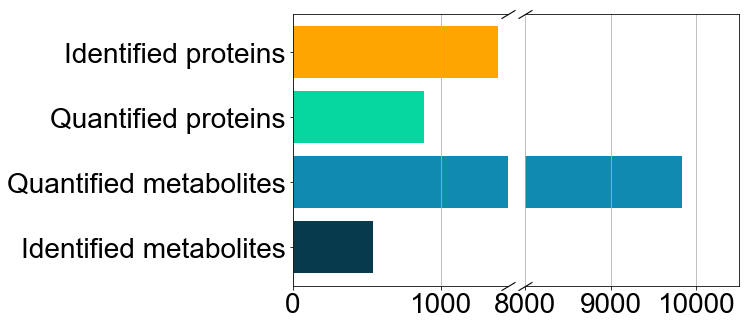

In [453]:

# Sample data
y = [ 'Identified metabolites','Quantified metabolites','Quantified proteins','Identified proteins' ]
x = np.array([541, 9829, 885,1387])
colors = ['#073b4c', '#118ab2', '#06d6a0', 'orange']

# set figure size

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8,5)
# set font size
plt.rcParams.update({'font.size': 12})

# set tick font size
ax1.tick_params(axis='both', which='major', labelsize=28)
ax2.tick_params(axis='both', which='major', labelsize=28)


ax1.barh(y, x,color=colors)
ax1.set_xlim(0, 1450)
ax1.spines['right'].set_visible(False)
ax1.set_xticks(np.arange(0, 1450, 1000))

ax1.xaxis.grid(True)


ax2.barh(y, x,color=colors)
ax2.set_xlim(8000, 10500)
ax2.spines['left'].set_visible(False)
ax2.set_xticks(np.arange(8000, 10500, 1000))
ax2.yaxis.set_visible(False)
ax2.xaxis.grid(True)
# Set x-axis label
#ax.set_xlabel('Value')
d = .6  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=14,
              linestyle="none", color='k', mec='k', mew=1.1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

fig.subplots_adjust(wspace=0.08)

plt.savefig(f'{figure_save_path}/barplot_macro_dataquality_multiome.svg',bbox_inches='tight',dpi = 1000)



# Show plot
plt.show()

# PCA analysis

In [47]:
treatment=['Con']*6 + ['LPS']*6 + ['IL_4']*6 + ['IRD']*6
PCA_pro_sig=df_pro_sig.T
# PCA_pro_sig=df_multi_sig.T
# PCA_pro_sig=df4.T


In [48]:
# set the data soucrce
# df = df_multi_sig.T
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_PCA_plot(inputdf = PCA_pro_sig,save_name = "PCA_proteome"):
    # standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(inputdf)   
    # perform PCA with 2 principal components
    pca = PCA(n_components=2)
    pca.fit(X_scaled) 
    # transform the features to the new space
    X_pca = pca.transform(X_scaled)   
    # create a new dataframe with the principal components and target variable
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['target'] = treatment
    matplotlib.rcParams['font.family'] = "Arial"
    plt.figure(figsize=(6, 5.5), edgecolor='#04253a')
    sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, s=280)
    plt.yticks([-20, -10, 0, 10, 20],fontsize=24)
    plt.xticks([-20, -10, 0, 10, 20],fontsize=24)
    # plt.yticks([-8, -4, 0, 4, 8],fontsize=24)   # for metabolome 
    # plt.xticks([-10, -5, 0, 5, 10],fontsize=24) # for metabolome 
    plt.xlabel('PC 1', fontsize=24)
    plt.ylabel('PC 2', fontsize=24)
    plt.legend(bbox_to_anchor=(1.18, 0.99), loc='upper center', ncol=1, borderaxespad=0.1,fontsize=18)
    plt.savefig(f'{figure_save_path}/{save_name}.svg',bbox_inches='tight')
    plt.show()

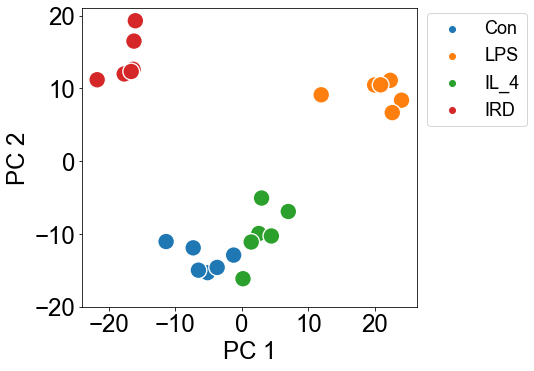

In [250]:
plot_PCA_plot(inputdf = PCA_pro_sig,save_name = "PCA_proteome")

In [254]:

# plot_PCA_plot(inputdf = df_meta_sig.T,save_name = "PCA_metabolome")

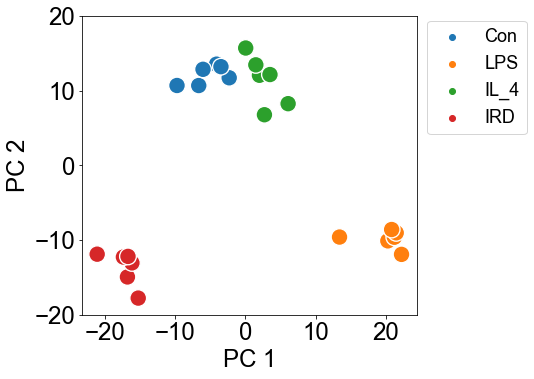

In [251]:
plot_PCA_plot(inputdf = df_multi_sig.T,save_name = "PCA_multiome")

In [78]:
# dfpro_sig.to_csv(r'C:\Users\jiangy5\Box\SMAD PROJECT\Macrophage_reanalysis\Macro_sig_proteins.csv')

In [79]:
# dfpro_sig.filter(regex='TP', axis=0)

In [405]:
# Top feature analysis for the PCA analysis 

df_pca_analysis = pd.read_csv(f'{file_save_path}/multiome_all_zscore_row_raw.csv',index_col=0)
new_pcadf_index_names = [item.split("_")[0] for item in df_pca_analysis.index]
df_pca_analysis.index = new_pcadf_index_names
# df_pca_analysis

In [404]:
# 由于数据的行是特征，列是样本，我们需要先进行转置
df_pca_analysis_transposed = df_pca_analysis.T.drop(columns=['Eicosapentaenoyl PAF C-16 '])

# 定义组别
group_mapping = {**{f'A{i}': 'Control' for i in range(1, 7)},
                 **{f'B{i}': 'LPS' for i in range(1, 7)},
                 **{f'C{i}': 'IL-4' for i in range(1, 7)},
                 **{f'D{i}': 'Irradiation' for i in range(1, 7)}}

# 重新添加 group 信息
df_pca_analysis_transposed['Group'] = df_pca_analysis_transposed.index.map(group_mapping)


In [402]:
# 分离特征数据
df_pca_features = df_pca_analysis_transposed.drop(columns=['Group'])

# 重新标准化数据
pca_scaler = StandardScaler()
df_pca_scaled = pca_scaler.fit_transform(df_pca_features)

# ==== 继续 PCA 分析 ====
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca_scaled)
loadings = pca.components_.T
explained_variance = pca.explained_variance_ratio_

# 计算特征贡献度
feature_contribution = np.abs(loadings[:, 0] * explained_variance[0]) + np.abs(loadings[:, 1] * explained_variance[1])

# # ==== PCA 结果可视化 ====
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1],
#                 hue=df_pca_analysis_transposed['Group'], alpha=0.7, palette="Set1")
# plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
# plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
# plt.title("PCA Analysis of Treatment Groups")
# plt.legend()
# plt.show()

# ==== 计算组间均值差异 ====
group_means = df_pca_analysis_transposed.groupby("Group").mean()
mean_diff = group_means.max() - group_means.min()

# ==== ANOVA 统计检验 ====
anova_p_values = {}
for feature in df_pca_features.columns:
    groups = [df_pca_features.loc[df_pca_analysis_transposed['Group'] == g, feature] for g in df_pca_analysis_transposed['Group'].unique()]
    anova_p_values[feature] = f_oneway(*groups)[1]

# 转换为 DataFrame
anova_p_values_df = pd.DataFrame.from_dict(anova_p_values, orient="index", columns=["p-value"])


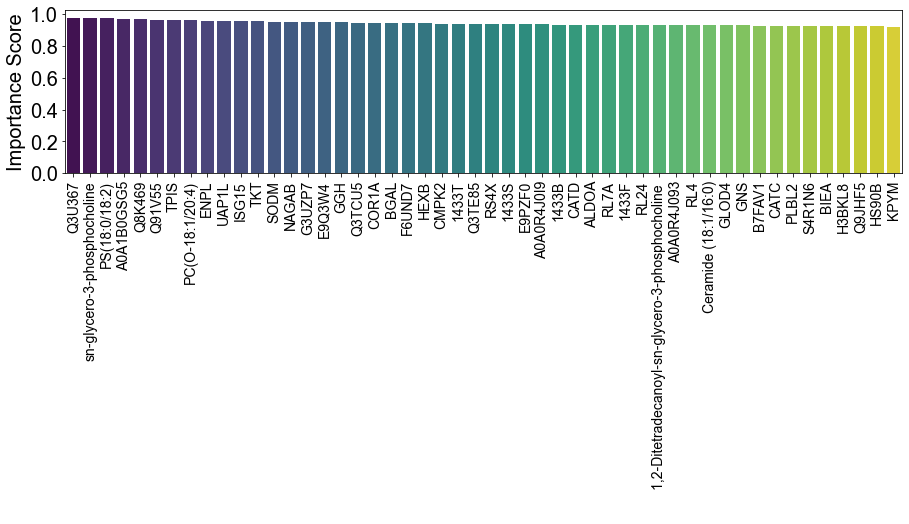

In [429]:

# ==== 计算综合评分 ====
importance_df = pd.DataFrame({
    "Feature": df_pca_features.columns,
    "PCA_Contribution": feature_contribution,
    "Mean_Difference": mean_diff.values,
    "p-value": anova_p_values_df["p-value"].values
})

# 归一化特征值
importance_df["PCA_Contribution"] /= importance_df["PCA_Contribution"].max()
importance_df["Mean_Difference"] /= importance_df["Mean_Difference"].max()

# 计算综合评分
importance_df["Score"] = (importance_df["PCA_Contribution"] * 0.5 +
                          importance_df["Mean_Difference"] * 0.3 +
                          (1 - importance_df["p-value"]) * 0.2)

# 排序并取前 20 个特征
top_features = importance_df.sort_values(by="Score", ascending=False).head(50)

# # 显示前 20 个关键特征
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Top 20 Features Contributing to Treatment Differences", dataframe=top_features)

# ==== 6. 可视化 Top 20 特征 ====
plt.figure(figsize=(15, 3))
sns.barplot(data=top_features, x="Feature", y="Score", palette="viridis")
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 20)
plt.xlabel(" ", fontsize = 24)
plt.ylabel("Importance Score", fontsize = 20)
# plt.title("Top 20 Features Contributing to Treatment Differences")
plt.savefig(f'{figure_save_path}/top_50features_pca_multiome.svg', dpi=800, bbox_inches='tight')
plt.show()

In [441]:
from scipy.stats import ttest_ind

def get_top_features_between_groups(df_transposed, group1, group2, top_n=20):
    """
    计算两个处理组之间的差异，并筛选出前 N 个最重要的特征。
    
    参数:
        df_transposed (DataFrame): 转置后的数据，行是样本，列是特征，包含 'Group' 列。
        group1 (str): 第一个处理组的名称 (如 "Control")。
        group2 (str): 第二个处理组的名称 (如 "LPS")。
        top_n (int): 返回的特征数量，默认为 20。
    
    返回:
        DataFrame: 包含前 N 个最重要特征的表格。
    """
    # 筛选出两个组的数据
    df_group1 = df_transposed[df_transposed["Group"] == group1].drop(columns=["Group"])
    df_group2 = df_transposed[df_transposed["Group"] == group2].drop(columns=["Group"])

    # 计算均值差异
    mean_diff = (df_group1.mean() - df_group2.mean()).abs()

    # 计算 t-检验 p-value
    p_values = {feature: ttest_ind(df_group1[feature], df_group2[feature], equal_var=False)[1]
                for feature in df_group1.columns}
    p_values_df = pd.DataFrame.from_dict(p_values, orient="index", columns=["p-value"])

    # 计算综合评分（均值差异 + 统计显著性）
    importance_df = pd.DataFrame({
        "Feature": df_group1.columns,
        "Mean_Difference": mean_diff.values,
        "p-value": p_values_df["p-value"].values
    })

    # 归一化均值差异
    importance_df["Mean_Difference"] /= importance_df["Mean_Difference"].max()

    # 计算最终评分
    importance_df["Score"] = (importance_df["Mean_Difference"] * 0.5 +
                              (1 - importance_df["p-value"]) * 0.5)

    # 按评分排序并取前 N 个特征
    top_features = importance_df.sort_values(by="Score", ascending=False).head(top_n)

    # # 显示结果
    # import ace_tools as tools
    # tools.display_dataframe_to_user(name=f"Top {top_n} Features: {group1} vs {group2}", dataframe=top_features)

    # 可视化
    plt.figure(figsize=(10, 3))
    sns.barplot(data=top_features, x="Feature", y="Score", palette="viridis")
    plt.xticks(rotation=90, fontsize = 14)
    plt.yticks(fontsize = 20)
    plt.xlabel(" ", fontsize = 24)
    plt.ylabel("Importance Score", fontsize = 20)
    plt.title(f"Top {top_n} Features Differentiating {group1} vs {group2}")
    plt.savefig(f'{figure_save_path}/{group1} vs {group2}.svg', dpi=800, bbox_inches='tight')
    plt.show()
    # return top_features


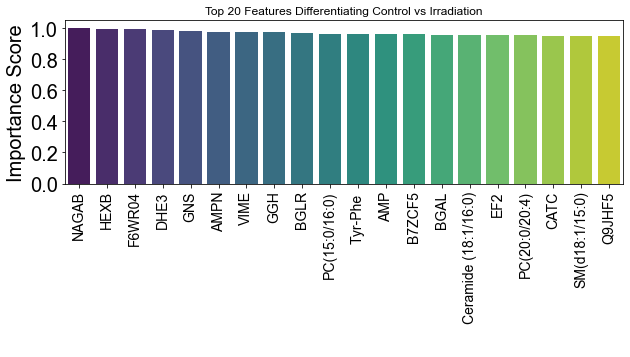

In [442]:
# 例子: 计算 Control vs LPS 之间最重要的 20 个特征
get_top_features_between_groups(df_pca_analysis_transposed, "Control", "Irradiation", top_n=20)

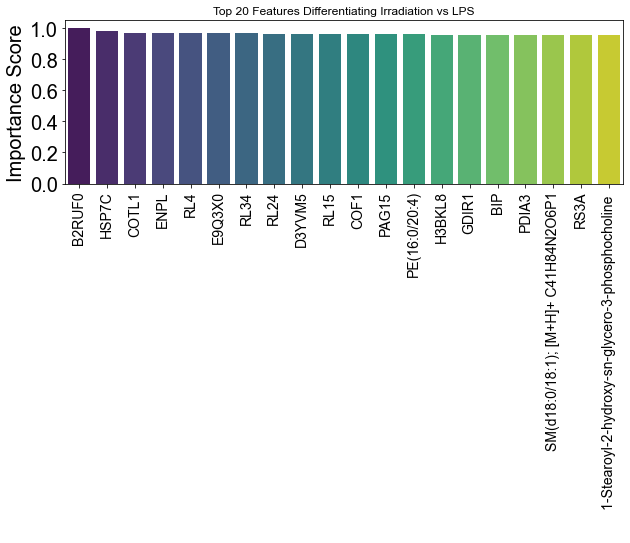

In [443]:
get_top_features_between_groups(df_pca_analysis_transposed, "Irradiation", "LPS", top_n=20)

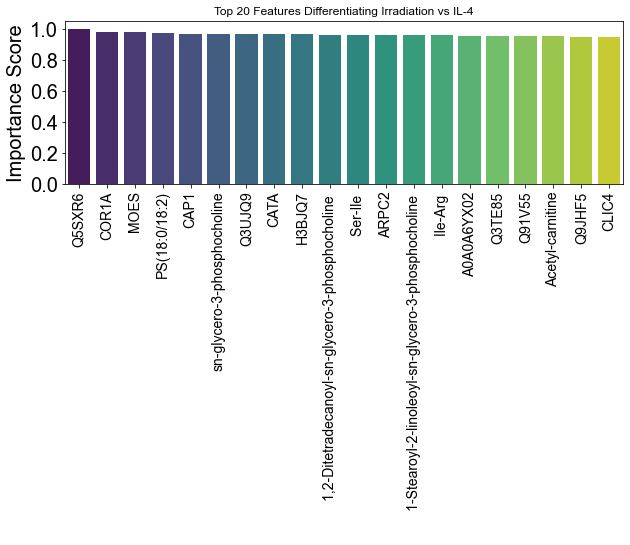

In [444]:
get_top_features_between_groups(df_pca_analysis_transposed, "Irradiation", "IL-4", top_n=20)

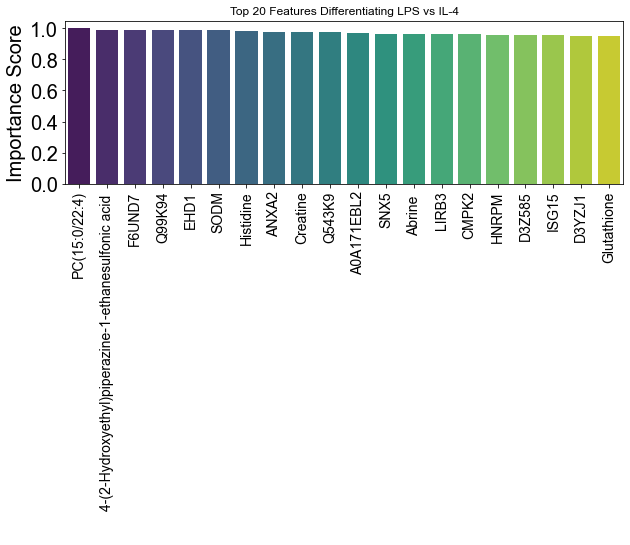

In [445]:
get_top_features_between_groups(df_pca_analysis_transposed, "LPS", "IL-4", top_n=20)

#  mean

In [49]:
#calculate the mean value of proteins from 6 repeats in each treatment 

def get_mean_macrophage_dataset(df =standardscaler_row(df = df4)):
    '''input is a 24 columns dataset and every 6 columns is a treatment'''

    con=df.iloc[:,:6].mean(axis=1).tolist()
    lps=df.iloc[:,6:12].mean(axis=1).tolist()
    IL_4=df.iloc[:,12:18].mean(axis=1).tolist()
    IRD=df.iloc[:,18:24].mean(axis=1).tolist()
    newdict={'Con':con,'LPS':lps,'IL_4':IL_4,'IRD':IRD}
    
    df_mean=pd.DataFrame.from_dict(newdict)
    df_mean.index=df.index
    return df_mean

In [203]:
# get_mean_macrophage_dataset(df =standardscaler_row(df = df_pro_sig))

In [204]:
# sigpro_stdrow.index = [item.split('|')[-1].split("_")[0] for item in sigpro_stdrow.index]
# sigpro_stdrow

# read significant metabolome dataset 

In [50]:
# read raw dataset of metabolome
df_meta = pd.read_excel(f'{file_read_path}\macro_metabolites_raw.xlsx',sheet_name = 'Sheet1') 
df_meta.set_index('mz',inplace=True)
# read significant changed dataset of metabolome
# df_meta_sig = pd.read_csv(f'{file_read_path}\metabolome_dysregu_sig_macro_withnames.csv',index_col = 0)
df_meta_sig = pd.read_csv(f'{file_read_path}\metabolome_dysregu_sig_macro_withnames_cleaned.csv',index_col = 0)


In [454]:
df_meta_sig

A1         A2  \
mz_rounded                                                                 
2-Amino-1-phenylethanol                              0.678567   0.705860   
Creatine                                             3.830259   4.481498   
Choline                                             11.212369  13.774257   
Spermine                                             1.006438   0.686243   
Tyrosine                                            -0.121873  -0.126942   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.548396   0.676434   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.801443  12.094157   
PC(P-18:0/22:6)                                      1.628845   1.764228   
PC(18:0/22:5)                                        3.209576   3.592405   
PC(20:0/20:4)                                        0.457305   0.612521   

                                                           A3         A4  \
mz_rounded                                                                 
2-Amino-1-phenylethanol                              0.972894   1.048241   
Creatine                                             4.167329   4.976003   
Choline                                             12.908271  10.616185   
Spermine                                             0.537483   0.517705   
Tyrosine                                            -0.113639  -0.117758   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.744884   0.807308   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  12.924627  14.057593   
PC(P-18:0/22:6)                                      1.765206   1.897375   
PC(18:0/22:5)                                        3.627563   4.019865   
PC(20:0/20:4)                                        0.571177   0.680283   

                                                           A5         A6  \
mz_rounded                                                                 
2-Amino-1-phenylethanol                              0.776894   1.412174   
Creatine                                             3.849278   4.987346   
Choline                                              9.659261  12.656414   
Spermine                                             0.622198   0.748118   
Tyrosine                                            -0.121217  -0.117690   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.713422   0.675452   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.569353  13.655107   
PC(P-18:0/22:6)                                      1.564549   1.780722   
PC(18:0/22:5)                                        3.282450   3.697989   
PC(20:0/20:4)                                        0.527726   0.643777   

                                                           B1         B2  \
mz_rounded                                                                 
2-Amino-1-phenylethanol                              0.659598   0.688195   
Creatine                                             1.770704   1.771048   
Choline                                              3.750752   4.484459   
Spermine                                             0.325732   0.310789   
Tyrosine                                            -0.126922  -0.122953   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.717171   0.697543   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.318380  11.238045   
PC(P-18:0/22:6)                                      1.339201   1.671730   
PC(18:0/22:5)                                        3.127535   3.167042   
PC(20:0/20:4)                                        0.567006   0.592968   

                                                           B3         B4  ...  \
mz_rounded            

In [28]:

df_meta_filter = df_meta[(df_meta >= 5000).all(axis=1)]
df_meta_filter

A1        A2        A3        A4        A5        A6  \
mz                                                                       
103.05445    19080.0   17900.0   22080.0   21070.0   20310.0   26800.0   
106.08668    10790.0    8605.0   11910.0   20410.0   10720.0   18590.0   
114.09163    26180.0   30400.0   34120.0   52020.0   35490.0   63800.0   
119.04943     6226.0    5279.0    7889.0    6684.0    6524.0    9310.0   
120.08104   287200.0  271700.0  343500.0  347100.0  313300.0  422600.0   
...              ...       ...       ...       ...       ...       ...   
1004.24506   87970.0   38310.0   23620.0   40200.0   63550.0  452900.0   
1010.49387   15870.0   15100.0   28120.0   11550.0   22940.0   18910.0   
1007.24173   27660.0    6916.0    7498.0    7146.0   18690.0  129000.0   
1020.21906   45930.0   21310.0    9358.0   20070.0   24690.0  248000.0   
1006.59126   29740.0   25920.0   27200.0   23490.0   19500.0    9219.0   

                  B1        B2        B3        B4  ...        C3        C4  \
mz                                                  ...                       
103.05445    20440.0   20940.0   18890.0   22230.0  ...   43110.0   37800.0   
106.08668    22860.0   28620.0   17400.0   14570.0  ...   17070.0   13110.0   
114.09163    35360.0   33240.0   40230.0   44030.0  ...   68400.0   61040.0   
119.04943     5653.0    6031.0    6012.0    6079.0  ...   14980.0   13290.0   
120.08104   271400.0  284400.0  248200.0  268900.0  ...  664600.0  576500.0   
...              ...       ...       ...       ...  ...       ...       ...   
1004.24506  132000.0   63390.0   61970.0   36380.0  ...   58450.0   49470.0   
1010.49387    8833.0   11230.0    6931.0   13380.0  ...   22140.0   31400.0   
1007.24173   38020.0   15390.0   14340.0    8609.0  ...   17090.0   13290.0   
1020.21906   49360.0   14910.0   17720.0   11980.0  ...   26720.0   24890.0   
1006.59126   25050.0   23020.0   10650.0    8951.0  ...   15140.0   18180.0   

                  C5        C6        D1        D2        D3        D4  \
mz                                                                       
103.05445    45120.0   36570.0   21420.0   21130.0   24660.0   23850.0   
106.08668    15140.0   14900.0   12280.0    7827.0   19620.0   18550.0   
114.09163    59490.0   54470.0   28970.0   31570.0   70080.0   54710.0   
119.04943    14360.0   11810.0    6898.0    6167.0    8084.0    7555.0   
120.08104   646400.0  616100.0  350700.0  320900.0  389800.0  336100.0   
...              ...       ...       ...       ...       ...       ...   
1004.24506   26420.0  296200.0  849500.0   86210.0   73990.0   54150.0   
1010.49387   28910.0   23640.0   24310.0   12400.0   13070.0   16840.0   
1007.24173   12640.0   87920.0  228000.0   25340.0   18840.0   13720.0   
1020.21906    6865.0  165700.0  328500.0   34360.0   31480.0   21190.0   
1006.59126   23640.0   19630.0   16350.0   23890.0   18380.0   14620.0   

                  D5        D6  
mz                              
103.05445    23830.0   21140.0  
106.08668    16160.0   14570.0  
114.09163    55330.0   58830.0  
119.04943     9112.0    6350.0  
120.08104   398000.0  318100.0  
...              ...       ...  
1004.24506   33370.0   42000.0  
1010.49387   19270.0   11340.0  
1007.24173    7186.0   12190.0  
1020.21906    9837.0   16340.0  
1006.59126   18200.0   12980.0  

[2931 rows x 24 columns]

In [30]:
#  read raw metabolome dataset to calculate CV distribution

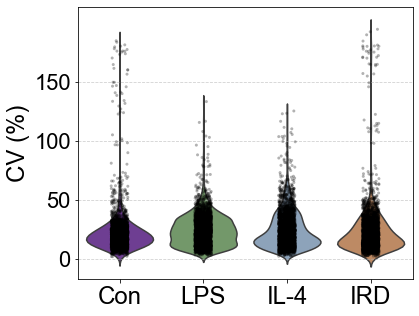

In [206]:
# plot CV violin-dot for metabolome dataset of macrophages

# Define treatments and replicates
dfdfmeta = df_meta_filter

treatments = {
    "Con": dfdfmeta.iloc[:, 0:6],
    "LPS": dfdfmeta.iloc[:, 6:12],
    "IL-4": dfdfmeta.iloc[:, 12:18],
    "IRD": dfdfmeta.iloc[:, 18:24]
}

# Calculate CV for each protein in each treatment
cv_data = {}
for treat, values in treatments.items():
    cv = (values.std(axis=1) / values.mean(axis=1)) * 100
    cv_data[treat] = cv

# Create a new DataFrame for CV values
cv_df = pd.DataFrame(cv_data)

# Melt the DataFrame for plotting
cv_melted = cv_df.melt(var_name="Treatment", value_name="CV")
# Define your custom palette
# Define your custom palette
custom_palette = {
    "Con": "#7030A0", "LPS": "#6F9F63",  "IL-4": "#85A3C2", "IRD": "#CC8855" }
# Plot violin plot with dots
plt.figure(figsize=(6, 5))
plt.rcParams['font.family'] = 'Arial'
sns.violinplot(x="Treatment", y="CV", data=cv_melted, inner=None, scale="width", palette=custom_palette)
sns.stripplot(x="Treatment", y="CV", data=cv_melted, color="black", size=3, jitter=True, alpha=0.3)
# plt.title("Coefficient of Variation (CV) by Treatment")
plt.ylabel("CV (%)",fontsize = 24)
plt.yticks([0, 50, 100, 150],fontsize = 22)
plt.xticks(fontsize = 24)
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.savefig(f'{figure_save_path}/CV_plot_metabolome.svg',bbox_inches='tight',dpi =1000)
plt.show()

In [84]:
# plot_clusterheatmap(df_me.T, low=-2, high=2)

# integrate proteome and metabolome dataset

In [51]:
new_column_name = df_meta_sig.columns
df_pro_sig.columns = new_column_name

In [52]:
df_multi_sig = pd.concat([df_pro_sig,df_meta_sig],axis = 0)
df_multi = pd.concat([df4,df_meta_sig],axis = 0)

In [53]:
df_multi_weo = pd.concat([haha_df,df_meta_sig],axis = 0)

real_column_names_to = ["Con1","Con2","Con3","Con4","Con5","Con6","LPS1","LPS2","LPS3","LPS4","LPS5","LPS6",
                        "IL1", "IL2" , "IL3","IL4" ,"IL5" ,"IL6" ,"IRA1","IRA2","IRA3","IRA4","IRA5","IRA6",]
df_multi_weo.columns = real_column_names_to 
# df_multi_weo.to_csv(f'{file_save_path}/multiome_all_zscore_raw.csv')

In [54]:
df_multi2 = df_multi.copy()
df_multi2.index = [item.split('|')[-1] for item in df_multi.index]
# standardscaler_row(df_multi2[~df_multi2.index.duplicated(keep='first')]).to_csv(f'{file_save_path}/multiome_all_zscore_row_raw.csv')

In [55]:
df_multi_nor = standardscaler_row(df_multi)

In [56]:
woai = standardscaler_row(df_multi_weo).copy()



In [16]:
dfmulti_stdbyrow_mean =  get_mean_macrophage_dataset(df = woai)
dfmulti_stdbyrow_mean

NameError: name 'get_mean_macrophage_dataset' is not defined

In [57]:

# standardscaler_row(df = df_multi_weo).to_csv(f'{file_save_path}/multiome_splited_zscore_row_allraw.csv')

In [58]:
# get_mean_macrophage_dataset(df =standardscaler_row(df = df_multi_weo)).to_csv(f'{file_save_path}/multiome_all_zscore_raw_mean.csv')

In [59]:
# standardscaler_row(df = df_multi_sig)

In [60]:
sig_multi_ssbyrow = standardscaler_row(df = df_multi_sig)



sig_multi_mean_ssbyrow = get_mean_macrophage_dataset(df =sig_multi_ssbyrow)

In [61]:
# sig_multi_mean_ssbyrow.to_csv(f'{file_save_path}/multiome_sig_zscore_mean.csv')

# K means clustering

In [62]:
df_multi_sig

A1         A2  \
1/sp|O08529|CAN2_MOUSE                               0.261779   0.169324   
1/sp|O08749|DLDH_MOUSE                              -0.254792  -0.141971   
1/sp|O08795|GLU2B_MOUSE                              0.284068   0.231582   
1/sp|O08807|PRDX4_MOUSE                              2.404427   2.508318   
1/sp|O08997|ATOX1_MOUSE                             -0.040803  -0.104313   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.548396   0.676434   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.801443  12.094157   
PC(P-18:0/22:6)                                      1.628845   1.764228   
PC(18:0/22:5)                                        3.209576   3.592405   
PC(20:0/20:4)                                        0.457305   0.612521   

                                                           A3         A4  \
1/sp|O08529|CAN2_MOUSE                               0.273492   0.178511   
1/sp|O08749|DLDH_MOUSE                              -0.310627  -0.243267   
1/sp|O08795|GLU2B_MOUSE                              0.289485   0.193721   
1/sp|O08807|PRDX4_MOUSE                              2.317293   2.352831   
1/sp|O08997|ATOX1_MOUSE                             -0.393455  -0.088165   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.744884   0.807308   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  12.924627  14.057593   
PC(P-18:0/22:6)                                      1.765206   1.897375   
PC(18:0/22:5)                                        3.627563   4.019865   
PC(20:0/20:4)                                        0.571177   0.680283   

                                                           A5         A6  \
1/sp|O08529|CAN2_MOUSE                               0.338167   0.245746   
1/sp|O08749|DLDH_MOUSE                              -0.369222  -0.419146   
1/sp|O08795|GLU2B_MOUSE                              0.228158   0.260514   
1/sp|O08807|PRDX4_MOUSE                              2.539985   2.457636   
1/sp|O08997|ATOX1_MOUSE                              0.067130  -0.086408   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.713422   0.675452   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.569353  13.655107   
PC(P-18:0/22:6)                                      1.564549   1.780722   
PC(18:0/22:5)                                        3.282450   3.697989   
PC(20:0/20:4)                                        0.527726   0.643777   

                                                           B1         B2  \
1/sp|O08529|CAN2_MOUSE                              -0.032840   0.009486   
1/sp|O08749|DLDH_MOUSE                              -0.142676  -0.094446   
1/sp|O08795|GLU2B_MOUSE                              0.383515   0.424922   
1/sp|O08807|PRDX4_MOUSE                              2.406417   2.477600   
1/sp|O08997|ATOX1_MOUSE                             -0.341382  -0.468907   
...                                                       ...        ...   
PC(17:0/18:1)                                        0.717171   0.697543   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  11.318380  11.238045   
PC(P-18:0/22:6)                                      1.339201   1.671730   
PC(18:0/22:5)                                        3.127535   3.167042   
PC(20:0/20:4)                                        0.567006   0.592968   

                                                           B3         B4  ...  \
1/sp|O08529|CAN2_MOUSE                              -0.002325   0.014372  ...   
1/sp|O08749|DLDH_MOUSE                              -0.131789  -0.042683  ...   
1/sp|O08795|GLU2B_MOUSE                              0.375322   0.347770  ...   
1/sp|O08807|PRDX4_MOUSE                              2.449687   2.493028  ...   
1/

In [63]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.show()

C:\Users\jymbc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jymbc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jymbc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jymbc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

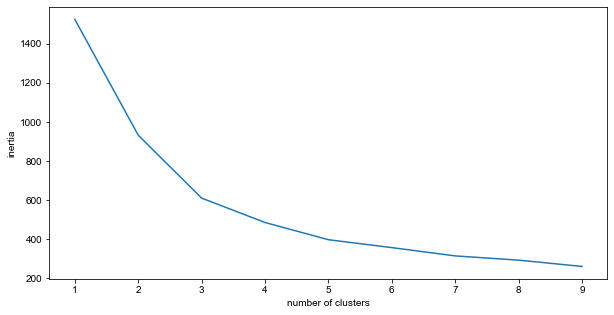

In [286]:
# optimise_k_means(sig_multi_mean_ssbyrow,10)

optimise_k_means(sig_multi_mean_ssbyrow,10)

In [64]:
kmean_df = sig_multi_mean_ssbyrow.copy()

kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(kmean_df[['Con','LPS','IL_4','IRD']])

kmean_df['kmeans']=kmeans.labels_


C:\Users\jymbc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [41]:
# kmean_df.to_csv(f'{file_save_path}/Macrophages_multiome_kmeans_clustering.csv')

In [42]:
# [item for item in kmean_df.index if "BOVIN" in item]

In [65]:
result = kmean_df.drop('1/sp|P02769|ALBU_BOVIN')
result2 = result.iloc[:,:4]
result2

Con       LPS  \
1/sp|O08529|CAN2_MOUSE                              1.162271 -1.080416   
1/sp|O08749|DLDH_MOUSE                             -1.074608  0.399216   
1/sp|O08795|GLU2B_MOUSE                            -0.317815  1.278383   
1/sp|O08807|PRDX4_MOUSE                            -0.490841 -0.162886   
1/sp|O08997|ATOX1_MOUSE                             0.803498 -1.243222   
...                                                      ...       ...   
PC(17:0/18:1)                                      -0.146825  0.918745   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.007180  0.425555   
PC(P-18:0/22:6)                                    -0.339693 -0.325463   
PC(18:0/22:5)                                      -0.485571 -0.384653   
PC(20:0/20:4)                                      -0.766994 -0.234376   

                                                        IL_4       IRD  
1/sp|O08529|CAN2_MOUSE                             -0.455185  0.373331  
1/sp|O08749|DLDH_MOUSE                             -0.265823  0.941215  
1/sp|O08795|GLU2B_MOUSE                             0.083481 -1.044049  
1/sp|O08807|PRDX4_MOUSE                            -0.643126  1.296853  
1/sp|O08997|ATOX1_MOUSE                            -0.029765  0.469489  
...                                                      ...       ...  
PC(17:0/18:1)                                       0.533587 -1.305507  
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.999973 -1.432707  
PC(P-18:0/22:6)                                    -0.622474  1.287630  
PC(18:0/22:5)                                      -0.414559  1.284783  
PC(20:0/20:4)                                      -0.546208  1.547577  

[617 rows x 4 columns]

In [66]:
sig_cluster3=result.loc[result['kmeans']==3]
sig_cluster2=result.loc[result['kmeans']==2]
sig_cluster1=result.loc[result['kmeans']==1]
sig_cluster0=result.loc[result['kmeans']==0]

# Create a dictionary of cluster names and corresponding data
cluster_data = {'multiCluster1': result2.loc[list(sig_cluster0.index)],
                'multiCluster2': result2.loc[list(sig_cluster1.index)],
                'multiCluster3': result2.loc[list(sig_cluster2.index)],
                'multiCluster4': result2.loc[list(sig_cluster3.index)]}




In [164]:
cluster_data['multiCluster1']

Con       LPS  \
1/sp|O35129|PHB2_MOUSE                             -0.837352 -0.557075   
1/sp|P08207|S10AA_MOUSE                             0.518725 -0.356004   
1/sp|P09405|NUCL_MOUSE                             -0.451703  0.515594   
1/sp|P10852|4F2_MOUSE                               0.211923 -0.313680   
1/sp|P11152|LIPL_MOUSE                             -0.364846 -0.257695   
...                                                      ...       ...   
1-Palmitoyl-2-myristoyl-sn-glycero-3-phosphocho... -0.267336 -0.158966   
PC(O-16:0/16:1)                                     0.127974 -0.763419   
PE(P-16:0/22:6)                                     0.406154 -0.373313   
1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-... -0.385524 -0.103537   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.007180  0.425555   

                                                        IL_4       IRD  
1/sp|O35129|PHB2_MOUSE                              0.993133  0.401295  
1/sp|P08207|S10AA_MOUSE                             0.697515 -0.860236  
1/sp|P09405|NUCL_MOUSE                              0.966600 -1.030491  
1/sp|P10852|4F2_MOUSE                               0.887029 -0.785272  
1/sp|P11152|LIPL_MOUSE                              1.233768 -0.611226  
...                                                      ...       ...  
1-Palmitoyl-2-myristoyl-sn-glycero-3-phosphocho...  1.311063 -0.884761  
PC(O-16:0/16:1)                                     1.433078 -0.797633  
PE(P-16:0/22:6)                                     0.979487 -1.012328  
1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-...  1.267119 -0.778058  
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.999973 -1.432707  

[112 rows x 4 columns]

In [165]:
# Using 'with ... as writer:' automatically closes the file once done.
with pd.ExcelWriter(r'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\files\multiome_clusters.xlsx') as writer:
    for sheet_name, data_df in cluster_data.items():
        # Convert the data to a DataFrame
        df_all_clusters = pd.DataFrame(data_df)
        
        # Write DataFrame to the specified sheet
        # index=False to avoid writing row indices
        df_all_clusters.to_excel(writer, sheet_name=sheet_name, index=True)

In [45]:
cluster_data['multiCluster4']

Con       LPS      IL_4       IRD
1/sp|O08749|DLDH_MOUSE  -1.074608  0.399216 -0.265823  0.941215
1/sp|O08807|PRDX4_MOUSE -0.490841 -0.162886 -0.643126  1.296853
1/sp|O09159|MA2B1_MOUSE -0.499961 -0.533236 -0.200553  1.233749
1/sp|O35405|PLD3_MOUSE  -0.157679 -0.888595 -0.375217  1.421492
1/sp|O35604|NPC1_MOUSE  -0.738375 -0.341005 -0.471535  1.550915
...                           ...       ...       ...       ...
PS(18:0/18:2)           -0.067625 -0.654678 -0.890643  1.612946
PC(O-18:1/20:4)         -0.554853 -0.495819 -0.643431  1.694103
PC(P-18:0/22:6)         -0.339693 -0.325463 -0.622474  1.287630
PC(18:0/22:5)           -0.485571 -0.384653 -0.414559  1.284783
PC(20:0/20:4)           -0.766994 -0.234376 -0.546208  1.547577

[151 rows x 4 columns]

[84, 28]


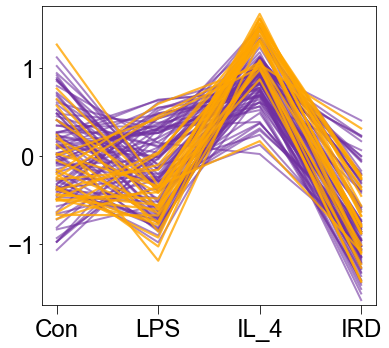

[165, 16]


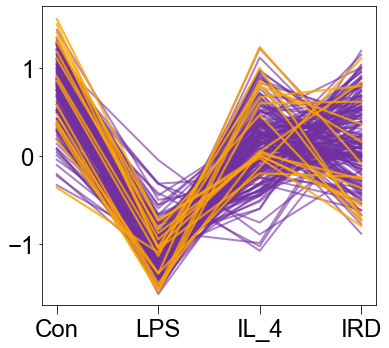

[161, 12]


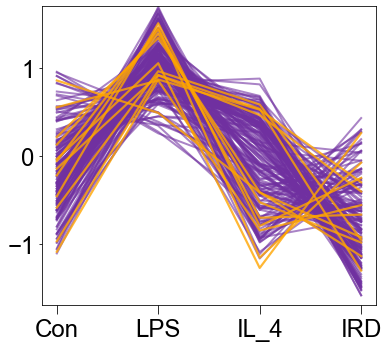

[135, 16]


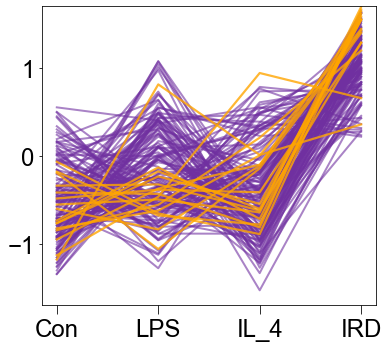

In [455]:
x=['Con','LPS','IL_4','IRD']
# Loop over the dictionary items to plot the data for each cluster
for title, data in cluster_data.items():
    plt.figure(figsize=(6, 5.5), edgecolor='#04253a')
    plt.rcParams['font.family'] = 'Arial'
    num1,num2=[],[]
    for index in data.index:
        if '_MOUSE' in index:
            plt.plot(x,list(data.loc[index]),color="#7030A0",alpha=0.6,linewidth=2,label='proteins')
            num1.append(index)
        else:
            plt.plot(x,list(data.loc[index]),color="#FFA500",alpha=0.8,linewidth=2.2,label='metabolites') 
            num2.append(index)
    print([len(num1),len(num2)])
    #plt.title(title, fontsize=24)
    #plt.xlabel('Treatment', fontsize=24)
    #plt.ylabel('Score', fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.ylim(-1.7,1.7)
    plt.yticks([-1,  0,  1])
    plt.tick_params(axis='x', which='both', length=9)
    plt.savefig(f'{figure_save_path}/{title}.svg')
    plt.show()

# Gene enrichment of different clusters
# protein functions

In [47]:
import gseapy as gp

In [48]:
df_cluster1 = kmean_df[kmean_df['kmeans'] == 0]
df_cluster2 = kmean_df[kmean_df['kmeans'] == 1]
df_cluster3 = kmean_df[kmean_df['kmeans'] == 2]
df_cluster4 = kmean_df[kmean_df['kmeans'] == 3]

In [16]:
def get_proteins_and_metabolites_from_clusters(df_cluster = df):
    Genename = [item for item in df_cluster.index if 'MOUSE' in item ] 
    metabolites = [item for item in df_cluster.index if 'MOUSE' not in item ] 
    return [Genename,metabolites]
    
def extract_genenames_from_proteinlist(input_prolist = get_proteins_and_metabolites_from_clusters(df_cluster = df)[0]):
    '''input is a protein list'''
    ko = []
    for i in input_prolist:
        ko.append(process_protein_index(i))
    ki = [item for sublist in ko if sublist is not None for item in sublist]
    return [j.split('|')[-1].split('_')[0] for j in ki]


In [586]:
# List of input dataframes
dataframes = [df_cluster1, df_cluster2, df_cluster3, df_cluster4]

# List of sheet names corresponding to the clusters
sheet_names = ['cluster1', 'cluster2', 'cluster3', 'cluster4']

excel_file = f'{file_save_path}/protein_pathways_clusters.xlsx'

# Create a Pandas Excel writer object
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    for i, df_cluster in enumerate(dataframes):
        # Extract protein and metabolite lists from the cluster
        proteins, _ = get_proteins_and_metabolites_from_clusters(df_cluster=df_cluster)
        
        # Extract gene names from the protein list
        gene_list_selected = extract_genenames_from_proteinlist(input_prolist=proteins)
        
        # Perform enrichment analysis
        enr_pro = gp.enrichr(
            gene_list=gene_list_selected,
            gene_sets='KEGG_2019_Mouse',
            organism='Mouse',
            outdir="results",  # Results directory
            cutoff=1.0  # Include all pathways regardless of p-value
        )
        
        # Get enrichment results as a dataframe
        pathway_pro = enr_pro.results
        
        # Save the results to a sheet in the Excel file
        sheet_name = sheet_names[i]
        pathway_pro.to_excel(writer, sheet_name=sheet_name, index=False)

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].

In [65]:
# extract_genenames_from_proteinlist(input_prolist = df4.index)

In [593]:

gene_list_selected = extract_genenames_from_proteinlist(input_prolist = df4.index)

enr_pro = gp.enrichr(gene_list= gene_list_selected, 
                 gene_sets='KEGG_2019_Mouse', 
                 organism='Mouse',  
                 # outdir='enrichr_results'  
                 outdir="results",
                 cutoff=1.0  
                )

pathway_pro = enr_pro.results
pathway_pro.iloc[:30,:]

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(
Exception ignored in: <function ZipFile.__del__ at 0x000002654F91B820>
Traceback (most recent call last):
  File "C:\Users\jiangy5\Anaconda3\lib\zipfile.py", line 1816, in __del__
    self.clos

Gene_set                                          Term Overlap  \
0   KEGG_2019_Mouse        Bacterial invasion of epithelial cells   14/74   
1   KEGG_2019_Mouse                                   Endocytosis  31/269   
2   KEGG_2019_Mouse                        Cholesterol metabolism    8/49   
3   KEGG_2019_Mouse              Fc gamma R-mediated phagocytosis   12/87   
4   KEGG_2019_Mouse                          Salmonella infection   11/78   
5   KEGG_2019_Mouse        Fluid shear stress and atherosclerosis  17/143   
6   KEGG_2019_Mouse                 Glycosaminoglycan degradation    4/21   
7   KEGG_2019_Mouse                     Pentose phosphate pathway    5/32   
8   KEGG_2019_Mouse          Leukocyte transendothelial migration  13/115   
9   KEGG_2019_Mouse                            Huntington disease  20/192   
10  KEGG_2019_Mouse                             Sulfur metabolism     2/9   
11  KEGG_2019_Mouse                                   Ferroptosis    5/40   
12  KEGG_2019_Mouse                        Glutathione metabolism    7/64   
13  KEGG_2019_Mouse                             Pancreatic cancer    8/75   
14  KEGG_2019_Mouse                                     Pertussis    8/76   
15  KEGG_2019_Mouse                             Parkinson disease  14/144   
16  KEGG_2019_Mouse                                Tight junction  16/167   
17  KEGG_2019_Mouse                                      Lysosome  12/124   
18  KEGG_2019_Mouse                                 Legionellosis    6/58   
19  KEGG_2019_Mouse   Amino sugar and nucleotide sugar metabolism    5/49   
20  KEGG_2019_Mouse                             Adherens junction    7/72   
21  KEGG_2019_Mouse                             Phototransduction    3/27   
22  KEGG_2019_Mouse                                   Spliceosome  12/132   
23  KEGG_2019_Mouse                                        Glioma    7/75   
24  KEGG_2019_Mouse           Amyotrophic lateral sclerosis (ALS)    5/52   
25  KEGG_2019_Mouse      C-type lectin receptor signaling pathway  10/112   
26  KEGG_2019_Mouse                Sphingolipid signaling pathway  11/124   
27  KEGG_2019_Mouse                      Other glycan degradation    2/18   
28  KEGG_2019_Mouse  Metabolism of xenobiotics by cytochrome P450    6/66   
29  KEGG_2019_Mouse                    Cardiac muscle contraction    7/78   

     P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0   0.002387          0.584804            0                     0    2.640214   
1   0.032215          0.999996            0                     0    1.474997   
2   0.043350          0.999996            0                     0    2.201970   
3   0.049777          0.999996            0                     0    1.806716   
4   0.051331          0.999996            0                     0    1.853573   
5   0.074726          0.999996            0                     0    1.523977   
6   0.086649          0.999996            0                     0    2.652262   
7   0.115383          0.999996            0                     0    2.087573   
8   0.144050          0.999996            0                     0    1.437937   
9   0.154759          0.999996            0                     0    1.312540   
10  0.163453          0.999996            0                     0    3.218405   
11  0.224812          0.999996            0                     0    1.609711   
12  0.265551          0.999996            0                     0    1.383827   
13  0.266983          0.999996            0                     0    1.345563   
14  0.278950          0.999996            0                     0    1.325703   
15  0.286237          0.999996            0                     0    1.213901   
16  0.287938          0.999996            0                     0    1.194479   
17  0.311929          0.999996            0                     0    1.207407   
18  0.335041          0.999996            0                     0    1.299745   
19 

In [565]:
pathway_pro = enr_pro.results
pathway_pro.to_csv(f'{file_save_path}/cluster4_protein_pathways.csv')

# 11 clusters of proteins 

In [15]:
def plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')], 
                           low = -1 ,high = 1,figure_size = (10,8),set_row_cluster = True, set_col_cluster = True ):

    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "PuOr"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap,cbar=True, vmin=low, vmax=high,
                        figsize = figure_size,  # Set the figure size here
                        row_cluster=set_row_cluster,  # Enable row clustering
                        col_cluster=set_col_cluster,  # Enable column clustering
                        dendrogram_ratio=(.1, .1),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 1}, # Make dendrogram lines invisible
                        cbar_pos=(-0.09, 0.8, 0.03, 0.15))
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize = 20) 
    
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), rotation=360, fontsize=16) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)  # Customize x-tick labels
    # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()
    
from scipy.interpolate import make_interp_spline

def plot_select_proteins_pattern(dfdf = df4,figuresize=(10, 5)): 
    
    # Set the same palette
    palette = sns.color_palette("viridis", len(dfdf["Protein"].unique()))
    order = dfdf["treatment"].unique()
    palette2 = sns.color_palette("Set1", len(dfdf["Protein"].unique()))
    # Create figure
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize = figuresize)
    sns.boxplot(
        x="treatment", y="Value", hue="Protein", data=dfdf,
        palette=palette, dodge=True, width=0.6, showfliers=False, order=order, 
        # legend=True
    )
    
    # Plot fitted curve for each protein
    proteins = dfdf["Protein"].unique()
    for i, protein in enumerate(proteins):
        # Extract data for the current protein
        protein_data = dfdf[dfdf["Protein"] == protein]
        medians = [protein_data[protein_data["treatment"] == treatment]["Value"].median() for treatment in order]
        treatment_indices = np.arange(len(order))  # Numeric x-values for treatments
    
        # Create a smooth curve using spline interpolation
        spline = make_interp_spline(treatment_indices, medians, k=3)  # k=3 for cubic spline
        smooth_x = np.linspace(treatment_indices.min(), treatment_indices.max(), 300)  # Generate 300 points for smoothness
        smooth_y = spline(smooth_x)
    
        # Plot the smooth curve
        plt.plot(smooth_x, smooth_y, linestyle='dashed', color=palette2[i], linewidth=2,
                 label=f'{protein} Curve')
    
    # Add labels and ticks
    plt.xlabel(" ")
    plt.ylabel("Z-Score", fontsize=22)
    plt.xticks(np.arange(len(order)), order, fontsize=22)  # Use original treatment names as ticks
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    # Optional: Show legend for the protein curves
    plt.legend(title="", bbox_to_anchor=(1.0, 1), loc='upper left')
    # plt.savefig(f'{figure_save_path}/{savename}.svg', dpi=800, bbox_inches='tight')
    plt.show()
    
def plot_clustered_heatmap_ytick(dfheatmap=dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')], 
                           low=-1, high=1, figure_size=(10,8), set_row_cluster=True, set_col_cluster=True,savename = "heatmap"):
    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "PuOr"
    
    # Set font family
    plt.rcParams['font.family'] = 'Arial'
    
    # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax=high,
                        figsize=figure_size,           # Set the figure size here
                        row_cluster=set_row_cluster,   # Enable row clustering
                        col_cluster=set_col_cluster,   # Enable column clustering
                        dendrogram_ratio=(.1, .05),      # Minimize the dendrogram size
                        tree_kws={'linewidths': 1},      # Make dendrogram lines invisible
                        cbar_pos=(-0.07, 0.8, 0.03, 0.15))
    
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20) 

    # Get the original y-tick labels as text
    yticks = [tick.get_text() for tick in ax.ax_heatmap.get_yticklabels()]
    # Apply the transformation: split each label by "_" and take the first part
    new_yticks = [item.split("_")[0].split("|")[-1] for item in yticks]
    
    # Set the new y-tick labels with your desired rotation and fontsize
    ax.ax_heatmap.set_yticklabels(new_yticks, rotation=360, fontsize=22) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=24)  # Customize x-tick labels
    
    # Customize tick parameters (e.g., remove x tick marks)
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    plt.savefig(f'{figure_save_path}/{savename}.svg', dpi=800, bbox_inches='tight')
    plt.show()



from scipy.stats import pearsonr
from scipy.stats import spearmanr

# plot joint-plot to check the correlation of selected two drugs 
def plot_jointplot(gene1='DFO', gene2='Acamprosate', df=dfmulti_stdbyrow_mean.T): 
    # Extract values for the selected genes
    x_value = df[gene1]
    y_value = df[gene2]
    
    # Compute Pearson and Spearman correlations
    corre1, p_value1 = pearsonr(x_value, y_value)
    corre2, p_value2 = spearmanr(x_value, y_value)
    
    # Create the jointplot with a regression line
    g = sns.jointplot(
        x=x_value, y=y_value,
        # kind="reg", 
        color="purple", height=6
    )
    
    # Adjust figure size and aesthetics
    g.fig.set_size_inches(5.3, 5) 
    g.ax_joint.tick_params(labelsize=22)
    g.set_axis_labels(gene1, gene2, fontsize=24)
    
    # Print correlation statistics
    print(f"Spearman correlation: {corre2}, p-value: {p_value2}\n"
          f"Pearson correlation: {corre1}, p-value: {p_value1}")
    
    plt.show()

NameError: name 'dfmulti_stdbyrow_mean' is not defined

In [310]:
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
Seaborn version: 0.11.2


In [4]:
ucla_df = pd.read_csv(r'C:\Users\jymbc\Desktop\multiome_all_zscore_raw_mean_proteins_splited_macrophages.csv',index_col=0)

In [8]:
ucla_df.loc[pro_function_group1]

Con       LPS      IL_4       IRD
P17710|HXK1_MOUSE   0.105689  0.477710 -0.683086  0.099686
O08528|HXK2_MOUSE  -0.232126  0.589720  0.089456 -0.447050
P06745|G6PI_MOUSE   1.262590 -1.072368 -0.377437  0.187215
P12382|PFKAL_MOUSE  0.464419 -0.853483  0.065354  0.323711
Q9WUA3|PFKAP_MOUSE  0.701036 -1.379049  0.075199  0.602815
P05064|ALDOA_MOUSE  1.207831 -1.253180 -0.067364  0.112714
P17751|TPIS_MOUSE   1.205294 -1.357253  0.267407 -0.115448
P16858|G3P_MOUSE    1.039078 -0.891167 -0.153130  0.005219
P09411|PGK1_MOUSE   1.327380 -1.125876  0.289608 -0.491111
Q9DBJ1|PGAM1_MOUSE  1.214945 -1.089839  0.216498 -0.341603
P17182|ENOA_MOUSE   1.291409 -1.124272  0.334794 -0.501931
P52480|KPYM_MOUSE   0.978471 -1.394994  0.284197  0.132325
P06151|LDHA_MOUSE   1.256245 -0.762214  0.391397 -0.885429

In [89]:
treatment=['Con']*6 + ['LPS']*6 + ['IL_4']*6 + ['IRD']*6

def getdf(name='2/tr|A8XU21|A8XU21_MOUSE/sp|P97369|NCF4_MOUSE',df=dfpro_stdbyrow):    
    A=df.iloc[:,:6].loc[name].to_frame()
    A.columns=['Value']  
    B=df.iloc[:,6:12].loc[name].to_frame()
    B.columns=['Value']   
    C=df.iloc[:,12:18].loc[name].to_frame()
    C.columns=['Value'] 
    D=df.iloc[:,18:24].loc[name].to_frame()
    D.columns=['Value'] 
    made=pd.concat([A,B,C,D])
    made['treatment'] = treatment
    return(made)

def get_combined_df(protein_names, df, treatment):
    combined_df = pd.DataFrame()  # Initialize an empty DataFrame
    
    for name in protein_names:
        A = df.iloc[:, :6].loc[name].to_frame()
        A.columns = ['Value']
        B = df.iloc[:, 6:12].loc[name].to_frame()
        B.columns = ['Value']
        C = df.iloc[:, 12:18].loc[name].to_frame()
        C.columns = ['Value']
        D = df.iloc[:, 18:24].loc[name].to_frame()
        D.columns = ['Value']
        
        # Combine the data for this protein
        protein_df = pd.concat([A, B, C, D])
        protein_df['treatment'] = treatment
        protein_df['Protein'] = name  # Add a column to indicate the protein name
        
        # Append to the combined DataFrame
        combined_df = pd.concat([combined_df, protein_df])
    
    return combined_df
    
import re

def sanitize_filename(name):
    # Define a pattern for invalid characters
    # On Windows, the following characters are invalid: < > : " / \ | ? *
    # You can adjust the pattern based on your requirements
    invalid_chars = r'[<>:"/\\|?*()]'
    # Replace invalid characters with an underscore
    sanitized = re.sub(invalid_chars, '_', name)
    # Optionally, replace spaces with underscores
    sanitized = sanitized.replace(' ', '_')
    return sanitized
    
def plot_selected_molecule(listname = ['proname'],df_name = dfpro_stdbyrow, figuresize = (5.5,5),
                          save_path = r'C:\Users\jiangy5\Box\SMAD PROJECT\figures\Mainpart 3_Macrophages polarization\sig_metabolites_boxstripplot_path'):
    for number in listname:
        plt.figure(figsize = figuresize)
        dataset=getdf(name=number,df=df_name)
        #palette = ['#9B3A4D', '#E2AE79', '#497EB2','#D0DCAA', '#8CBDA7', '#68AC57','#70A0AC']
        ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
        ax = sns.stripplot(x="treatment", y="Value", data=dataset, color="black",size=8)
        ax.set_xlabel("")
        ax.set_ylabel("Z-Score", fontsize=22)
        ax.tick_params(axis='both', labelsize=22)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        sns.despine(top=True, right=True)
        # plt.title(number, fontsize=22)
        savename = sanitize_filename(number)
        plt.savefig(f'{save_path}/{savename}.svg',dpi=800,bbox_inches='tight')
        plt.show()


In [7]:
# >>> group1: glycolysis/gluconeogenesis-related proteins
pro_function_group1  = [
                        'P17710|HXK1_MOUSE',
                        'O08528|HXK2_MOUSE',
                        'P06745|G6PI_MOUSE',
                        'P12382|PFKAL_MOUSE',
                        'Q9WUA3|PFKAP_MOUSE',
                        'P05064|ALDOA_MOUSE',
                        'P17751|TPIS_MOUSE',
                        'P16858|G3P_MOUSE',
                        'P09411|PGK1_MOUSE',
                        'Q9DBJ1|PGAM1_MOUSE',
                        'P17182|ENOA_MOUSE',
                        'P52480|KPYM_MOUSE',
                        'P06151|LDHA_MOUSE'  ]



In [253]:
[item.split("_")[0] for item in pro_function_group1]

['P17710|HXK1',
 'O08528|HXK2',
 'P06745|G6PI',
 'P12382|PFKAL',
 'Q9WUA3|PFKAP',
 'P05064|ALDOA',
 'P17751|TPIS',
 'P16858|G3P',
 'P09411|PGK1',
 'Q9DBJ1|PGAM1',
 'P17182|ENOA',
 'P52480|KPYM',
 'P06151|LDHA']

In [74]:
def get_selected_proteins(listgroup = pro_function_group1, raw_df = df_multi_nor):
        
    # Create a regex pattern to match any of the substrings
    pattern = '|'.join(listgroup)    
    # Locate rows where index contains any of the substrings
    selected_df = raw_df[raw_df.index.str.contains(pattern, case=False, na=False)]
    return selected_df

In [306]:
dfmulti_stdbyrow_mean.loc[pro_function_group1]

Con       LPS      IL_4       IRD
P17710|HXK1_MOUSE   0.105689  0.477710 -0.683086  0.099686
O08528|HXK2_MOUSE  -0.232126  0.589720  0.089456 -0.447050
P06745|G6PI_MOUSE   1.262590 -1.072368 -0.377437  0.187215
P12382|PFKAL_MOUSE  0.464419 -0.853483  0.065354  0.323711
Q9WUA3|PFKAP_MOUSE  0.701036 -1.379049  0.075199  0.602815
P05064|ALDOA_MOUSE  1.207831 -1.253180 -0.067364  0.112714
P17751|TPIS_MOUSE   1.205294 -1.357253  0.267407 -0.115448
P16858|G3P_MOUSE    1.039078 -0.891167 -0.153130  0.005219
P09411|PGK1_MOUSE   1.327380 -1.125876  0.289608 -0.491111
Q9DBJ1|PGAM1_MOUSE  1.214945 -1.089839  0.216498 -0.341603
P17182|ENOA_MOUSE   1.291409 -1.124272  0.334794 -0.501931
P52480|KPYM_MOUSE   0.978471 -1.394994  0.284197  0.132325
P06151|LDHA_MOUSE   1.256245 -0.762214  0.391397 -0.885429

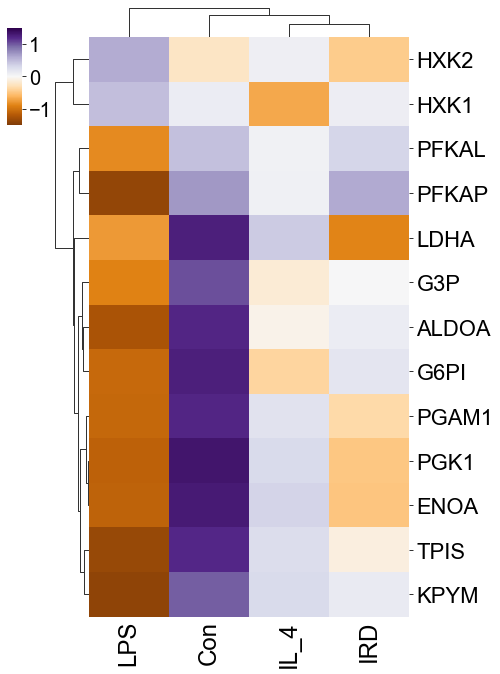

In [347]:
plot_clustered_heatmap_ytick(dfheatmap = get_selected_proteins(listgroup = pro_function_group1, raw_df = dfmulti_stdbyrow_mean), 
                           low = -1.5 ,high = 1.5,figure_size = (7,9),set_row_cluster = True, set_col_cluster = True, savename = "glycolysis_heatmap")

In [316]:
# plot_jointplot(gene1 = 'P09411|PGK1_MOUSE', gene2 ='P05064|ALDOA_MOUSE', df = woai.T)

In [ ]:

# meta_list =  [  
#             'Glutathione',
#             'Arginine',
#             'Phosphocholine',
#             'Creatine',
#             'AMP',
#             'Carnitine', 
#             'Acetyl-carnitine',
#             'Butyryl-carnitine',





#             ]

meta_list3 = [ 'Spermidine',
              'Spermine',
 'Carnitine',
 'Glutathione',
 'Palmitoyl-carnitine',]

# meta_list2 =[ 'Creatine',
#  'Spermine',
#  'Tyrosine ',
#  'Histidine',
#  'Abrine ',
#  'Arginine',
#  'Acetyl-carnitine',
#  'Butyryl-carnitine',
#  'n,n-dimethylarginine',
#  'Lysine',
#  '5_Methylthioadenosine']
meta_list4 =[ 'Creatine',
             'Carnitine',
             'Spermidine',
             'Glutathione',
 'Tyrosine ',
 'Histidine',
 'Abrine ',
 'Arginine',
 'Lysine',]


In [78]:
dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('arnitine')].index

Index(['Carnitine', 'Acetyl-carnitine', 'Butyryl-carnitine',
       'Palmitoyl-carnitine'],
      dtype='object')

In [10]:
#  >>> group2: TCA cycle/oxidative phosphorylation/mitochondrial respiratory chain

pro_function_group2  = [
                        # --- TCA Cycle Enzymes ---
                        'Q9D2G2|ODO2_MOUSE',   # 2-oxoglutarate dehydrogenase (E1)
                        'Q8BMF4|ODP2_MOUSE',   # 2-oxoglutarate dehydrogenase (E2)
                        'Q9D051|ODPB_MOUSE',   # Pyruvate dehydrogenase (E1 beta subunit)
                        'O08749|DLDH_MOUSE',   # Dihydrolipoamide dehydrogenase (E3 for both PDH & α-KGDH)
                        'Q9CZU6|CISY_MOUSE',   # Citrate synthase
                        'Q99KI0|ACON_MOUSE',   # Aconitase (mitochondrial)
                        'O88844|IDHC_MOUSE',   # Isocitrate dehydrogenase [NADP(+)], mitochondrial
                        'Q9D6R2|IDH3A_MOUSE',  # Isocitrate dehydrogenase 3 alpha subunit [NAD(+)]
                        'Q8K2B3|SDHA_MOUSE',   # Succinate dehydrogenase flavoprotein subunit (Complex II)
                        'Q9WUM5|SUCA_MOUSE',   # Succinyl-CoA ligase [alpha subunit]
                        'P08249|MDHM_MOUSE',   # Malate dehydrogenase (mitochondrial)
                        
                        # --- Oxidative Phosphorylation (ETC) ---
                        # Complex I
                        'Q91VD9|NDUS1_MOUSE',  # NADH-ubiquinone oxidoreductase Fe-S protein 1
                        'Q9D8B4|NDUAB_MOUSE',  # NADH-ubiquinone oxidoreductase subunit (1 alpha subcomplex B)
                        'Q7TMF3|NDUAC_MOUSE',  # NADH-ubiquinone oxidoreductase subunit AC
                    
                        # Complex II (also part of TCA above: SDHA_MOUSE)
                        
                        # Complex III
                        'Q9CQ69|QCR8_MOUSE',   # Ubiquinol-cytochrome c reductase subunit 8
                        'Q9CZ13|QCR1_MOUSE',   # Ubiquinol-cytochrome c reductase core protein 1
                        'P99028|QCR6_MOUSE',   # Cytochrome b-c1 complex subunit 6
                        'Q62426|CYTB_MOUSE',   # Cytochrome b (mtDNA-encoded)
                    
                        # Cytochrome c (carrier between III & IV)
                        'P62897|CYC_MOUSE',    # Cytochrome c
                    
                        # Complex IV
                        'P00405|COX2_MOUSE',   # Cytochrome c oxidase subunit 2
                        'P12787|COX5A_MOUSE',  # Cytochrome c oxidase subunit 5A
                        'P19536|COX5B_MOUSE',  # Cytochrome c oxidase subunit 5B
                    
                        # Complex V (ATP Synthase)
                        'P56135|ATPK_MOUSE',   # ATP synthase subunit k
                        'P56382|ATP5E_MOUSE',  # ATP synthase subunit epsilon
                        'P56480|ATPB_MOUSE',   # ATP synthase subunit beta
                        'Q9D3D9|ATPD_MOUSE',   # ATP synthase subunit d
                        'Q9DB20|ATPO_MOUSE',   # ATP synthase subunit O
                        'Q9CQQ7|AT5F1_MOUSE',  # ATP synthase subunit f
                        'Q9DCX2|ATP5H_MOUSE'   # ATP synthase subunit H
                    ]

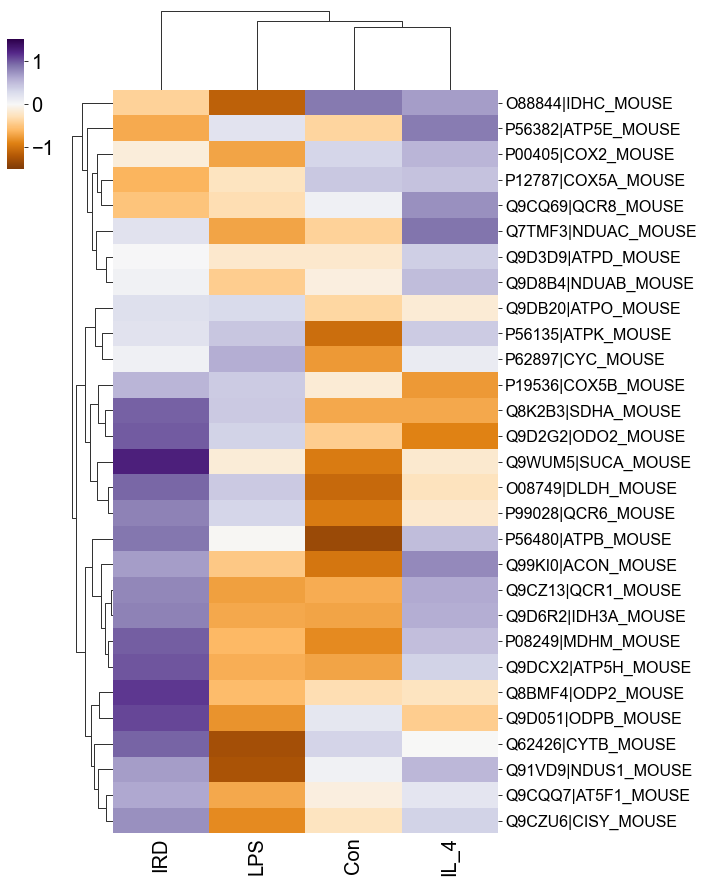

In [329]:
plot_clustered_heatmap(dfheatmap = get_selected_proteins(listgroup = pro_function_group2, raw_df = dfmulti_stdbyrow_mean), 
                           low = -1.5 ,high = 1.5,figure_size = (8,12),set_row_cluster = True, set_col_cluster = True)

In [189]:
sam = pro_function_group1 + pro_function_group2

pp = [item.split("|")[-1] for item in sam]
pp

['HXK1_MOUSE',
 'HXK2_MOUSE',
 'G6PI_MOUSE',
 'PFKAL_MOUSE',
 'PFKAP_MOUSE',
 'ALDOA_MOUSE',
 'TPIS_MOUSE',
 'G3P_MOUSE',
 'PGK1_MOUSE',
 'PGAM1_MOUSE',
 'ENOA_MOUSE',
 'KPYM_MOUSE',
 'LDHA_MOUSE',
 'ODO2_MOUSE',
 'ODP2_MOUSE',
 'ODPB_MOUSE',
 'DLDH_MOUSE',
 'CISY_MOUSE',
 'ACON_MOUSE',
 'IDHC_MOUSE',
 'IDH3A_MOUSE',
 'SDHA_MOUSE',
 'SUCA_MOUSE',
 'MDHM_MOUSE',
 'NDUS1_MOUSE',
 'NDUAB_MOUSE',
 'NDUAC_MOUSE',
 'QCR8_MOUSE',
 'QCR1_MOUSE',
 'QCR6_MOUSE',
 'CYTB_MOUSE',
 'CYC_MOUSE',
 'COX2_MOUSE',
 'COX5A_MOUSE',
 'COX5B_MOUSE',
 'ATPK_MOUSE',
 'ATP5E_MOUSE',
 'ATPB_MOUSE',
 'ATPD_MOUSE',
 'ATPO_MOUSE',
 'AT5F1_MOUSE',
 'ATP5H_MOUSE']

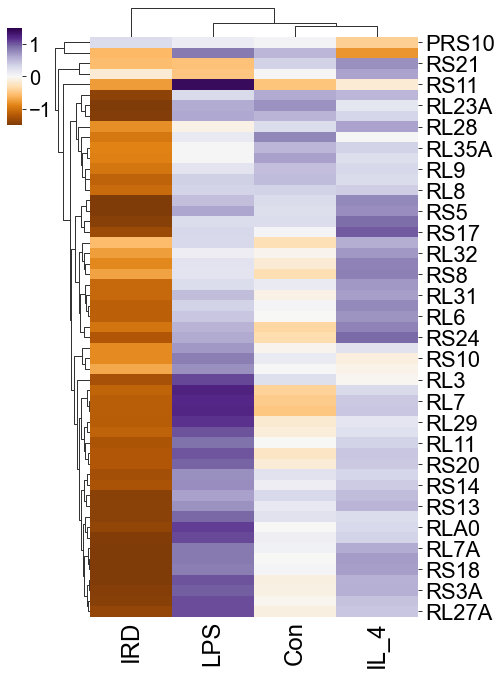

In [348]:
plot_clustered_heatmap_ytick(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group10], 
                           low = -1.5 ,high = 1.5,figure_size = (7,9),set_row_cluster = True, set_col_cluster = True,savename = "Ribosomal_heatmap")

In [14]:
#  >>> group3: Lipid/cholesterol/fatty acid metabolism

pro_function_group3  = [
                        # --- Cholesterol / Sterol Metabolism ---
                        'O35604|NPC1_MOUSE',
                        'Q9Z0J0|NPC2_MOUSE',
                        'Q8BLN5|LSS_MOUSE',
                        'Q61263|SOAT1_MOUSE',
                    
                        # --- Fatty Acid Oxidation ---
                        'Q07417|ACADS_MOUSE',
                        'P51174|ACADL_MOUSE',
                        'P50544|ACADV_MOUSE',
                        'Q9CQ62|DECR_MOUSE',
                        'Q99JY0|ECHB_MOUSE',
                        'Q8BH95|ECHM_MOUSE',
                        'Q8BMS1|ECHA_MOUSE',
                        'Q61425|HCDH_MOUSE',
                        'Q99LC5|ETFA_MOUSE',
                        'Q9DCW4|ETFB_MOUSE',
                    
                        # --- Phospholipid Metabolism ---
                        'O35405|PLD3_MOUSE',
                        'Q8BG07|PLD4_MOUSE',
                        'Q3TCN2|PLBL2_MOUSE',
                        'Q61233|PLSL_MOUSE',
                    
                        # --- Sphingolipid Metabolism ---
                        'O09005|DEGS1_MOUSE',
                        'P70158|ASM3A_MOUSE',
                        'Q9WV54|ASAH1_MOUSE',
                    
                        # --- Steroid / Sterol-Related Enzymes ---
                        'P50427|STS_MOUSE',
                        'Q61462|CY24A_MOUSE',
                    
                        # --- Fatty Acid / Lipid Binding & Transport ---
                        'Q05816|FABP5_MOUSE',
                        'Q08857|CD36_MOUSE',
                        'P32020|SCP2_MOUSE',
                        'P70296|PEBP1_MOUSE',
                        'P11152|LIPL_MOUSE',
                        'Q8VBT6|APOBR_MOUSE',
                        'Q9DBG5|PLIN3_MOUSE',
                        'O35114|SCRB2_MOUSE',
                    ]

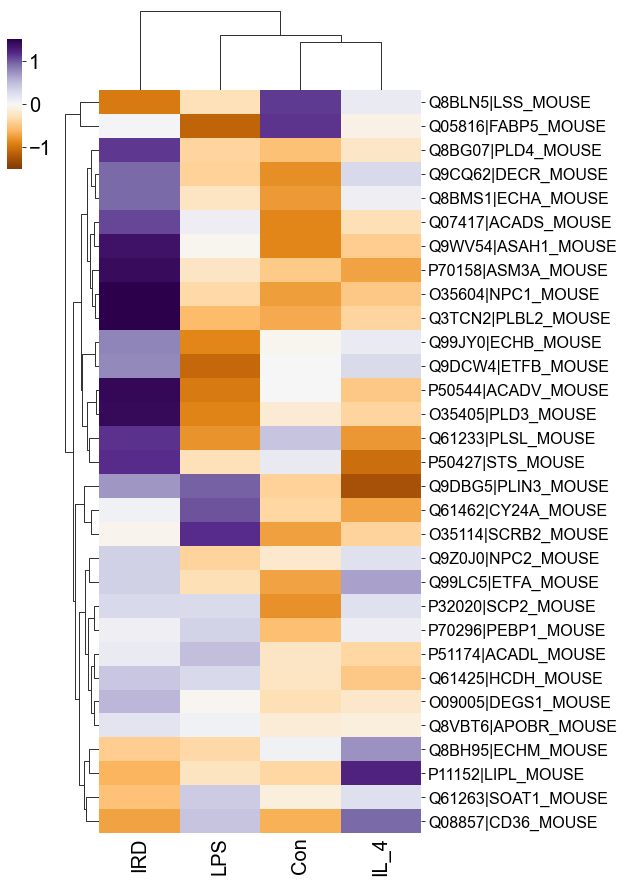

In [158]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group3], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12),set_row_cluster = True, set_col_cluster = True)

In [192]:
 multi_group2 = [       'Carnitine', 
                       'Acetyl-carnitine',
                       'Butyryl-carnitine',
                       'Palmitoyl-carnitine',                
                        #  'Q07417|ACADS_MOUSE',
                        # 'P51174|ACADL_MOUSE',
                        'P50544|ACADV_MOUSE',
                        # 'Q9CQ62|DECR_MOUSE',
                        # 'Q99JY0|ECHB_MOUSE',
                        # 'Q8BH95|ECHM_MOUSE',
                        # 'Q8BMS1|ECHA_MOUSE',
                        # 'Q61425|HCDH_MOUSE',
                        # 'Q99LC5|ETFA_MOUSE',
                        # 'Q9DCW4|ETFB_MOUSE',
                        # 'PC(15:0/22:4)'
                        # 'PC(16:1/22:6)'
                        # 'PC(18:1/20:4)'
                        'PC(17:0/18:1)']

In [215]:
multi_cluster = [                        # --- Cholesterol / Sterol Metabolism ---
                        'O35604|NPC1_MOUSE',
                        'Q9Z0J0|NPC2_MOUSE',
                        'Q8BLN5|LSS_MOUSE',
                        'Q61263|SOAT1_MOUSE',
                    
                        # --- Fatty Acid Oxidation ---
                        'Q07417|ACADS_MOUSE',
                        'P51174|ACADL_MOUSE',
                        'P50544|ACADV_MOUSE',
                        'Q9CQ62|DECR_MOUSE',
                        'Q99JY0|ECHB_MOUSE',
                        'Q8BH95|ECHM_MOUSE',
                        'Q8BMS1|ECHA_MOUSE',
                        'Q61425|HCDH_MOUSE',
                        'Q99LC5|ETFA_MOUSE',
                        'Q9DCW4|ETFB_MOUSE',
                    
                        # --- Phospholipid Metabolism ---
                        'O35405|PLD3_MOUSE',
                        'Q8BG07|PLD4_MOUSE',
                        'Q3TCN2|PLBL2_MOUSE',
                        'Q61233|PLSL_MOUSE',
                    
                        # --- Sphingolipid Metabolism ---
                        'O09005|DEGS1_MOUSE',
                        'P70158|ASM3A_MOUSE',
                        'Q9WV54|ASAH1_MOUSE',
                    
                        # --- Steroid / Sterol-Related Enzymes ---
                        'P50427|STS_MOUSE',
                        'Q61462|CY24A_MOUSE',
                    
                        # --- Fatty Acid / Lipid Binding & Transport ---
                        'Q05816|FABP5_MOUSE',
                        'Q08857|CD36_MOUSE',
                        'P32020|SCP2_MOUSE',
                        'P70296|PEBP1_MOUSE',
                        'P11152|LIPL_MOUSE',
                        'Q8VBT6|APOBR_MOUSE',
                        'Q9DBG5|PLIN3_MOUSE',
                        'O35114|SCRB2_MOUSE',
                        'Carnitine', 
                       'Acetyl-carnitine',
                       'Butyryl-carnitine',
                       'Palmitoyl-carnitine',  
                        'PC(15:0/22:4)',
                        'PC(16:1/22:6)',
                        'PC(18:1/20:4)',
                        'PC(17:0/18:1)',
                        ]

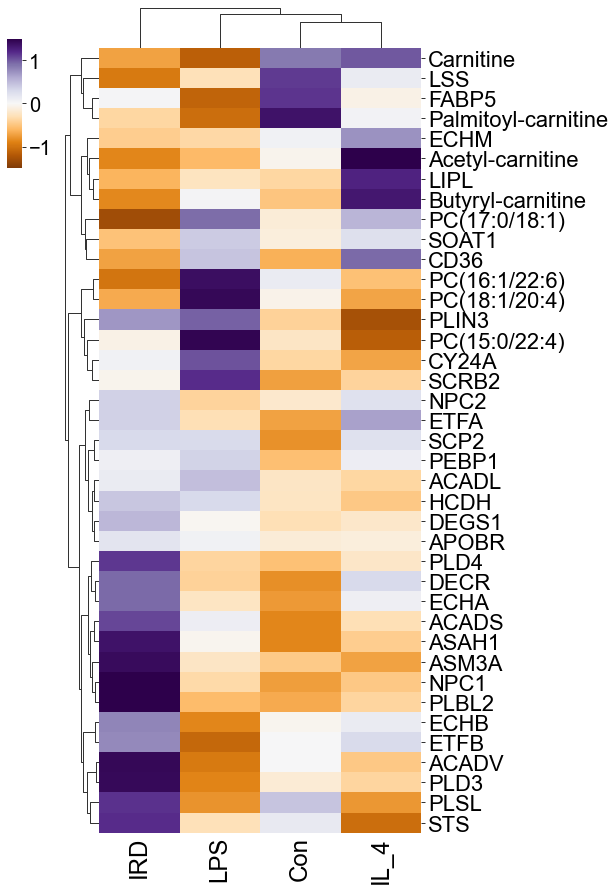

In [339]:
plot_clustered_heatmap_ytick(dfheatmap = dfmulti_stdbyrow_mean.loc[multi_cluster], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12),set_row_cluster = True, set_col_cluster = True,
                             savename = "lipid_metabolism_multiome_heatmap")

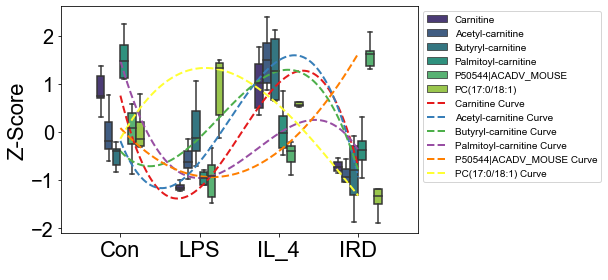

In [176]:
plot_select_proteins_pattern(dfdf = get_combined_df(multi_group2, woai, treatment),
                             figuresize=(6, 4))

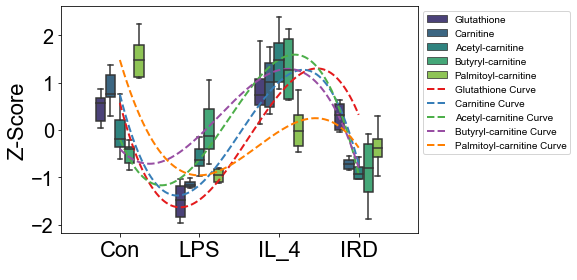

In [191]:
plot_select_proteins_pattern(dfdf = get_combined_df(multi_group1, woai, treatment),
                             figuresize=(6, 4))

In [9]:
#  >>> group4: redox/antioxidant proteins 

pro_function_group4  = [
                        # --- Superoxide Dismutases ---
                        'P08228|SODC_MOUSE',   # Superoxide dismutase [Cu-Zn]
                        'P09671|SODM_MOUSE',   # Superoxide dismutase [Mn], mitochondrial
                    
                        # --- Catalase ---
                        'P24270|CATA_MOUSE',   # Catalase
                    
                        # --- Peroxiredoxins ---
                        'P35700|PRDX1_MOUSE',  # Peroxiredoxin-1
                        'Q61171|PRDX2_MOUSE',  # Peroxiredoxin-2
                        'P20108|PRDX3_MOUSE',  # Peroxiredoxin-3, mitochondrial
                        'O08807|PRDX4_MOUSE',  # Peroxiredoxin-4
                    
                        # --- Thioredoxin System ---
                        'P10639|THIO_MOUSE',   # Thioredoxin
                        'Q9JMH6|TRXR1_MOUSE',  # Thioredoxin reductase 1
                        'Q9CQM5|TXD17_MOUSE',  # Thioredoxin domain-containing protein 17
                    
                        # --- Glutathione System ---
                        'P47791|GSHR_MOUSE',   # Glutathione reductase
                        'P10649|GSTM1_MOUSE',  # Glutathione S-transferase Mu 1
                        'O09131|GSTO1_MOUSE',  # Glutathione S-transferase Omega 1
                    
                        # --- Heme Oxygenase ---
                        'P14901|HMOX1_MOUSE',  # Heme oxygenase 1 (stress-inducible)
                    
                        # --- Additional Redox Proteins ---
                        'Q9Z0X1|AIFM1_MOUSE',  # Apoptosis-inducing factor (contains oxidoreductase domain)
                        'Q9R112|SQOR_MOUSE'    # Sulfide:quinone oxidoreductase
                    ]

In [219]:
# 氧化还原
multi_group1 = ['Glutathione', 
                'P47791|GSHR_MOUSE',  
                # 'P10649|GSTM1_MOUSE',
                # 'O09131|GSTO1_MOUSE'
               ]

multi_group2 = ['AMP',  # ATP synthase subunit k
              # 'P56135|ATPK_MOUSE', 
                # 'P56382|ATP5E_MOUSE', 
                'P56480|ATPB_MOUSE',
       # 'Q06185|ATP5I_MOUSE', 
       #          'Q9D3D9|ATPD_MOUSE', 
       #          'Q9DB20|ATPO_MOUSE',
       # 'Q03265|ATPA_MOUSE', 
                # 'Q9DCX2|ATP5H_MOUSE', 
               ]



multi_group3 = [  
                    'Acetyl-carnitine',
                        'PC(16:1/22:6)',
                    'P11152|LIPL_MOUSE',
               ]




In [183]:
dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')].index

Index(['P56135|ATPK_MOUSE', 'P56382|ATP5E_MOUSE', 'P56480|ATPB_MOUSE',
       'Q06185|ATP5I_MOUSE', 'Q9D3D9|ATPD_MOUSE', 'Q9DB20|ATPO_MOUSE',
       'Q03265|ATPA_MOUSE', 'Q9DCX2|ATP5H_MOUSE', 'Q91VR2|ATPG_MOUSE'],
      dtype='object')

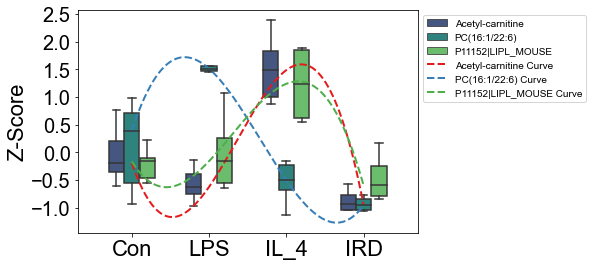

In [220]:
plot_select_proteins_pattern(dfdf = get_combined_df(multi_group3, woai, treatment),
                             figuresize=(6, 4))

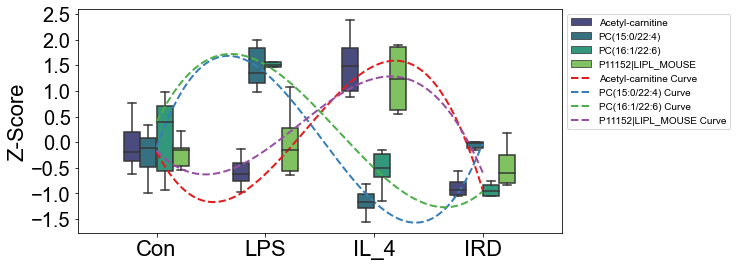

In [218]:
plot_select_proteins_pattern(dfdf = get_combined_df(multi_group3, woai, treatment),
                             figuresize=(8, 4))

In [10]:
ucla_df.loc[pro_function_group4]

Con       LPS      IL_4       IRD
P08228|SODC_MOUSE   0.013427 -0.579697 -0.526812  1.093082
P09671|SODM_MOUSE  -0.619047  1.620868 -0.926966 -0.074855
P24270|CATA_MOUSE   0.082029 -0.471593 -1.036247  1.425812
P35700|PRDX1_MOUSE  0.449116 -0.730388 -0.954424  1.235696
Q61171|PRDX2_MOUSE  0.866660 -0.759745  0.165126 -0.272041
P20108|PRDX3_MOUSE  0.333951 -0.570599 -0.268086  0.504734
O08807|PRDX4_MOUSE -0.490841 -0.162886 -0.643126  1.296853
P10639|THIO_MOUSE   0.395449 -0.768139  0.227116  0.145573
Q9JMH6|TRXR1_MOUSE  0.601055 -0.927796  0.194616  0.132124
Q9CQM5|TXD17_MOUSE  0.741307 -1.140514 -0.117304  0.516511
P47791|GSHR_MOUSE  -0.056053 -0.630819 -0.583452  1.270324
P10649|GSTM1_MOUSE  0.713025 -0.164545 -0.416935 -0.131544
O09131|GSTO1_MOUSE  0.182190 -1.089589  0.901473  0.005926
P14901|HMOX1_MOUSE  0.157452 -0.124494 -1.181982  1.149024
Q9Z0X1|AIFM1_MOUSE -0.832507 -0.094472  0.767733  0.159246
Q9R112|SQOR_MOUSE  -0.253180 -0.582488  0.215616  0.620052

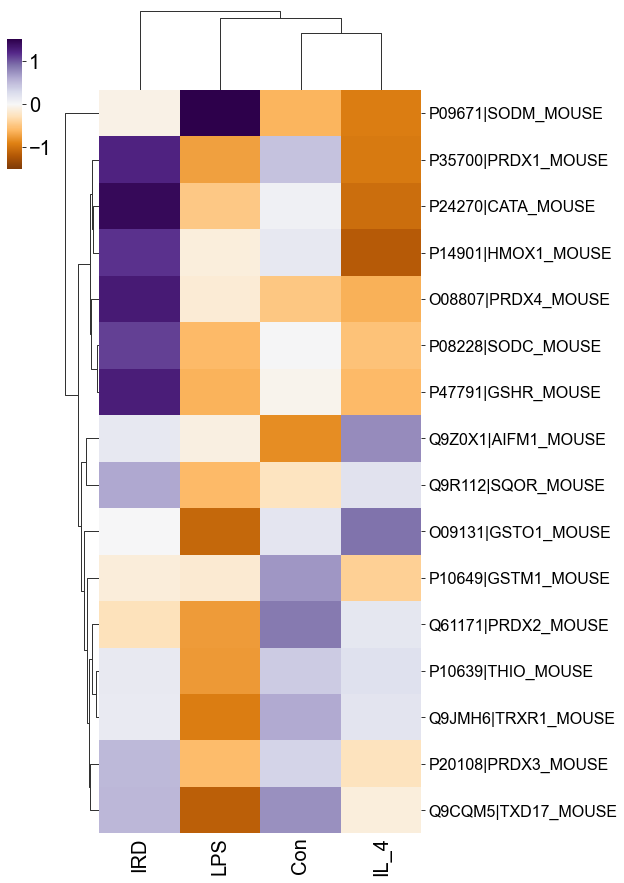

In [159]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group4], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12),set_row_cluster = True, set_col_cluster = True)

In [21]:
#  >>> group5: Small G protein / intracellular membrane transport/vesicle transport proteins 

pro_function_group5  = [
                        # ----------------------------------------------------------------
                        # 1) SMALL G PROTEINS (Ras superfamily)
                        # ----------------------------------------------------------------
                        'P84078|ARF1_MOUSE',    # ADP-ribosylation factor 1
                        'P61205|ARF3_MOUSE',    # ADP-ribosylation factor 3
                        'P61750|ARF4_MOUSE',    # ADP-ribosylation factor 4
                        'Q91YI0|ARLY_MOUSE',    # Arf-like protein (Arl)
                        'P62827|RAN_MOUSE',     # Ran GTPase (nuclear transport)
                        'P62835|RAP1A_MOUSE',   # Rap1A
                        'Q8BU31|RAP2C_MOUSE',   # Rap2C
                        'P84096|RHOG_MOUSE',    # Rho-related GTP-binding protein G
                        'Q05144|RAC2_MOUSE',    # Rac2
                        'P60766|CDC42_MOUSE',   # Cdc42
                        'P35282|RAB21_MOUSE',   # Rab21
                        'P53994|RAB2A_MOUSE',   # Rab2A
                        'P51150|RAB7A_MOUSE',   # Rab7A
                        'P55258|RAB8A_MOUSE',   # Rab8A
                        'P61027|RAB10_MOUSE',   # Rab10
                        'P61028|RAB8B_MOUSE',   # Rab8B
                        'Q6PHN9|RAB35_MOUSE',   # Rab35
                        'Q91V41|RAB14_MOUSE',   # Rab14
                        'Q921E2|RAB31_MOUSE',   # Rab31
                        'Q9D1G1|RAB1B_MOUSE',   # Rab1B
                        'P62821|RAB1A_MOUSE',   # Rab1A
                    
                        # ----------------------------------------------------------------
                        # 2) SMALL G PROTEIN REGULATORS (GEFs, GAPs, etc.)
                        # ----------------------------------------------------------------
                        'Q8C3J5|DOCK2_MOUSE',   # GEF for Rac
                        'Q8BYW1|RHG25_MOUSE',   # Rho GTPase-activating protein 25
                    
                        # (Beta-arrestins, while not classic GAPs/GEFs, do mediate
                        #  receptor internalization and vesicular trafficking)
                        'Q8BWG8|ARRB1_MOUSE',   # Beta-arrestin 1
                        'Q91YI4|ARRB2_MOUSE',   # Beta-arrestin 2
                    
                        # ----------------------------------------------------------------
                        # 3) COAT / ADAPTOR PROTEINS
                        # ----------------------------------------------------------------
                        'Q8CIE6|COPA_MOUSE',    # Coatomer subunit alpha
                        'Q5XJY5|COPD_MOUSE',    # Coatomer subunit delta
                        'P17427|AP2A2_MOUSE',   # AP-2 complex subunit alpha-2
                        'Q9DBG3|AP2B1_MOUSE',   # AP-2 complex subunit beta
                    
                        # ----------------------------------------------------------------
                        # 4) SNAREs / EXOCYST
                        # ----------------------------------------------------------------
                        'O70439|STX7_MOUSE',    # Syntaxin-7
                        'Q9ER00|STX12_MOUSE',   # Syntaxin-12
                        'Q64324|STXB2_MOUSE',   # Syntaxin-binding protein 2 (MUNC18-2)
                        'O35382|EXOC4_MOUSE',   # Exocyst complex component 4
                    
                        # ----------------------------------------------------------------
                        # 5) SORTING NEXINS & ESCRT FACTORS
                        # ----------------------------------------------------------------
                        'Q9CWK8|SNX2_MOUSE',    # Sorting nexin-2
                        'Q9D8U8|SNX5_MOUSE',    # Sorting nexin-5
                        'O70493|SNX12_MOUSE',   # Sorting nexin-12
                        'Q9CQ10|CHMP3_MOUSE',   # ESCRT-III subunit CHMP3
                    
                        # ----------------------------------------------------------------
                        # 6) OTHER VESICLE / MEMBRANE TRAFFICKING PROTEINS
                        # ----------------------------------------------------------------
                        'O88746|TOM1_MOUSE',    # Endosomal sorting factor (Tollip/Tom1 complex)
                        'Q8BL66|EEA1_MOUSE',    # Early endosome antigen 1 (endosomal tether)
                        'Q62465|VAT1_MOUSE',    # Synaptic vesicle membrane protein VAT-1
                        'Q8VD75|HIP1_MOUSE',    # Huntingtin-interacting protein 1 (clathrin adaptor)
                        # 'Q3U5Q7|ESYT1_MOUSE',   # Extended synaptotagmin 1 (ER–PM contact sites)
                        'Q9D2V7|CORO7_MOUSE'    # Coronin-7 (involved in Golgi-to-endosome trafficking)
                    ]


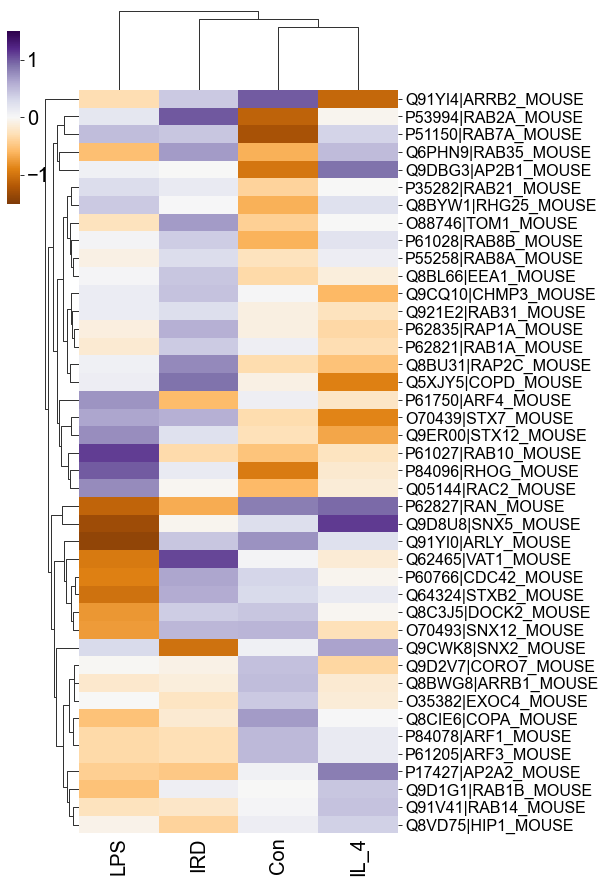

In [102]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group5], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [20]:
#  >>> group6: Cytoskeleton / Adhesion / Motility-related proteins 

pro_function_group6  = [
                        # ------------------------------------------------------
                        # 1) Actin Isoforms
                        # ------------------------------------------------------
                        'P60710|ACTB_MOUSE',   # Beta-actin
                        'P63260|ACTG_MOUSE',   # Gamma-actin
                        # (If present in your list: 'P68033 | ACTC_MOUSE', 'P68134 | ACTS_MOUSE')
                    
                        # ------------------------------------------------------
                        # 2) Actin-Binding & Regulatory Proteins
                        # ------------------------------------------------------
                        'P13020|GELS_MOUSE',   # Gelsolin
                        'P18760|COF1_MOUSE',   # Cofilin-1
                        'P62962|PROF1_MOUSE',  # Profilin-1
                        'P40124|CAP1_MOUSE',   # CAP1 (cyclase-associated protein 1)
                        'P57780|ACTN4_MOUSE',  # Alpha-actinin-4
                        'Q9WUM3|COR1B_MOUSE',  # Coronin-1B
                        'Q9WUM4|COR1C_MOUSE',  # Coronin-1C
                        # 'P89053|COR1A_MOUSE',  # Coronin-1A
                        'Q62418|DBNL_MOUSE',   # Drebrin-like protein (actin remodeling)
                        'Q91YR1|TWF1_MOUSE',   # Twinfilin-1
                        'Q9CVB6|ARPC2_MOUSE',  # Arp2/3 complex subunit 2
                        'Q9JM76|ARPC3_MOUSE',  # Arp2/3 complex subunit 3
                        'P61161|ARP2_MOUSE',   # Actin-related protein 2 (Arp2/3)
                        'O88342|WDR1_MOUSE',   # WD repeat-containing protein 1 (cofactor for ADF)
                        'Q6IRU2|TPM4_MOUSE',   # Tropomyosin alpha-4 chain
                        'P70460|VASP_MOUSE',   # Vasodilator-stimulated phosphoprotein (actin polymerization regulator)
                    
                        # ------------------------------------------------------
                        # 3) Myosins (Motor Proteins)
                        # ------------------------------------------------------
                        'E9Q634|MYO1E_MOUSE',  # Myosin-Ie
                        'Q5SUA5|MYO1G_MOUSE',  # Myosin-Ig
                        'Q9WTI7|MYO1C_MOUSE',  # Myosin-Ic
                        'Q8VDD5|MYH9_MOUSE',   # Myosin-9 (heavy chain)
                    
                        # ------------------------------------------------------
                        # 4) Microtubule Components
                        # ------------------------------------------------------
                        'P68372|TBB4B_MOUSE',  # Tubulin beta-4B chain
                        'P68373|TBA1C_MOUSE',  # Tubulin alpha-1C chain
                        'Q7TMM9|TBB2A_MOUSE',  # Tubulin beta-2A chain
                        'Q9CWF2|TBB2B_MOUSE',  # Tubulin beta-2B chain
                        'P99024|TBB5_MOUSE',   # Tubulin beta-5 chain
                    
                        # ------------------------------------------------------
                        # 5) Intermediate Filaments
                        # ------------------------------------------------------
                        'P20152|VIME_MOUSE',   # Vimentin
                        'P14733|LMNB1_MOUSE',  # Lamin-B1
                        'P48678|LMNA_MOUSE',   # Lamin-A/C
                    
                        # ------------------------------------------------------
                        # 6) ERM Family (Plasma Membrane–Cytoskeleton Linkers)
                        # ------------------------------------------------------
                        'P26040|EZRI_MOUSE',   # Ezrin
                        'P26041|MOES_MOUSE',   # Moesin
                    
                        # ------------------------------------------------------
                        # 7) Cell Adhesion (Integrins, Talin)
                        # ------------------------------------------------------
                        'P11688|ITA5_MOUSE',   # Integrin alpha-5
                        'P09055|ITB1_MOUSE',   # Integrin beta-1
                        'P11835|ITB2_MOUSE',   # Integrin beta-2
                        'P26039|TLN1_MOUSE'    # Talin-1 (couples integrins to actin cytoskeleton)
                    ]


In [653]:
dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('H4')].index

Index(['P62806|H4_MOUSE', 'Q9DCH4|EIF3F_MOUSE', 'Q8BH40|Q8BH40_MOUSE',
       'Q68FH4|GALK2_MOUSE', 'E0CYH4|E0CYH4_MOUSE', 'F7AEH4|F7AEH4_MOUSE'],
      dtype='object')

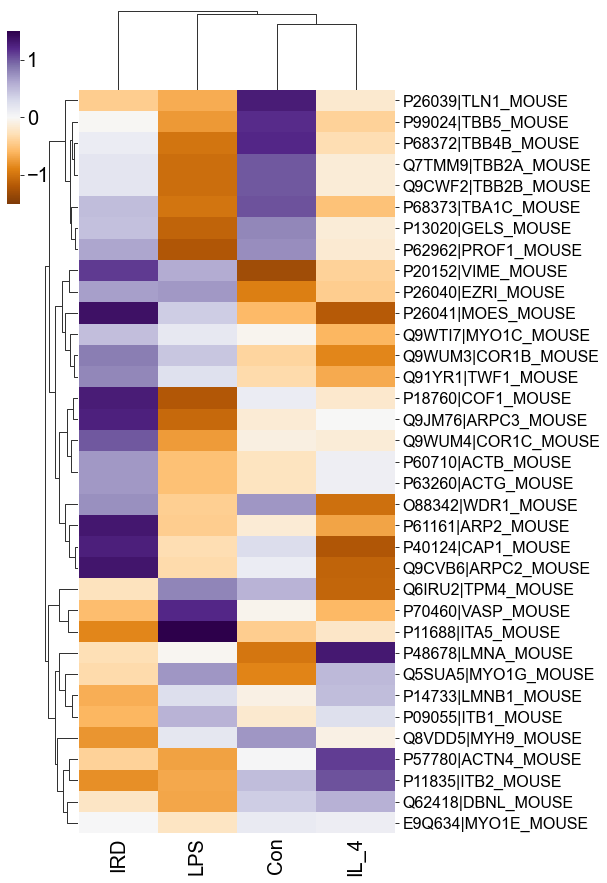

In [107]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group6], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [318]:
#  >>> group7: Immune-related receptors / Signaling molecules-related proteins 

pro_function_group7 = [
                        # ----------------------------------------------------------------
                        # 1) MHC Class I Components & CD Markers
                        # ----------------------------------------------------------------
                        'P01887|B2MG_MOUSE',    # Beta-2 microglobulin (component of MHC class I)
                        'P01899|HA11_MOUSE',    # MHC class I heavy chain (H-2K/H-2D)
                        'P06800|PTPRC_MOUSE',   # CD45 (protein tyrosine phosphatase, receptor type C)
                        'P10810|CD14_MOUSE',    # CD14 (LPS co-receptor)
                        'Q08857|CD36_MOUSE',    # CD36 (scavenger receptor; also lipid uptake)
                        'P18181|CD48_MOUSE',    # CD48 (SLAM family receptor)
                        'P31996|CD68_MOUSE',    # CD68 (macrophage marker)
                        'Q61490|CD166_MOUSE',   # CD166 (ALCAM)
                    
                        # Integrin alpha-M (CD11b), often called ITAM_MOUSE in the dataset
                        'P05555|ITAM_MOUSE',    # CD11b (integrin alpha M)
    
                        # 14-3-3 clusters
                        'O70456|1433S_MOUSE', 
                        'P61982|1433G_MOUSE', 
                        'P62259|1433E_MOUSE',
                        'P63101|1433Z_MOUSE', 
                        'P68254|1433T_MOUSE', 
                        'P68510|1433F_MOUSE',
                        'Q9CQV8|1433B_MOUSE',
                    
                        # ----------------------------------------------------------------
                        # 2) Fc Receptors
                        # ----------------------------------------------------------------
                        'P08101|FCGR2_MOUSE',   # Fc gamma receptor II (CD32)
                        'P08508|FCGR3_MOUSE',   # Fc gamma receptor III (CD16)
                        'P20491|FCERG_MOUSE',   # Fc receptor, gamma subunit (common γ chain)
                    
                        # ----------------------------------------------------------------
                        # 3) Other Immune Regulators & Signaling
                        # ----------------------------------------------------------------
                        'P97797|SHPS1_MOUSE',   # SIRP alpha (CD172a), "signal-regulatory protein alpha"
                        'P29351|PTN6_MOUSE',    # SHP-1 phosphatase (hematopoietic cell phosphatase)
                        'P29452|CASP1_MOUSE',   # Caspase-1 (IL-1β–converting enzyme)
                        'Q02105|C1QC_MOUSE',    # Complement C1q subcomponent subunit C
                    
                        # ----------------------------------------------------------------
                        # 4) Innate Immune / Interferon-Stimulated
                        # ----------------------------------------------------------------
                        'Q6Q899|DDX58_MOUSE',   # RIG-I (innate sensor of viral RNA)
                        'Q64339|ISG15_MOUSE',   # ISG15 (interferon-stimulated ubiquitin-like modifier)
                        'Q8VI93|OAS3_MOUSE',    # 2'-5'-oligoadenylate synthetase 3 (antiviral pathway)
                        'Q9CQW9|IFM3_MOUSE',    # IFITM3 (interferon-induced transmembrane protein 3)
                    
                        # ----------------------------------------------------------------
                        # 5) Immunoproteasome Subunits
                        # ----------------------------------------------------------------
                        'P28063|PSB8_MOUSE',    # Proteasome subunit beta-8 (LMP7, immunoproteasome)
                        # 'Q9QZ23|PSME2_MOUSE'    # Proteasome activator complex subunit 2 (PA28β)
                    ]



In [320]:
[item.split("|")[-1].split("_")[0] for item in pro_function_group7]

['B2MG',
 'HA11',
 'PTPRC',
 'CD14',
 'CD36',
 'CD48',
 'CD68',
 'CD166',
 'ITAM',
 '1433S',
 '1433G',
 '1433E',
 '1433Z',
 '1433T',
 '1433F',
 '1433B',
 'FCGR2',
 'FCGR3',
 'FCERG',
 'SHPS1',
 'PTN6',
 'CASP1',
 'C1QC',
 'DDX58',
 'ISG15',
 'OAS3',
 'IFM3',
 'PSB8']

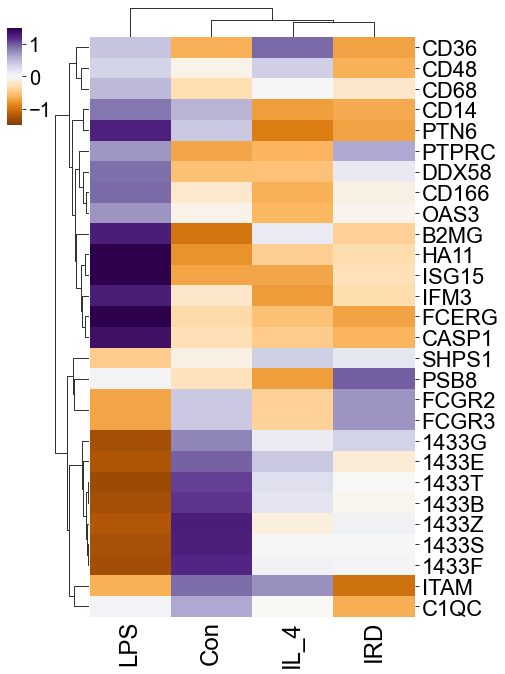

In [349]:
plot_clustered_heatmap_ytick(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group7], 
                           low = -1.5 ,high = 1.5,figure_size = (7,9),savename = "Immune receptors_heatmap")

In [11]:
#  >>> group8: Ubiquitin-proteasome / Protein hydrolysis / Autophagy-lysosomal degradation system related proteins 

pro_function_group8 = [
                        # ----------------------------------------------------------------
                        # A) UBIQUITIN-PROTEASOME SYSTEM
                        #    1) 20S Core Proteasome (Alpha & Beta Subunits)
                        # ----------------------------------------------------------------
                        'Q9R1P4|PSA1_MOUSE',    # Proteasome subunit alpha type-1
                        'P49722|PSA2_MOUSE',    # Proteasome subunit alpha type-2
                        'Q9QUM9|PSA6_MOUSE',    # Proteasome subunit alpha type-6
                        # (If present: Q9Z2U0 | PSA7_MOUSE, Q9Z2U1 | PSA5_MOUSE, etc.)
                        
                        'Q9R1P3|PSB2_MOUSE',    # Proteasome subunit beta type-2
                        'P99026|PSB4_MOUSE',    # Proteasome subunit beta type-4
                        'Q60692|PSB6_MOUSE',    # Proteasome subunit beta type-6
                        'P28063|PSB8_MOUSE',    # Proteasome subunit beta type-8 (immunoproteasome)
                        
                        # ----------------------------------------------------------------
                        #    2) 19S/PA28 Regulatory Particles & Related
                        # ----------------------------------------------------------------
                        'Q3TXS7|PSMD1_MOUSE',   # 26S proteasome regulatory subunit 1 (non-ATPase)
                        'Q8VDM4|PSMD2_MOUSE',   # 26S proteasome regulatory subunit 2 (non-ATPase)
                        'P14685|PSMD3_MOUSE',   # 26S proteasome regulatory subunit 3 (non-ATPase)
                        # 'Q9QZ23|PSME2_MOUSE',   # Proteasome activator complex subunit 2 (PA28β)
                        
                        # ----------------------------------------------------------------
                        #    3) Deubiquitinating Enzymes
                        # ----------------------------------------------------------------
                        'P56399|UBP5_MOUSE',    # Ubiquitin-specific protease 5
                        'Q9JMA1|UBP14_MOUSE',   # Ubiquitin-specific protease 14 (USP14)
                        'Q02053|UBA1_MOUSE',
                        'P61079|UB2D3_MOUSE',  
                        'P62838|UB2D2_MOUSE',
                        # ----------------------------------------------------------------
                        # B) LYSOSOMAL HYDROLASES (Proteases & Glycosidases)
                        # ----------------------------------------------------------------
                        'P10605|CATB_MOUSE',    # Cathepsin B
                        'P18242|CATD_MOUSE',    # Cathepsin D
                        'P97821|CATC_MOUSE',    # Cathepsin C
                        'O70370|CATS_MOUSE',    # Cathepsin S
                        'Q9WUU7|CATZ_MOUSE',    # Cathepsin Z
                        
                        'P20060|HEXB_MOUSE',    # Beta-hexosaminidase (Hex B)
                        'P29416|HEXA_MOUSE',    # Alpha subunit of Hex A
                        'P50429|ARSB_MOUSE',    # Arylsulfatase B
                        'Q9QWR8|NAGAB_MOUSE',   # Alpha-N-acetylgalactosaminidase
                        'Q8BFR4|GNS_MOUSE',     # N-acetylglucosamine-6-sulfatase (also lysosomal)
                        
                        # ----------------------------------------------------------------
                        # C) LYSOSOMAL MEMBRANE PROTEINS
                        # ----------------------------------------------------------------
                        'P11438|LAMP1_MOUSE',   # Lysosome-associated membrane protein 1
                        'P17047|LAMP2_MOUSE',   # Lysosome-associated membrane protein 2
                        'P08905|LYZ2_MOUSE', 
                        'P17897|LYZ1_MOUSE',  
                        # ----------------------------------------------------------------
                        # D) AUTOPHAGY-RELATED
                        # ----------------------------------------------------------------
                        'Q64337|SQSTM_MOUSE',   # p62 (Sequestosome-1), ubiquitin-binding autophagy adaptor
                        'Q8C052|MAP1S_MOUSE'    # Microtubule-associated protein 1S (involved in autophagy)
                    ]




In [12]:
ucla_df.loc[pro_function_group8]

Con       LPS      IL_4       IRD
Q9R1P4|PSA1_MOUSE   0.853839 -0.793795 -0.001962 -0.058083
P49722|PSA2_MOUSE   0.794936 -0.398914  0.069269 -0.465290
Q9QUM9|PSA6_MOUSE   0.555315  0.131486 -0.417475 -0.269326
Q9R1P3|PSB2_MOUSE  -0.620523  0.775218 -0.160651  0.005956
P99026|PSB4_MOUSE   0.280865 -1.176933  0.068645  0.827423
Q60692|PSB6_MOUSE   0.154383 -0.762308  0.958005 -0.350081
P28063|PSB8_MOUSE  -0.275943  0.040212 -0.744230  0.979961
Q3TXS7|PSMD1_MOUSE  0.581792 -0.999259  0.214387  0.203080
Q8VDM4|PSMD2_MOUSE -0.164866  0.007878  0.120368  0.036619
P14685|PSMD3_MOUSE  0.033641 -0.366073 -0.008694  0.341127
P56399|UBP5_MOUSE   0.839494 -1.271179  0.050216  0.381470
Q9JMA1|UBP14_MOUSE  0.017436  0.396158  0.115547 -0.529141
Q02053|UBA1_MOUSE   0.769275 -1.179907 -0.204617  0.615249
P61079|UB2D3_MOUSE  1.110399 -1.054680  0.205702 -0.261421
P62838|UB2D2_MOUSE  1.110399 -1.054680  0.205702 -0.261421
P10605|CATB_MOUSE  -0.776760 -0.131891  0.543091  0.365560
P18242|CATD_MOUSE  -0.404101 -0.656828 -0.563984  1.624912
P97821|CATC_MOUSE  -0.791532  0.101034 -0.831397  1.521895
O70370|CATS_MOUSE  -1.060736 -0.207541 -0.187305  1.455582
Q9WUU7|CATZ_MOUSE  -0.722236  0.105180  0.846717 -0.229661
P20060|HEXB_MOUSE  -0.915906 -0.497527 -0.212774  1.626207
P29416|HEXA_MOUSE  -0.715199 -0.496687 -0.349215  1.561101
P50429|ARSB_MOUSE  -0.522356 -0.308812 -0.632362  1.463530
Q9QWR8|NAGAB_MOUSE -0.932429 -0.350797 -0.337150  1.620376
Q8BFR4|GNS_MOUSE   -0.923042  0.096068 -0.707708  1.534682
P11438|LAMP1_MOUSE -1.177948  0.313756 -0.114305  0.978496
P17047|LAMP2_MOUSE -0.774419  0.770302 -0.272993  0.277111
P08905|LYZ2_MOUSE   0.035444 -1.008364  0.560250  0.412670
P17897|LYZ1_MOUSE   0.538067 -0.634688  0.183748 -0.087126
Q64337|SQSTM_MOUSE -0.507989  1.567180 -0.785774 -0.273417
Q8C052|MAP1S_MOUSE  0.369891 -0.862987 -0.388280  0.881376

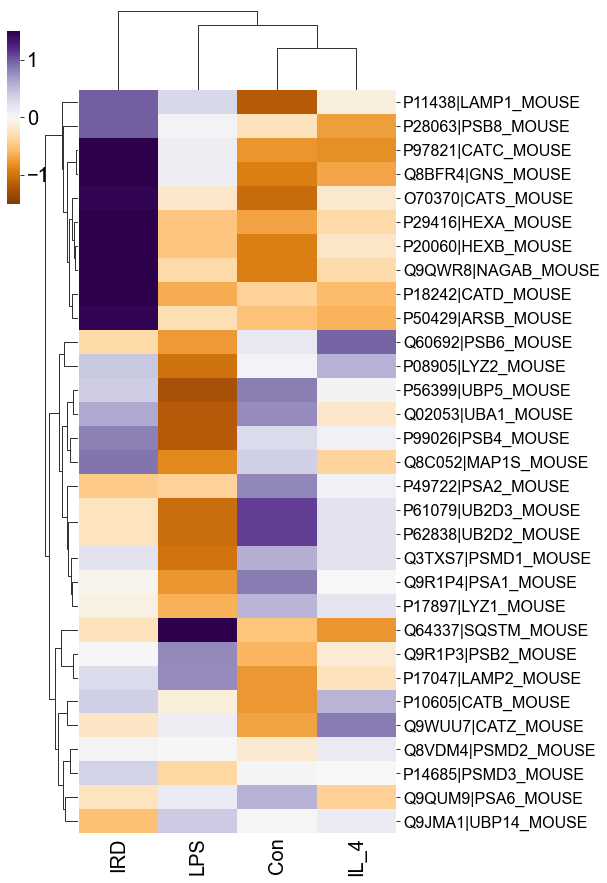

In [616]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group8], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

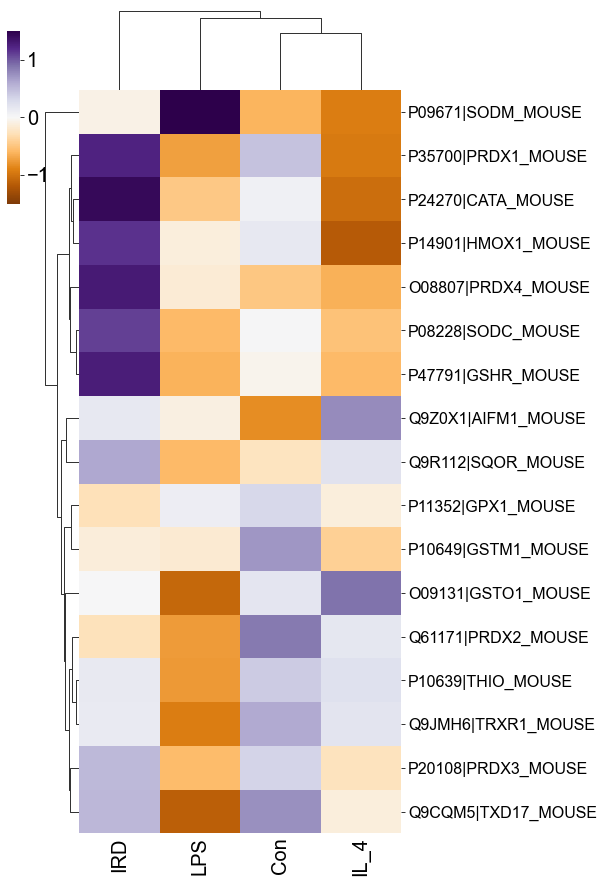

In [117]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group9], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [266]:
#  >>> group10: Ribosomal related proteins 

pro_function_group10 = [
                        # ----------------------------------------------------------------
                        # 60S RIBOSOMAL SUBUNIT (L-SUBUNIT)
                        # ----------------------------------------------------------------
                        'P14869|RLA0_MOUSE',   # 60S acidic ribosomal protein P0
                        'P47955|RLA1_MOUSE',   # 60S acidic ribosomal protein P1
                        'P99027|RLA2_MOUSE',   # 60S acidic ribosomal protein P2
                    
                        'Q6ZWV3|RL10_MOUSE',   # 60S ribosomal protein L10
                        'Q9CXW4|RL11_MOUSE',   # 60S ribosomal protein L11
                        'P35979|RL12_MOUSE',   # 60S ribosomal protein L12
                        'P47963|RL13_MOUSE',   # 60S ribosomal protein L13
                        'Q9CR57|RL14_MOUSE',   # 60S ribosomal protein L14
                        'Q9CZM2|RL15_MOUSE',   # 60S ribosomal protein L15
                        'P51410|RL9_MOUSE',    # 60S ribosomal protein L9
                        'P14148|RL7_MOUSE',    # 60S ribosomal protein L7
                        'P12970|RL7A_MOUSE',   # 60S ribosomal protein L7a
                        # 'P62983|RL40_MOUSE',   # 60S ribosomal protein L40 (ubiquitin-fused)
                        'Q9D8E6|RL4_MOUSE',    # 60S ribosomal protein L4
                        'P47962|RL5_MOUSE',    # 60S ribosomal protein L5
                        'P47911|RL6_MOUSE',    # 60S ribosomal protein L6
                        'Q9D1R9|RL34_MOUSE',   # 60S ribosomal protein L34
                        'P14115|RL27A_MOUSE',  # 60S ribosomal protein L27a
                        'P41105|RL28_MOUSE',   # 60S ribosomal protein L28
                        'Q6ZWV7|RL35_MOUSE',   # 60S ribosomal protein L35
                        'O55142|RL35A_MOUSE',  # 60S ribosomal protein L35a
                        'P27659|RL3_MOUSE',    # 60S ribosomal protein L3
                        'P47915|RL29_MOUSE',   # 60S ribosomal protein L29
                        'P62889|RL30_MOUSE',   # 60S ribosomal protein L30
                        'P62911|RL32_MOUSE',   # 60S ribosomal protein L32
                        'P62918|RL8_MOUSE',    # 60S ribosomal protein L8
                        'P67984|RL22_MOUSE',   # 60S ribosomal protein L22
                        'P62751|RL23A_MOUSE',  # 60S ribosomal protein L23a
                        'P62830|RL23_MOUSE',   # 60S ribosomal protein L23
                        'P62900|RL31_MOUSE',   # 60S ribosomal protein L31
                    
                        # ----------------------------------------------------------------
                        # 40S RIBOSOMAL SUBUNIT (S-SUBUNIT)
                        # ----------------------------------------------------------------
                        'P25444|RS2_MOUSE',    # 40S ribosomal protein S2
                        'P62908|RS3_MOUSE',    # 40S ribosomal protein S3
                        'P97351|RS3A_MOUSE',   # 40S ribosomal protein S3a
                        'P62702|RS4X_MOUSE',   # 40S ribosomal protein S4, X isoform
                        'P97461|RS5_MOUSE',    # 40S ribosomal protein S5
                        'P62754|RS6_MOUSE',    # 40S ribosomal protein S6
                        'P62082|RS7_MOUSE',    # 40S ribosomal protein S7
                        'P62242|RS8_MOUSE',    # 40S ribosomal protein S8
                        'Q6ZWN5|RS9_MOUSE',    # 40S ribosomal protein S9
                    
                        # Sometimes labeled "PRS10_MOUSE" but it’s RPS10:
                        'P62334|PRS10_MOUSE',  # 40S ribosomal protein S10
                        'P63325|RS10_MOUSE',   # 40S ribosomal protein S10 (alternative entry)
                    
                        'Q9CZX8|RS19_MOUSE',   # 40S ribosomal protein S19
                        'P62264|RS14_MOUSE',   # 40S ribosomal protein S14
                        'P63276|RS17_MOUSE',   # 40S ribosomal protein S17
                        'P62270|RS18_MOUSE',   # 40S ribosomal protein S18
                        'Q9CQR2|RS21_MOUSE',   # 40S ribosomal protein S21
                        'P60867|RS20_MOUSE',   # 40S ribosomal protein S20
                        'P62849|RS24_MOUSE',   # 40S ribosomal protein S24
                        'P62852|RS25_MOUSE',   # 40S ribosomal protein S25
                        'P62855|RS26_MOUSE',   # 40S ribosomal protein S26
                        'Q6ZWU9|RS27_MOUSE',   # 40S ribosomal protein S27
                        'P62245|RS15A_MOUSE',  # 40S ribosomal protein S15a
                        'P62301|RS13_MOUSE',   # 40S ribosomal protein S13
                        'P62281|RS11_MOUSE',   # 40S ribosomal protein S11
                        'P62274|RS29_MOUSE',   # 40S ribosomal protein S29
                        'P62862|RS30_MOUSE'    # 40S ribosomal protein S30 (FAU)
                        ] 

In [265]:
dfmulti_stdbyrow_mean

Con       LPS  \
B2RXS4|PLXB2_MOUSE                                  0.440711  0.164964   
E9Q634|MYO1E_MOUSE                                  0.139421 -0.241777   
O08529|CAN2_MOUSE                                   1.162271 -1.080416   
O08553|DPYL2_MOUSE                                  0.454639 -0.560333   
O08749|DLDH_MOUSE                                  -1.074608  0.399216   
...                                                      ...       ...   
PC(17:0/18:1)                                      -0.146825  0.918745   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.007180  0.425555   
PC(P-18:0/22:6)                                    -0.339693 -0.325463   
PC(18:0/22:5)                                      -0.485571 -0.384653   
PC(20:0/20:4)                                      -0.766994 -0.234376   

                                                        IL_4       IRD  
B2RXS4|PLXB2_MOUSE                                 -0.848645  0.242970  
E9Q634|MYO1E_MOUSE                                  0.098562  0.003794  
O08529|CAN2_MOUSE                                  -0.455185  0.373331  
O08553|DPYL2_MOUSE                                 -0.450028  0.555721  
O08749|DLDH_MOUSE                                  -0.265823  0.941215  
...                                                      ...       ...  
PC(17:0/18:1)                                       0.533587 -1.305507  
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.999973 -1.432707  
PC(P-18:0/22:6)                                    -0.622474  1.287630  
PC(18:0/22:5)                                      -0.414559  1.284783  
PC(20:0/20:4)                                      -0.546208  1.547577  

[1706 rows x 4 columns]

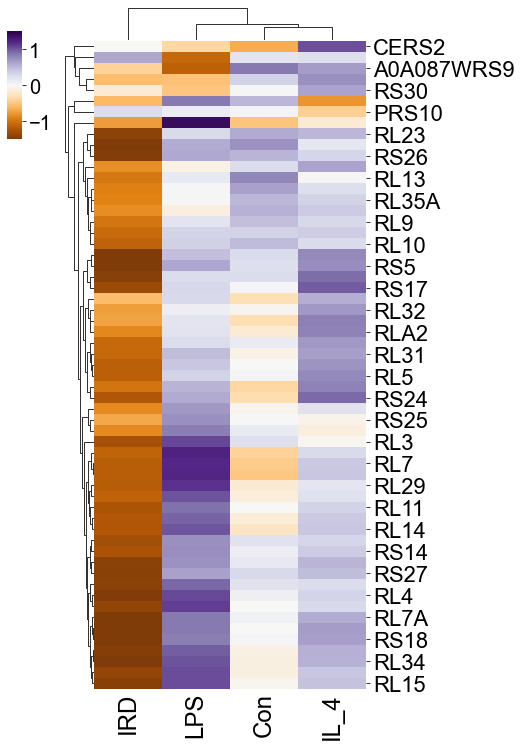

In [334]:
plot_clustered_heatmap_ytick(dfheatmap = get_selected_proteins(listgroup = pro_function_group10, raw_df = dfmulti_stdbyrow_mean), 
                           low = -1.5 ,high = 1.5,figure_size = (7,10),set_row_cluster = True, set_col_cluster = True)

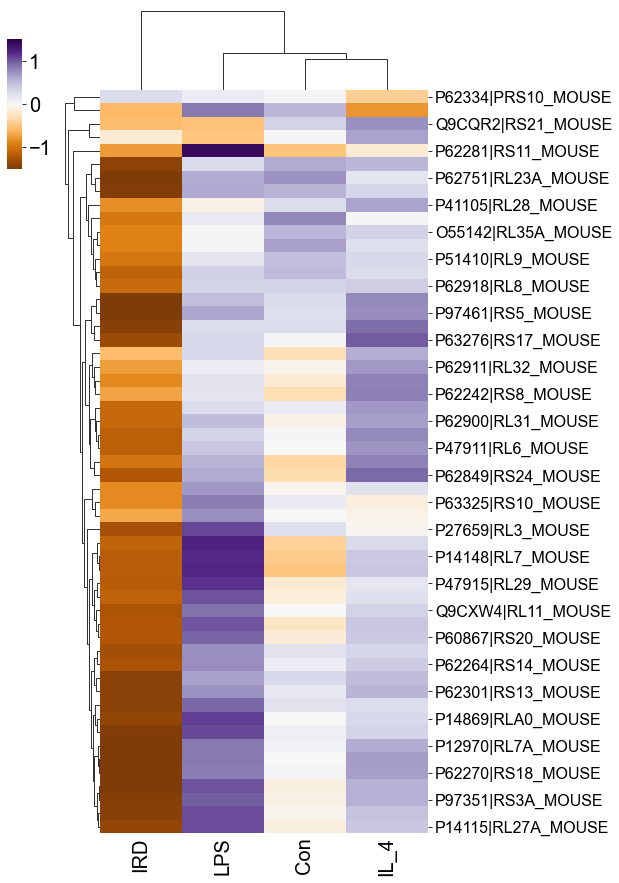

In [335]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group10], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [101]:
#  >>> group11: protein folding / Modification / Secretion pathway related proteins 

pro_function_group11  = [
                        # ------------------------------------------------------
                        # 1) Actin Isoforms
                        # ------------------------------------------------------
                        'P60710|ACTB_MOUSE',   # Beta-actin
                        'P63260|ACTG_MOUSE',   # Gamma-actin
                        # (If present in your list: 'P68033 | ACTC_MOUSE', 'P68134 | ACTS_MOUSE')                   
                        # ------------------------------------------------------
                        # 2) Actin-Binding & Regulatory Proteins
                        # ------------------------------------------------------
                        'P13020|GELS_MOUSE',   # Gelsolin
                        'P18760|COF1_MOUSE',   # Cofilin-1
                        'P62962|PROF1_MOUSE',  # Profilin-1
                        'P40124|CAP1_MOUSE',   # CAP1 (cyclase-associated protein 1)
                        'P57780|ACTN4_MOUSE',  # Alpha-actinin-4
                        'Q9WUM3|COR1B_MOUSE',  # Coronin-1B
                        'Q9WUM4|COR1C_MOUSE',  # Coronin-1C
                        # 'P89053|COR1A_MOUSE',  # Coronin-1A
                        'Q62418|DBNL_MOUSE',   # Drebrin-like protein (actin remodeling)
                        'Q91YR1|TWF1_MOUSE',   # Twinfilin-1
                        'Q9CVB6|ARPC2_MOUSE',  # Arp2/3 complex subunit 2
                        'Q9JM76|ARPC3_MOUSE',  # Arp2/3 complex subunit 3
                        'P61161|ARP2_MOUSE',   # Actin-related protein 2 (Arp2/3)
                        'O88342|WDR1_MOUSE',   # WD repeat-containing protein 1 (cofactor for ADF)
                        'Q6IRU2|TPM4_MOUSE',   # Tropomyosin alpha-4 chain
                        'P70460|VASP_MOUSE',   # Vasodilator-stimulated phosphoprotein (actin polymerization regulator)                  
                        # ------------------------------------------------------
                        # 3) Myosins (Motor Proteins)
                        # ------------------------------------------------------
                        'E9Q634|MYO1E_MOUSE',  # Myosin-Ie
                        'Q5SUA5|MYO1G_MOUSE',  # Myosin-Ig
                        'Q9WTI7|MYO1C_MOUSE',  # Myosin-Ic
                        'Q8VDD5|MYH9_MOUSE',   # Myosin-9 (heavy chain)                   
                        # ------------------------------------------------------
                        # 4) Microtubule Components
                        # ------------------------------------------------------
                        'P68372|TBB4B_MOUSE',  # Tubulin beta-4B chain
                        'P68373|TBA1C_MOUSE',  # Tubulin alpha-1C chain
                        'Q7TMM9|TBB2A_MOUSE',  # Tubulin beta-2A chain
                        'Q9CWF2|TBB2B_MOUSE',  # Tubulin beta-2B chain
                        'P99024|TBB5_MOUSE',   # Tubulin beta-5 chain
                        # ------------------------------------------------------
                        # 5) Intermediate Filaments
                        # ------------------------------------------------------
                        'P20152|VIME_MOUSE',   # Vimentin
                        'P14733|LMNB1_MOUSE',  # Lamin-B1
                        'P48678|LMNA_MOUSE',   # Lamin-A/C
                    
                        # ------------------------------------------------------
                        # 6) ERM Family (Plasma Membrane–Cytoskeleton Linkers)
                        # ------------------------------------------------------
                        'P26040|EZRI_MOUSE',   # Ezrin
                        'P26041|MOES_MOUSE',   # Moesin
                    
                        # ------------------------------------------------------
                        # 7) Cell Adhesion (Integrins, Talin)
                        # ------------------------------------------------------
                        'P11688|ITA5_MOUSE',   # Integrin alpha-5
                        'P09055|ITB1_MOUSE',   # Integrin beta-1
                        'P11835|ITB2_MOUSE',   # Integrin beta-2
                        'P26039|TLN1_MOUSE'    # Talin-1 (couples integrins to actin cytoskeleton)
                    ]

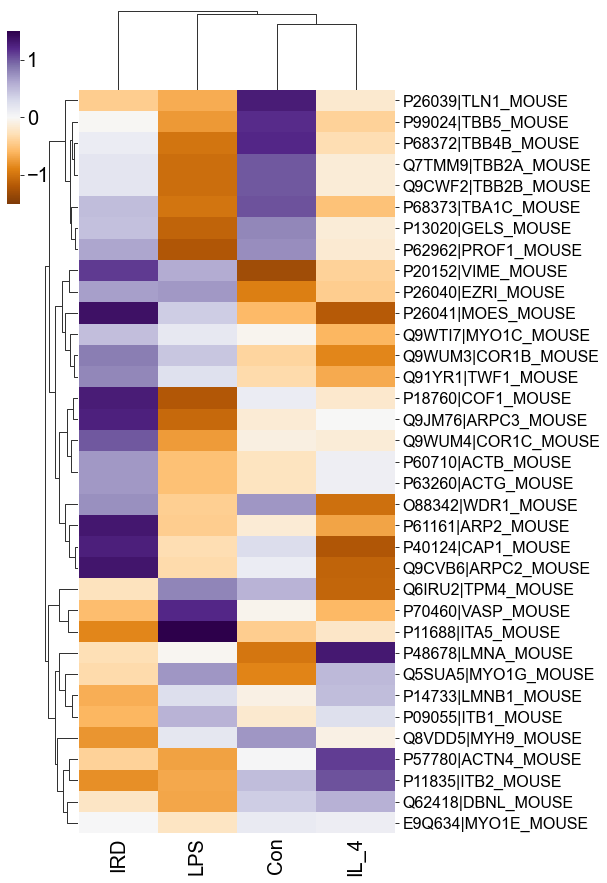

In [125]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean.loc[pro_function_group11], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [69]:
anno_df_forr = result.copy()
anno_df_forr['omic_type'] = ['proteome'] * 545 + ['metabolome']*72
anno_df_forr = anno_df_forr.sort_values(by='kmeans')

mapping_logic = {0: "cluster1", 1: "cluster2", 2: "cluster3", 3: "cluster4"}

# Replace the integers in the 'kmeans' column with the corresponding string labels
anno_df_forr['kmeans'] = anno_df_forr['kmeans'].map(mapping_logic)

anno_df_forr.rename(columns={'kmeans': 'clusters'}, inplace=True)
anno_df_forr

Con       LPS  \
3/sp|Q69ZN7|MYOF_MOUSE/tr|A0A286YDF5|A0A286YDF5... -0.110957 -0.039917   
5/sp|Q8BZN6|DOC10_MOUSE/tr|A0A087WQ86|A0A087WQ8...  0.480023 -0.770433   
1/sp|P54071|IDHP_MOUSE                              0.584392 -0.247512   
1/sp|Q9QYB1|CLIC4_MOUSE                             0.225556 -0.017558   
Tyr-Phe                                             1.264769 -0.341132   
...                                                      ...       ...   
1/sp|Q9WUM4|COR1C_MOUSE                            -0.103317 -0.755482   
1/sp|Q9WUM5|SUCA_MOUSE                             -0.941123 -0.146589   
1/sp|Q9WV54|ASAH1_MOUSE                            -0.870923 -0.045852   
1/sp|Q9D1Q6|ERP44_MOUSE                            -1.155319  0.546712   
PC(20:0/20:4)                                      -0.766994 -0.234376   

                                                        IL_4       IRD  \
3/sp|Q69ZN7|MYOF_MOUSE/tr|A0A286YDF5|A0A286YDF5...  1.176620 -1.025747   
5/sp|Q8BZN6|DOC10_MOUSE/tr|A0A087WQ86|A0A087WQ8...  0.686114 -0.395704   
1/sp|P54071|IDHP_MOUSE                              0.616241 -0.953120   
1/sp|Q9QYB1|CLIC4_MOUSE                             1.081507 -1.289505   
Tyr-Phe                                             0.167045 -1.090682   
...                                                      ...       ...   
1/sp|Q9WUM4|COR1C_MOUSE                            -0.141862  1.000662   
1/sp|Q9WUM5|SUCA_MOUSE                             -0.176463  1.264175   
1/sp|Q9WV54|ASAH1_MOUSE                            -0.440817  1.357592   
1/sp|Q9D1Q6|ERP44_MOUSE                             0.310418  0.298188   
PC(20:0/20:4)                                      -0.546208  1.547577   

                                                    clusters   omic_type  
3/sp|Q69ZN7|MYOF_MOUSE/tr|A0A286YDF5|A0A286YDF5...  cluster1    proteome  
5/sp|Q8BZN6|DOC10_MOUSE/tr|A0A087WQ86|A0A087WQ8...  cluster1    proteome  
1/sp|P54071|IDHP_MOUSE                              cluster1    proteome  
1/sp|Q9QYB1|CLIC4_MOUSE                             cluster1    proteome  
Tyr-Phe                                             cluster1  metabolome  
...                                                      ...         ...  
1/sp|Q9WUM4|COR1C_MOUSE                             cluster4    proteome  
1/sp|Q9WUM5|SUCA_MOUSE                              cluster4    proteome  
1/sp|Q9WV54|ASAH1_MOUSE                             cluster4    proteome  
1/sp|Q9D1Q6|ERP44_MOUSE                             cluster4    proteome  
PC(20:0/20:4)                                       cluster4  metabolome  

[617 rows x 6 columns]

In [ ]:
df_lfq

In [22]:
def plot_clustered_heatmapj(dfheatmap = df_lfq, 
                           low = -1 ,high = 1,figure_size = (10,8),set_row_cluster = True, set_col_cluster = True ):

    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "PuOr"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap,cbar=True, vmin=low, vmax=high,
                        figsize = figure_size,  # Set the figure size here
                        row_cluster=set_row_cluster,  # Enable row clustering
                        col_cluster=set_col_cluster,  # Enable column clustering
                        dendrogram_ratio=(.1, .1),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 1}, # Make dendrogram lines invisible
                        cbar_pos=(-0.09, 0.8, 0.03, 0.15))
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize = 20) 
    
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), rotation=360, fontsize=16) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)  # Customize x-tick labels
    # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()

In [13]:
# ADDITIONAL PROTEINS RELATED TO SENESCENCE


senescence = ['P14733|LMNB1_MOUSE',
              'P23780|BGAL_MOUSE',
              'P30681|HMGB2_MOUSE',
              'P63158|HMGB1_MOUSE',
              'P48678|LMNA_MOUSE',
              'Q99KQ4|NAMPT_MOUSE',
              'Q64337|SQSTM_MOUSE',
              'P14901|HMOX1_MOUSE']





ucla_df.loc[senescence]

Con       LPS      IL_4       IRD
P14733|LMNB1_MOUSE -0.089624  0.250277  0.485385 -0.646038
P23780|BGAL_MOUSE  -0.678011 -0.463322 -0.504192  1.645525
P30681|HMGB2_MOUSE  0.862899 -0.597549  0.410848 -0.676198
P63158|HMGB1_MOUSE  1.285362 -1.090155 -0.211715  0.016508
P48678|LMNA_MOUSE  -0.977225 -0.028705  1.310400 -0.304470
Q99KQ4|NAMPT_MOUSE -0.479505  0.665693 -0.131584 -0.054603
Q64337|SQSTM_MOUSE -0.507989  1.567180 -0.785774 -0.273417
P14901|HMOX1_MOUSE  0.157452 -0.124494 -1.181982  1.149024

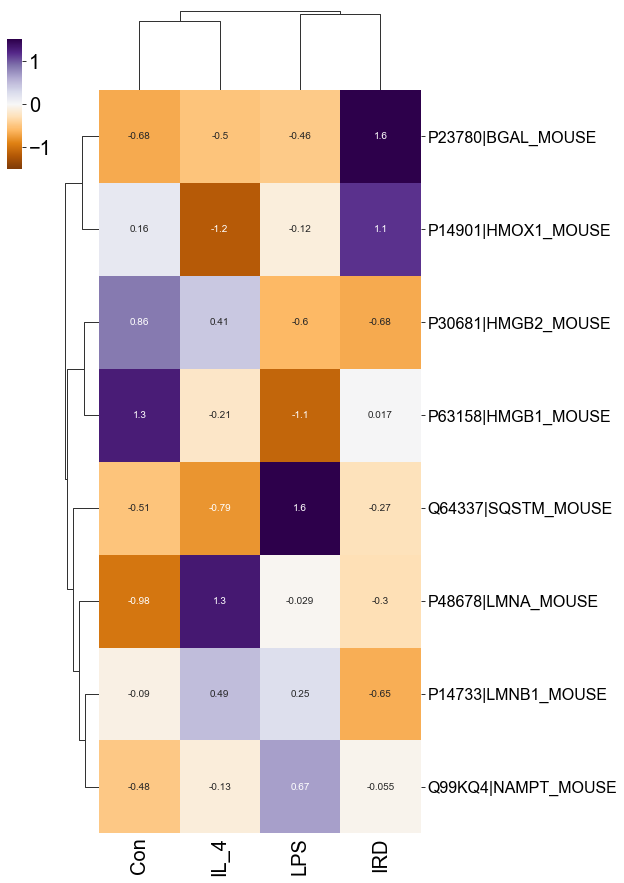

In [23]:
plot_clustered_heatmapj(dfheatmap = ucla_df.loc[senescence], 
                           low = -1.5 ,high = 1.5,figure_size = (7,12))

In [161]:
# anno_df_forr.to_csv(f'{file_save_path}/pheatmap_R_macrophages.csv')

In [70]:

woce = haha_df.copy()


# Create a dictionary mapping pathway names to the corresponding protein lists
pathway_dict = {
    'Glycolysis/gluconeogenesis': pro_function_group1,
    'TCA cycle/oxidative phosphorylation/mitochondrial respiratory chain': pro_function_group2,
    'Lipid/cholesterol/fatty acid metabolism': pro_function_group3,
    'Redox/antioxidant': pro_function_group4,
    'Small G protein/intracellular membrane transport/vesicle transport': pro_function_group5,
    'Cytoskeleton/Adhesion/Motility': pro_function_group6,
    'Immune receptors/Signaling molecules': pro_function_group7,
    'Ubiquitin-proteasome/Protein hydrolysis/Autophagy-lysosomal degradation': pro_function_group8,
    'Ribosomal related proteins': pro_function_group10,
    'Protein folding/Modification/Secretion': pro_function_group11,
}

# Define a function to assign a pathway label to a protein name.
def assign_pathway(protein_name):
    protein_lower = protein_name.lower()
    for pathway, prot_list in pathway_dict.items():
        # Check if any protein in the list is a substring (case-insensitive) of the protein name
        if any(prot.lower() in protein_lower for prot in prot_list):
            return pathway  # Return the first matching pathway
    # If no pathway matches, return 'others'
    return 'others'

# Apply the function to the DataFrame index and create a new column 'pathway'
woce['pathway'] = woce.index.to_series().apply(assign_pathway)

woce

A1        A2        A3        A4        A5  \
B2RXS4|PLXB2_MOUSE  -0.822880 -0.873890 -0.670806 -0.542887 -0.748379   
E9Q634|MYO1E_MOUSE  -0.871106 -0.962441 -0.937897 -0.858373 -0.989953   
O08529|CAN2_MOUSE    0.261779  0.169324  0.273492  0.178511  0.338167   
O08553|DPYL2_MOUSE   1.037415  0.936371  0.962614  0.933773  1.049204   
O08749|DLDH_MOUSE   -0.254792 -0.141971 -0.310627 -0.243267 -0.369222   
...                       ...       ...       ...       ...       ...   
D3Z2T9|D3Z2T9_MOUSE  0.764588  0.733666  0.645717  0.644443  0.764276   
E3W997|E3W997_MOUSE  0.764588  0.733666  0.645717  0.644443  0.764276   
E9PVC7|E9PVC7_MOUSE  0.764588  0.733666  0.645717  0.644443  0.764276   
E9PZX7|E9PZX7_MOUSE  0.764588  0.733666  0.645717  0.644443  0.764276   
E9Q9E4|E9Q9E4_MOUSE  0.764588  0.733666  0.645717  0.644443  0.764276   

                           A6        B1        B2        B3        B4  ...  \
B2RXS4|PLXB2_MOUSE  -0.851547 -0.801583 -0.827870 -0.790689 -0.746372  ...   
E9Q634|MYO1E_MOUSE  -0.977299 -0.982300 -0.822409 -0.857692 -1.041580  ...   
O08529|CAN2_MOUSE    0.245746 -0.032840  0.009486 -0.002325  0.014372  ...   
O08553|DPYL2_MOUSE   0.987733  0.946450  0.855687  0.910354  0.866045  ...   
O08749|DLDH_MOUSE   -0.419146 -0.142676 -0.094446 -0.131789 -0.042683  ...   
...                       ...       ...       ...       ...       ...  ...   
D3Z2T9|D3Z2T9_MOUSE  0.635372  0.909055  0.921848  0.892725  0.901130  ...   
E3W997|E3W997_MOUSE  0.635372  0.909055  0.921848  0.892725  0.901130  ...   
E9PVC7|E9PVC7_MOUSE  0.635372  0.909055  0.921848  0.892725  0.901130  ...   
E9PZX7|E9PZX7_MOUSE  0.635372  0.909055  0.921848  0.892725  0.901130  ...   
E9Q9E4|E9Q9E4_MOUSE  0.635372  0.909055  0.921848  0.892725  0.901130  ...   

                           C4        C5        C6        D1        D2  \
B2RXS4|PLXB2_MOUSE  -0.947154 -0.818817 -1.098492 -0.660528 -0.804867   
E9Q634|MYO1E_MOUSE  -1.009366 -0.900187 -1.057397 -1.031484 -0.937807   
O08529|CAN2_MOUSE    0.121304  0.059028  0.193572  0.113388  0.183499   
O08553|DPYL2_MOUSE   0.972378  0.959039  0.841880  0.847812  0.953970   
O08749|DLDH_MOUSE   -0.283645 -0.186616 -0.208966 -0.050865  0.054585   
...                       ...       ...       ...       ...       ...   
D3Z2T9|D3Z2T9_MOUSE  0.671429  0.573807  0.676984  0.600455  0.597105   
E3W997|E3W997_MOUSE  0.671429  0.573807  0.676984  0.600455  0.597105   
E9PVC7|E9PVC7_MOUSE  0.671429  0.573807  0.676984  0.600455  0.597105   
E9PZX7|E9PZX7_MOUSE  0.671429  0.573807  0.676984  0.600455  0.597105   
E9Q9E4|E9Q9E4_MOUSE  0.671429  0.573807  0.676984  0.600455  0.597105   

                           D3        D4        D5        D6  \
B2RXS4|PLXB2_MOUSE  -0.561072 -0.877808 -0.889746 -0.853838   
E9Q634|MYO1E_MOUSE  -0.896148 -0.945061 -0.946866 -0.906603   
O08529|CAN2_MOUSE    0.218382  0.212425  0.107759  0.152039   
O08553|DPYL2_MOUSE   1.094917  1.077061  0.993882  0.983324   
O08749|DLDH_MOUSE   -0.142583 -0.102815 -0.173362 -0.027716   
...                       ...       ...       ...       ...   
D3Z2T9|D3Z2T9_MOUSE  0.585515  0.671248  0.627537  0.582262   
E3W997|E3W997_MOUSE  0.585515  0.671248  0.627537  0.582262   
E9PVC7|E9PVC7_MOUSE  0.585515  0.671248  0.627537  0.582262   
E9PZX7|E9PZX7_MOUSE  0.585515  0.671248  0.627537  0.582262   
E9Q9E4|E9Q9E4_MOUSE  0.585515  0.671248  0.627537  0.582262   

                                                               pathway  
B2RXS4|PLXB2_MOUSE                                              others  
E9Q634|MYO1E_MOUSE                      Cytoskeleton/Adhesion/Motility  
O08529|CAN2_MOUSE                                               others  
O08553|DPYL2_MOUSE                                              others  
O08749|DLDH_MOUSE    TCA cycle/oxidative phosphorylation/mitochondr...  
...                                                                ...  
D3Z2T9|D3Z2T9_MOUSE                                             othe

In [164]:
# woce.to_csv(f'{file_save_path}/pheatmap_R_macrophages2.csv')

# calculate dysregulation(up/down) for the protein clusters


In [92]:

pathway_dys_count = standardscaler_row(df_multi_weo)
pathway_selected_dys_df = pathway_dys_count.loc[pro_function_group1]


In [93]:
kimi = pathway_dys_count.copy()

In [94]:
kimi.index = [item.split('_')[0] for item in kimi.index]
# kimi.to_csv(f'{file_save_path}/multiome_all_zscored_forR.csv')

In [95]:
# function for oneway_ANOVA analysis 
def pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group1]):
    pval_dys = []
    
    # Counters for up/down/unchanged proteins across all proteins
    lps_up, lps_down, lps_nc = 0, 0, 0
    il4_up, il4_down, il4_nc = 0, 0, 0
    ird_up, ird_down, ird_nc = 0, 0, 0
    
    for i in range(len(df_selected_input)):
        aa = df_selected_input.iloc[i, :6].tolist()   # Control
        bb = df_selected_input.iloc[i, 6:12].tolist()  # LPS
        cc = df_selected_input.iloc[i, 12:18].tolist() # IL-4
        dd = df_selected_input.iloc[i, 18:24].tolist() # Irradiation
        
        # Welch’s t-test (equal_var=False)
        p_value_ttest1 = stats.ttest_ind(aa, bb, equal_var=False)[1]
        p_value_ttest2 = stats.ttest_ind(aa, cc, equal_var=False)[1]
        p_value_ttest3 = stats.ttest_ind(aa, dd, equal_var=False)[1]
        
        # dys_var1 = np.mean(bb) - np.mean(aa)
        # dys_var2 = np.mean(cc) - np.mean(aa)
        # dys_var3 = np.mean(dd) - np.mean(aa)
        
        dys_var1 = np.median(bb) - np.median(aa)
        dys_var2 = np.median(cc) - np.median(aa)
        dys_var3 = np.median(dd) - np.median(aa)
        
        # Append results
        pval_dys.append([
            df_selected_input.index[i],
            p_value_ttest1, p_value_ttest2, p_value_ttest3,
            dys_var1, dys_var2, dys_var3,
        ])
    
        # Classification based on significance threshold
        lps_up   += (p_value_ttest1 < 0.05 and dys_var1 > 0)
        lps_down += (p_value_ttest1 < 0.05 and dys_var1 < 0)
        lps_nc   += (p_value_ttest1 >= 0.05)
    
        il4_up   += (p_value_ttest2 < 0.05 and dys_var2 > 0)
        il4_down += (p_value_ttest2 < 0.05 and dys_var2 < 0)
        il4_nc   += (p_value_ttest2 >= 0.05)
    
        ird_up   += (p_value_ttest3 < 0.05 and dys_var3 > 0)
        ird_down += (p_value_ttest3 < 0.05 and dys_var3 < 0)
        ird_nc   += (p_value_ttest3 >= 0.05)
    
    # Convert list to DataFrame
    fl = pd.DataFrame(pval_dys, columns=[
        'protein', 'p_value_lps', 'p_value_il4', 'p_value_irra',
        'dys_regu_lps', 'dys_regu_il4', 'dys_regu_irra'
    ])
    
    # Summary counts dictionary
    summary_counts = {
        'Condition': ['LPS', 'IL-4', 'Irradiation'],
        'Upregulated': [lps_up, il4_up, ird_up],
        'Downregulated': [lps_down, il4_down, ird_down],
        'No Change': [lps_nc, il4_nc, ird_nc]
    }
    
    # Convert to DataFrame
    df_summary_counts = pd.DataFrame(summary_counts)
            
    return(fl,df_summary_counts)

In [96]:
pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group1])[1]

Condition  Upregulated  Downregulated  No Change
0          LPS            0             10          3
1         IL-4            0             10          3
2  Irradiation            0              9          4

# dysregulation(up/down) for the metabolite clusters

In [97]:
df_meta_pathway_catago = pd.read_csv(f'{file_read_path}\metabolites_pathway.csv',index_col=0)
df_meta_pathway_catago

category1   \
names                                                                                                   
2-Amino-1-phenylethanol                             Amino acid derivative (aromatic-related) / Mis...   
Creatine                                            Amino acid derivative (energy buffer via creat...   
Choline                                             Choline/phosphocholine compound (linked to gly...   
Spermine                                                                         Polyamine metabolism   
Tyrosine                                                  Amino acid metabolism (aromatic amino acid)   
...                                                                                               ...   
PC(17:0/18:1)                                          Phosphatidylcholine (PC) / Glycerophospholipid   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphocholine     Phosphatidylcholine (PC) / Glycerophospholipid   
PC(P-18:0/22:6)                                     Ether-linked PC (plasmalogen) / Glycerophospho...   
PC(18:0/22:5)                                          Phosphatidylcholine (PC) / Glycerophospholipid   
PC(20:0/20:4)                                          Phosphatidylcholine (PC) / Glycerophospholipid   

                                                               category2   \
names                                                                       
2-Amino-1-phenylethanol                             Amino acid derivative   
Creatine                                            Amino acid derivative   
Choline                                                     Miscellaneous   
Spermine                                                        Polyamine   
Tyrosine                                                       Amino acid   
...                                                                   ...   
PC(17:0/18:1)                                         glycerophospholipid   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphocholine    glycerophospholipid   
PC(P-18:0/22:6)                                       glycerophospholipid   
PC(18:0/22:5)                                         glycerophospholipid   
PC(20:0/20:4)                                         glycerophospholipid   

                                                                             pathway  
names                                                                                 
2-Amino-1-phenylethanol                                        Amino acid&derivative  
Creatine                                                       Amino acid&derivative  
Choline                                                                Miscellaneous  
Spermine                                              Polyamine/Nucleotide/Carnitine  
Tyrosine                                                       Amino acid&derivative  
...                                                                              ...  
PC(17:0/18:1)                                       glycerophospholipid/Sphingolipid  
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphocholine  glycerophospholipid/Sphingolipid  
PC(P-18:0/22:6)                                     glycerophospholipid/Sphingolipid  
PC(18:0/22:5)                                       glycerophospholipid/Sphingolipid  
PC(20:0/20:4)                                       glycerophospholipid/Sphingolipid  

[72 rows x 3 columns]

In [98]:
meta_function_group1 = df_meta_pathway_catago[df_meta_pathway_catago['pathway'] == 'glycerophospholipid/Sphingolipid'].index.tolist()
meta_function_group2 = df_meta_pathway_catago[df_meta_pathway_catago['pathway'] == 'Amino acid&derivative'].index.tolist()
meta_function_group3 = df_meta_pathway_catago[df_meta_pathway_catago['pathway'] == 'Polyamine/Nucleotide/Carnitine'].index.tolist()


In [102]:
# Create a dictionary mapping pathway names to the corresponding protein lists
pathway_dysregulation_dict = {
'Glycolysis/gluconeogenesis': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group1])[1],
'TCA/oxidative phosphorylation': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group2])[1],
'Lipid/fatty acid metabolism': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group3])[1],
'Redox/antioxidant': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group4])[1],
'Small GTPase/Vesicle Transport': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group5])[1],
'Cytoskeleton/Adhesion/Motility': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group6])[1],
'Immune receptors/Signaling': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group7])[1],
'Ubiquitin-proteasome/Autophagy': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group8])[1],
'Ribosomal related proteins': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group10])[1],
'Protein Folding/Secretion': pathway_dysregulation_analysis(df_selected_input = pathway_dys_count.loc[pro_function_group11])[1],
'Glycerophospholipid/Sphingolipid': 
pathway_dysregulation_analysis(df_selected_input = get_selected_proteins(listgroup = [re.escape(s) for s in meta_function_group1], raw_df = pathway_dys_count))[1],
'Amino acid & derivative': 
pathway_dysregulation_analysis(df_selected_input = get_selected_proteins(listgroup = [re.escape(s) for s in meta_function_group2], raw_df = pathway_dys_count))[1],
'Polyamine/Nucleotide/Carnitine': 
pathway_dysregulation_analysis(df_selected_input = get_selected_proteins(listgroup = [re.escape(s) for s in meta_function_group3], raw_df = pathway_dys_count))[1]   
}

In [103]:
pathway_dys_count

Con1      Con2  \
B2RXS4|PLXB2_MOUSE                                 -0.173345 -0.613596   
E9Q634|MYO1E_MOUSE                                  0.890403 -0.220581   
O08529|CAN2_MOUSE                                   1.332807  0.420144   
O08553|DPYL2_MOUSE                                  1.186127 -0.211169   
O08749|DLDH_MOUSE                                  -0.747612  0.305068   
...                                                      ...       ...   
PC(17:0/18:1)                                      -1.364334 -0.296024   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol... -0.352167 -0.232946   
PC(P-18:0/22:6)                                    -0.792349 -0.206717   
PC(18:0/22:5)                                      -1.241746 -0.442206   
PC(20:0/20:4)                                      -1.245765 -0.650436   

                                                        Con3      Con4  \
B2RXS4|PLXB2_MOUSE                                  1.139148  2.243176   
E9Q634|MYO1E_MOUSE                                  0.077963  1.045285   
O08529|CAN2_MOUSE                                   1.448431  0.510827   
O08553|DPYL2_MOUSE                                  0.151735 -0.247102   
O08749|DLDH_MOUSE                                  -1.268583 -0.640079   
...                                                      ...       ...   
PC(17:0/18:1)                                       0.275098  0.795947   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol...  0.105303  0.566758   
PC(P-18:0/22:6)                                    -0.202488  0.369242   
PC(18:0/22:5)                                      -0.368779  0.450545   
PC(20:0/20:4)                                      -0.809009 -0.390533   

                                                        Con5      Con6  \
B2RXS4|PLXB2_MOUSE                                  0.469641 -0.420760   
E9Q634|MYO1E_MOUSE                                 -0.555231 -0.401311   
O08529|CAN2_MOUSE                                   2.086872  1.174542   
O08553|DPYL2_MOUSE                                  1.349155  0.499091   
O08749|DLDH_MOUSE                                  -1.815314 -2.281128   
...                                                      ...       ...   
PC(17:0/18:1)                                       0.012586 -0.304224   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol... -0.446697  0.402826   
PC(P-18:0/22:6)                                    -1.070477 -0.135370   
PC(18:0/22:5)                                      -1.089549 -0.221694   
PC(20:0/20:4)                                      -0.975664 -0.530555   

                                                        LPS1      LPS2  \
B2RXS4|PLXB2_MOUSE                                  0.010463 -0.216412   
E9Q634|MYO1E_MOUSE                                 -0.462140  1.482741   
O08529|CAN2_MOUSE                                  -1.575514 -1.157696   
O08553|DPYL2_MOUSE                                 -0.071785 -1.326918   
O08749|DLDH_MOUSE                                   0.298496  0.748511   
...                                                      ...       ...   
PC(17:0/18:1)                                       0.043875 -0.119899   
1-Stearoyl-2-linoleoyl-sn-glycero-3-phosphochol... -0.548917 -0.581638   
PC(P-18:0/22:6)                                    -2.045274 -0.606838   
PC(18:0/22:5)                                      -1.413089 -1.330579   
PC(20:0/20:4)                                      -0.825008 -0.725432   

                                                        LPS3      LPS4  ...  \
B2RXS4|PLXB2_MOUSE                                  0.104485  0.486971  ...   
E9Q634|MYO1E_MOUSE                                  1.053566 -1.183207  ...   
O08529|CAN2_MOUSE                                  -1.274291 -1.109468  ...   
O08553|DPYL2_MOUSE                                 -0.570955 -1.183675  ...   
O08749|DLDH_MOUSE                                   0.400073  1.231482  ...   
...                       

In [104]:
def get_dys_multi_treatment(i = 0):
    
    # Initialize an empty list to store rows
    rows_pro_path = []
    
    # Loop through the dictionary, extracting the first row from each dataframe
    for pro_pathway, dfki in pathway_dysregulation_dict.items():
        first_row = dfki.iloc[i]  # Extract the first row
        first_row.name = pro_pathway  # Rename the index to the pathway name
        rows_pro_path.append(first_row)  # Append to the list
    
    # Create a new dataframe by concatenating rows
    new_dfki = pd.DataFrame(rows_pro_path)
    return new_dfki

In [105]:
get_dys_lps = get_dys_multi_treatment(i = 0).iloc[:,1:]
get_dys_il4 = get_dys_multi_treatment(i = 1).iloc[:,1:]
get_dys_ira = get_dys_multi_treatment(i = 2).iloc[:,1:]

In [106]:
get_dys_ira

Upregulated  Downregulated  No Change
Glycolysis/gluconeogenesis                  0              9          4
TCA/oxidative phosphorylation              14              1         14
Lipid/fatty acid metabolism                13              2         16
Redox/antioxidant                           7              0          9
Small GTPase/Vesicle Transport              6              2         34
Cytoskeleton/Adhesion/Motility             11              6         18
Immune receptors/Signaling                  4              9         15
Ubiquitin-proteasome/Autophagy             12              3         16
Ribosomal related proteins                  0             40         15
Protein Folding/Secretion                  11              6         18
Glycerophospholipid/Sphingolipid           15             11          8
Amino acid & derivative                     0              7         13
Polyamine/Nucleotide/Carnitine              2              6          4

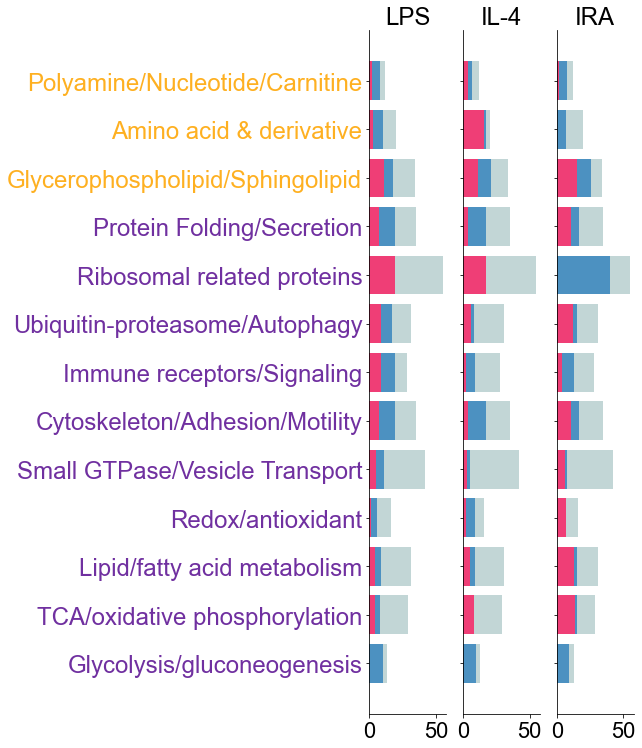

In [113]:
# List of dataframes to plot
df_list = [get_dys_lps, get_dys_il4, get_dys_ira]
df_labels = ['LPS', 'IL-4', 'IRA']
# Define custom colors for each category

pathway_color_map = {
'Glycolysis/gluconeogenesis': '#7030A0',
'TCA/oxidative phosphorylation': '#7030A0',
'Lipid/fatty acid metabolism': '#7030A0',
'Redox/antioxidant': '#7030A0',
'Small GTPase/Vesicle Transport': '#7030A0',
'Cytoskeleton/Adhesion/Motility': '#7030A0',
'Immune receptors/Signaling': '#7030A0',
'Ubiquitin-proteasome/Autophagy': '#7030A0',
'Ribosomal related proteins': '#7030A0',
'Protein Folding/Secretion': '#7030A0',
'Glycerophospholipid/Sphingolipid': '#FEB021',
'Amino acid & derivative': '#FEB021',
'Polyamine/Nucleotide/Carnitine': '#FEB021'}

category_colors = {
    'Upregulated': '#EF3E76',       # Reddish for upregulation
    'Downregulated': '#4C91C1',     # Bluish for downregulation
    'No Change': '#C2D6D6' # Grey for no change
}
# Plot settings
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,10.5), sharey=True)  # Horizontally arranged subplots, shared Y-axis

# Loop through each dataframe and create a horizontal stacked bar plot
for i, (dfdf, label) in enumerate(zip(df_list, df_labels)):
    ax = axes[i]
    y = np.arange(len(dfdf.index))  # Y positions (pathways)

    # Stacking bars horizontally
    left = np.zeros(len(dfdf.index))  # Initialize left to 0 for stacking
    for category in dfdf.columns:
        values = dfdf[category].values
        ax.barh(y, values, label=category if i == 0 else "", left=left, color=category_colors[category])  # Show legend only for the first plot
        left += values  # Update left for stacking

    # Customize each subplot
    ax.set_title(label,fontsize = 24)
    if i == 0:
        ax.set_yticks(y)
        ax.set_yticklabels(dfdf.index,fontsize = 24)  # Show pathway labels only on the first subplot
        for tick in ax.get_yticklabels():
            pathway = tick.get_text()
            # Set the tick label color using the mapping, or default to black if not found
            tick.set_color(pathway_color_map.get(pathway, 'black'))
    # else:
    #     ax.set_yticks([])  # Remove Y-axis labels for other subplots
        # Remove the right and upper frame (spines)
        # Customize X-axis font
    ax.tick_params(axis='x', labelsize=22) 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add shared X-axis label and legend
# fig.supxlabel("Counts",fontsize = 16)

# Add a single legend outside the plot
# fig.legend(dfdf.columns, loc='upper right', bbox_to_anchor=(1.15, 1),fontsize = 16)

plt.tight_layout()
plt.show()

In [602]:
# 明天画脂类代谢的box plot 和  network 图
# 明天画氧化还原相关
# 氨基酸代谢相关等






# plot clustered heatmap

In [74]:
mol_type = []

for item in result2.index:
    if '_MOUSE' in item:
        mol_type.append('yes')
    else:
        mol_type.append('no')
len(mol_type)

617

In [75]:
result2.to_csv(f'{file_save_path}/heatmap.csv')

In [76]:
result2.index = [f"indexname_indexname_{i}" for i in range(len(result2))]
result2

Con       LPS      IL_4       IRD
indexname_indexname_0    1.162271 -1.080416 -0.455185  0.373331
indexname_indexname_1   -1.074608  0.399216 -0.265823  0.941215
indexname_indexname_2   -0.317815  1.278383  0.083481 -1.044049
indexname_indexname_3   -0.490841 -0.162886 -0.643126  1.296853
indexname_indexname_4    0.803498 -1.243222 -0.029765  0.469489
...                           ...       ...       ...       ...
indexname_indexname_612 -0.146825  0.918745  0.533587 -1.305507
indexname_indexname_613  0.007180  0.425555  0.999973 -1.432707
indexname_indexname_614 -0.339693 -0.325463 -0.622474  1.287630
indexname_indexname_615 -0.485571 -0.384653 -0.414559  1.284783
indexname_indexname_616 -0.766994 -0.234376 -0.546208  1.547577

[617 rows x 4 columns]

In [77]:
from matplotlib.colors import LinearSegmentedColormap

def plot_clusterheatmap(dfheatmap, low=-2, high=2,color_list = mol_type):
    # Define custom color map
    # colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    # n_bins = 10  # Number of bins in the color map
    # cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    color_dict = {"yes": "#7030A0", "no": "#FFA500"} 
    col_colors = pd.Series(color_list).map(color_dict).tolist()
    colors_transposed = dict(zip(dfheatmap.columns, col_colors))
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    g = sns.clustermap(
        dfheatmap,
        annot=False,
        cmap='viridis',
        vmin=low,
        vmax=high,
        col_colors=dfheatmap.columns.map(colors_transposed),
        figsize=(23, 6),  # Increased height for better accommodation
        row_cluster=True,
        col_cluster=True,
        fmt=".3f",
        dendrogram_ratio=(.01, .01),  # Adjusted ratios to allocate more space for dendrograms
        tree_kws={'linewidths': 0},
        # cbar=False  # Disable the color bar
    )
    # Adjust tick labels
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=18)
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.tick_params(axis='x', which='both', length=0)

    # # If the color bar axis still exists, hide it explicitly
    if hasattr(g, 'cax') and g.cax is not None:
        g.cax.set_visible(False)

    # # Manually adjust layout to ensure no space is reserved for the color bar
    g.fig.subplots_adjust(left=0.2, right=0.8, top=0.95, bottom=0.2)

    # Ensure the save directory exists
    os.makedirs(figure_save_path, exist_ok=True)

    # Save the figure with tight bounding box to prevent any residual padding
    plt.savefig(
        os.path.join(figure_save_path, 'clustered_heatmap_multiome_marcophages.svg'),
        format='svg',
        bbox_inches='tight'
    )
    plt.show()
    plt.close()  # Close the figure to free memory

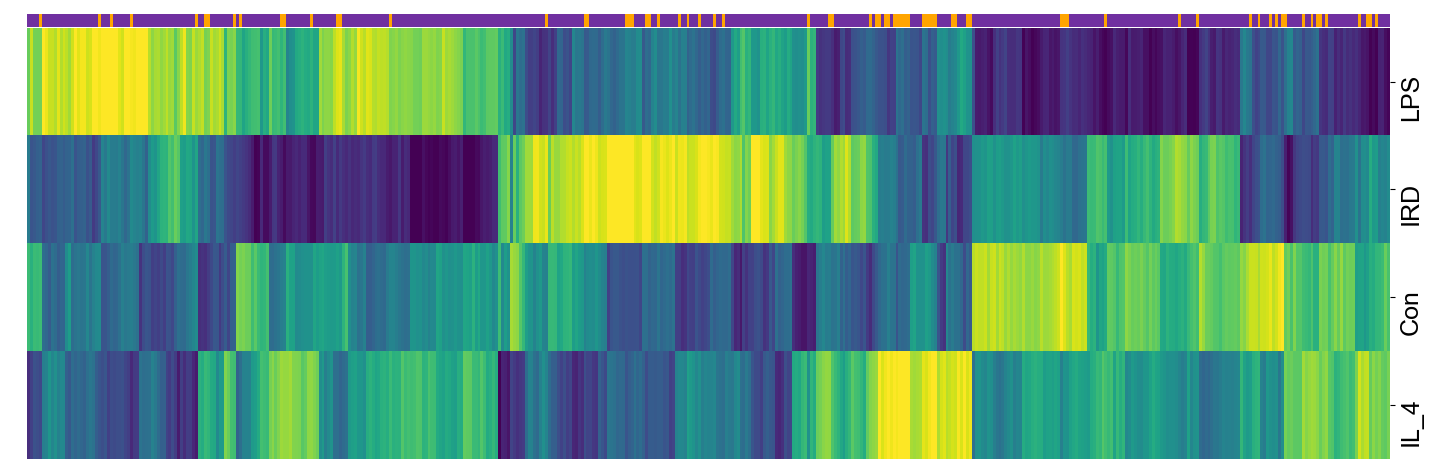

In [43]:
plot_clusterheatmap(result2.T, low=-1.5, high=1.5,color_list = mol_type)

# plot proteins

In [86]:
# dfpro_stdbyrow = standardscaler_row(df = df_pro_sig)
dfpro_stdbyrow = standardscaler_row(df = haha_df)
# dfpro_stdbyrow = standardscaler_row(df = df4)
dfmeta_stdbyrow = standardscaler_row(df = df_meta_sig)
# dfpro_stdbyrow
dfmulti_stdbyrow = pd.concat([dfpro_stdbyrow,dfmeta_stdbyrow],axis = 0)


In [112]:
protein_gene_names = [item.split('|')[1].split('_')[0] for item in haha_df.index]

In [113]:

haha_df[haha_df.index.str.contains('ATR', case=False, na=False)]

A1        A2       A3      A4        A5        A6  \
Q8K310|MATR3_MOUSE -1.138187 -1.120527 -0.89893 -1.1992 -1.029406 -1.023971   

                          B1        B2        B3        B4  ...       C3  \
Q8K310|MATR3_MOUSE -1.161255 -1.078523 -1.092011 -1.238766  ... -0.99819   

                          C4        C5        C6        D1        D2  \
Q8K310|MATR3_MOUSE -0.943486 -1.129837 -1.071778 -1.387181 -1.292921   

                          D3        D4        D5        D6  
Q8K310|MATR3_MOUSE -1.172834 -1.099201 -1.232615 -1.244743  

[1 rows x 24 columns]

In [114]:
import re

def sanitize_filename(name):
    # Define a pattern for invalid characters
    # On Windows, the following characters are invalid: < > : " / \ | ? *
    # You can adjust the pattern based on your requirements
    invalid_chars = r'[<>:"/\\|?*()]'
    # Replace invalid characters with an underscore
    sanitized = re.sub(invalid_chars, '_', name)
    # Optionally, replace spaces with underscores
    sanitized = sanitized.replace(' ', '_')
    return sanitized

In [116]:
# plot_selected_molecule(listname=['2/sp|Q6Q899|DDX58_MOUSE/tr|A2AP29|A2AP29_MOUSE'],df_name=dfpro_stdbyrow,figuresize = (4,5),
#                       save_path = r'C:\Users\jiangy5\Box\SMAD PROJECT\figures\Mainpart 3_Macrophages polarization\sig_metabolites_boxstripplot_path')

In [117]:
# Original string

def take_Gene_protein_names(item1 =  "_MOUSE", item2= "ATP", item = '2/sp|Q9DCX2|ATP5H_MOUSE'):
    # Splitting the string by "/"
    parts = item.split('|')
    # Extract components with "_MOUSE"
    mouse_parts = [part for part in parts if item1 and item2 in part]
    new_parts = [itemx.split('/')[0] for itemx in mouse_parts]
    # Display the result
    return new_parts

In [81]:
from scipy.interpolate import make_interp_spline

def plot_select_proteins_pattern(dfdf = df4,figuresize=(10, 5)): 
    
    # Set the same palette
    palette = sns.color_palette("viridis", len(dfdf["Protein"].unique()))
    order = dfdf["treatment"].unique()
    palette2 = sns.color_palette("Set1", len(dfdf["Protein"].unique()))
    # Create figure
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize = figuresize)
    sns.boxplot(
        x="treatment", y="Value", hue="Protein", data=dfdf,
        palette=palette, dodge=True, width=0.6, showfliers=False, order=order, 
        # legend=True
    )
    
    # Plot fitted curve for each protein
    proteins = dfdf["Protein"].unique()
    for i, protein in enumerate(proteins):
        # Extract data for the current protein
        protein_data = dfdf[dfdf["Protein"] == protein]
        medians = [protein_data[protein_data["treatment"] == treatment]["Value"].median() for treatment in order]
        treatment_indices = np.arange(len(order))  # Numeric x-values for treatments
    
        # Create a smooth curve using spline interpolation
        spline = make_interp_spline(treatment_indices, medians, k=3)  # k=3 for cubic spline
        smooth_x = np.linspace(treatment_indices.min(), treatment_indices.max(), 300)  # Generate 300 points for smoothness
        smooth_y = spline(smooth_x)
    
        # Plot the smooth curve
        plt.plot(smooth_x, smooth_y, linestyle='dashed', color=palette2[i], linewidth=2,
                 label=f'{protein} Curve')
    
    # Add labels and ticks
    plt.xlabel(" ")
    plt.ylabel("Z-Score", fontsize=22)
    plt.xticks(np.arange(len(order)), order, fontsize=22)  # Use original treatment names as ticks
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    # Optional: Show legend for the protein curves
    plt.legend(title="", bbox_to_anchor=(1.0, 1), loc='upper left')
    
    plt.show()


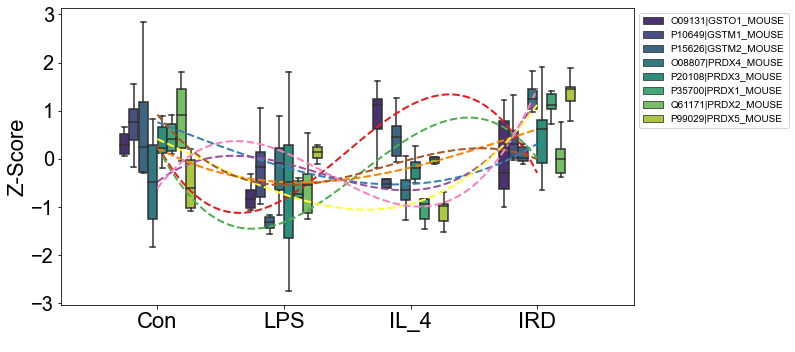

In [121]:
# protein_list = ['2/sp|Q6Q899|DDX58_MOUSE/tr|A2AP29|A2AP29_MOUSE']

# protein_list = ['2/sp|P61205|ARF3_MOUSE/sp|P84078|ARF1_MOUSE',
#  '3/sp|P61750|ARF4_MOUSE/tr|E9Q798|E9Q798_MOUSE/tr|F6UFB9|F6UFB9_MOUSE']

# protein_list = ['1/sp|P56480|ATPB_MOUSE','1/sp|P56135|ATPK_MOUSE','1/sp|Q9DB20|ATPO_MOUSE',]

protein_list_s = ['O09131|GSTO1_MOUSE',
 'P10649|GSTM1_MOUSE',
 'P15626|GSTM2_MOUSE',
'O08807|PRDX4_MOUSE',
 'P20108|PRDX3_MOUSE',
 'P35700|PRDX1_MOUSE',
 'Q61171|PRDX2_MOUSE',
 'P99029|PRDX5_MOUSE']
# protein_list = ['O35604|NPC1_MOUSE', 'Q9Z0J0|NPC2_MOUSE',
#  'Q60932|VDAC1_MOUSE', 'Q60930|VDAC2_MOUSE', 
#  'Q60931|VDAC3_MOUSE','Q61263|SOAT1_MOUSE',
#  'Q91ZX7|LRP1_MOUSE']
# protein_list = ['P10649|GSTM1_MOUSE','P15626|GSTM2_MOUSE','P11352|GPX1_MOUSE','O09131|GSTO1_MOUSE']
protein_list = [ 'P56135|ATPK_MOUSE',                        # 
                'P56382|ATP5E_MOUSE',
                'P56480|ATPB_MOUSE',
                'Q06185|ATP5I_MOUSE',
                'Q9D3D9|ATPD_MOUSE',
                 'Q9DB20|ATPO_MOUSE',
                'Q03265|ATPA_MOUSE',
                'Q9DCX2|ATP5H_MOUSE',]
                # 'Q91VR2|ATPG_MOUSE']

protein_list2 = [                                                 # glycolysis proteins 
#                 'O08749|DLDH_MOUSE',
#                 'P47738|ALDH2_MOUSE', 
                'P09411|PGK1_MOUSE',
                'P47738|ALDH2_MOUSE', 
                'P06151|LDHA_MOUSE',
                'P05064|ALDOA_MOUSE',
                'P17182|ENOA_MOUSE',
                'Q9DBJ1|PGAM1_MOUSE', 
                'P12382|PFKAL_MOUSE', 
                'Q9WUA3|PFKAP_MOUSE'
                 ]

result_df = get_combined_df(protein_list, dfpro_stdbyrow, treatment)
result_df2 = get_combined_df(protein_list2, dfpro_stdbyrow, treatment)
result_df_s = get_combined_df(protein_list_s, dfpro_stdbyrow, treatment)
# newlist = [take_Gene_protein_names(item1 =  "_MOUSE", item2= "", item = item)[0] for item in result_df.Protein]
# newlist
plot_select_proteins_pattern(dfdf = result_df_s,figuresize=(9, 5))
# flattenlist = [item for sublist in newlist for item in sublist]
# flattenlist 
# result_df['Protein'] = protein_list
# result_df

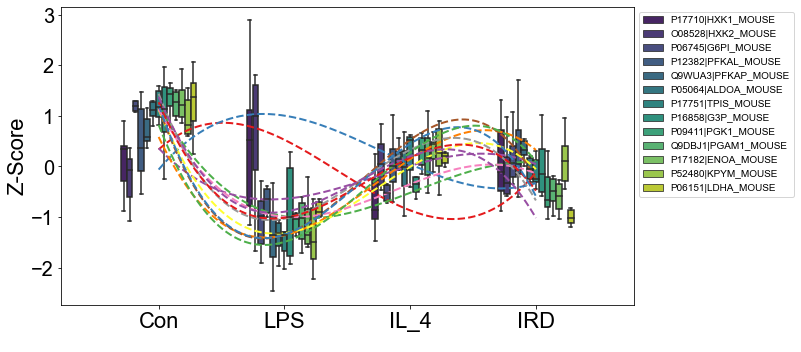

In [122]:
plot_select_proteins_pattern(dfdf = get_combined_df(pro_function_group1, dfpro_stdbyrow, treatment),
                             figuresize=(9, 5))

In [172]:
 dfpro_stdbyrow

A1        A2        A3        A4        A5  \
B2RXS4|PLXB2_MOUSE  -0.173345 -0.613596  1.139148  2.243176  0.469641   
E9Q634|MYO1E_MOUSE   0.890403 -0.220581  0.077963  1.045285 -0.555231   
O08529|CAN2_MOUSE    1.332807  0.420144  1.448431  0.510827  2.086872   
O08553|DPYL2_MOUSE   1.186127 -0.211169  0.151735 -0.247102  1.349155   
O08749|DLDH_MOUSE   -0.747612  0.305068 -1.268583 -0.640079 -1.815314   
...                       ...       ...       ...       ...       ...   
D3Z2T9|D3Z2T9_MOUSE  0.500977  0.229974 -0.540825 -0.551991  0.498244   
E3W997|E3W997_MOUSE  0.500977  0.229974 -0.540825 -0.551991  0.498244   
E9PVC7|E9PVC7_MOUSE  0.500977  0.229974 -0.540825 -0.551991  0.498244   
E9PZX7|E9PZX7_MOUSE  0.500977  0.229974 -0.540825 -0.551991  0.498244   
E9Q9E4|E9Q9E4_MOUSE  0.500977  0.229974 -0.540825 -0.551991  0.498244   

                           A6        B1        B2        B3        B4  ...  \
B2RXS4|PLXB2_MOUSE  -0.420760  0.010463 -0.216412  0.104485  0.486971  ...   
E9Q634|MYO1E_MOUSE  -0.401311 -0.462140  1.482741  1.053566 -1.183207  ...   
O08529|CAN2_MOUSE    1.174542 -1.575514 -1.157696 -1.274291 -1.109468  ...   
O08553|DPYL2_MOUSE   0.499091 -0.071785 -1.326918 -0.570955 -1.183675  ...   
O08749|DLDH_MOUSE   -2.281128  0.298496  0.748511  0.400073  1.231482  ...   
...                       ...       ...       ...       ...       ...  ...   
D3Z2T9|D3Z2T9_MOUSE -0.631490  1.767114  1.879229  1.623992  1.697653  ...   
E3W997|E3W997_MOUSE -0.631490  1.767114  1.879229  1.623992  1.697653  ...   
E9PVC7|E9PVC7_MOUSE -0.631490  1.767114  1.879229  1.623992  1.697653  ...   
E9PZX7|E9PZX7_MOUSE -0.631490  1.767114  1.879229  1.623992  1.697653  ...   
E9Q9E4|E9Q9E4_MOUSE -0.631490  1.767114  1.879229  1.623992  1.697653  ...   

                           C3        C4        C5        C6        D1  \
B2RXS4|PLXB2_MOUSE   0.001210 -1.245918 -0.138278 -2.552065  1.227859   
E9Q634|MYO1E_MOUSE  -0.301528 -0.791370  0.536662 -1.375609 -1.060410   
O08529|CAN2_MOUSE   -0.110642 -0.053885 -0.668639  0.659510 -0.132031   
O08553|DPYL2_MOUSE  -1.646762  0.286765  0.102298 -1.517853 -1.435824   
O08749|DLDH_MOUSE   -0.517985 -1.016830 -0.111488 -0.320026  1.155142   
...                       ...       ...       ...       ...       ...   
D3Z2T9|D3Z2T9_MOUSE -0.562218 -0.315475 -1.171052 -0.266794 -0.937506   
E3W997|E3W997_MOUSE -0.562218 -0.315475 -1.171052 -0.266794 -0.937506   
E9PVC7|E9PVC7_MOUSE -0.562218 -0.315475 -1.171052 -0.266794 -0.937506   
E9PZX7|E9PZX7_MOUSE -0.562218 -0.315475 -1.171052 -0.266794 -0.937506   
E9Q9E4|E9Q9E4_MOUSE -0.562218 -0.315475 -1.171052 -0.266794 -0.937506   

                           D2        D3        D4        D5        D6  
B2RXS4|PLXB2_MOUSE  -0.017887  2.086233 -0.647410 -0.750443 -0.440534  
E9Q634|MYO1E_MOUSE   0.079062  0.585795 -0.009175 -0.031125  0.458616  
O08529|CAN2_MOUSE    0.560070  0.904419  0.845611 -0.187596  0.249511  
O08553|DPYL2_MOUSE   0.032206  1.981303  1.734385  0.584130  0.438126  
O08749|DLDH_MOUSE    2.139051  0.299361  0.670423  0.012179  1.371135  
...                       ...       ...       ...       ...       ...  
D3Z2T9|D3Z2T9_MOUSE -0.966869 -1.068439 -0.317067 -0.700158 -1.096951  
E3W997|E3W997_MOUSE -0.966869 -1.068439 -0.317067 -0.700158 -1.096951  
E9PVC7|E9PVC7_MOUSE -0.966869 -1.068439 -0.317067 -0.700158 -1.096951  
E9PZX7|E9PZX7_MOUSE -0.966869 -1.068439 -0.317067 -0.700158 -1.096951  
E9Q9E4|E9Q9E4_MOUSE -0.966869 -1.068439 -0.317067 -0.700158 -1.096951  

[1634 rows x 24 columns]

In [171]:
plot_select_proteins_pattern(dfdf = get_combined_df(multi_group3, dfpro_stdbyrow, treatment),
                             figuresize=(9, 5))

KeyError: 'Glutathione'

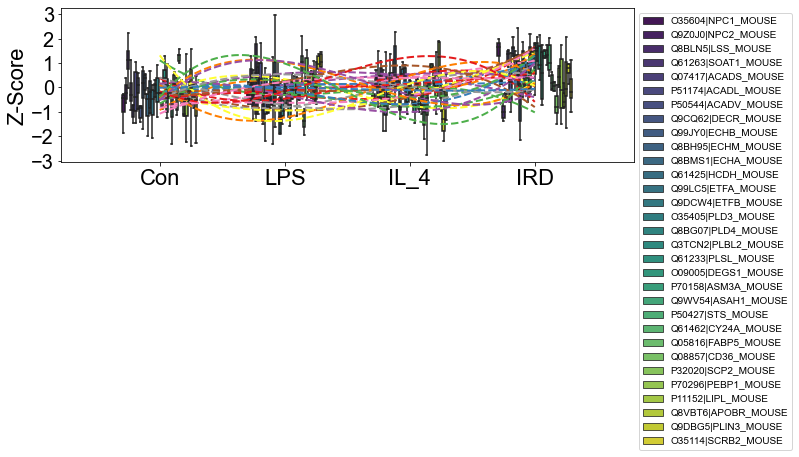

In [276]:
plot_select_proteins_pattern(dfdf = get_combined_df(pro_function_group3, dfpro_stdbyrow, treatment),
                             figuresize=(9, 5))

In [52]:

# dfdf = result_df

# # set same palette
# palette = sns.color_palette("viridis", len(dfdf["Protein"].unique()))
# order = dfdf["treatment"].unique()

# # creat figure
# plt.figure(figsize=(8, 5))
# sns.boxplot(x="treatment", y="Value", hue="Protein", data=dfdf, 
#             palette=palette, dodge=True, width=0.7, showfliers=False, order=order, legend=True)
# # sns.stripplot(x="treatment", y="Value", hue="Protein", data=dfdf, 
# #               dodge=True, jitter=True, alpha=0.8, marker="o", size=4, 
# #               edgecolor="black", linewidth=0.5, palette=palette, order=order, legend=False)
 
# # adjust 
# # handles, labels = plt.gca().get_legend_handles_labels()
# # plt.legend(handles[:len(dfdf['Protein'].unique())], labels[:len(dfdf['Protein'].unique())], 
# #            title="Protein", bbox_to_anchor=(0.55, 1), loc='upper right')

# # add labels and ticks
# plt.xlabel(" ")
# plt.ylabel("Z-Score", fontsize=22)
# plt.xticks(fontsize=22)
# plt.yticks(fontsize=20)
# plt.tight_layout()

# # plt.savefig(f'{figure_save_path}/ATP_related_Macrophages.svg',dpi=800,bbox_inches='tight')
# plt.show()


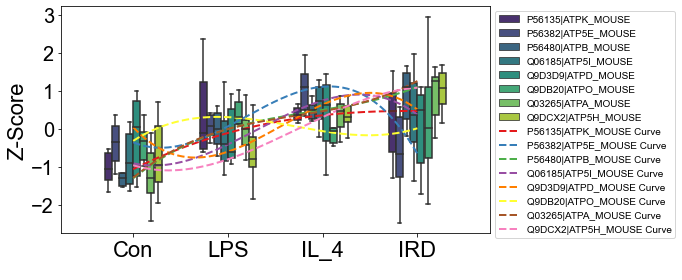

In [80]:
plot_select_proteins_pattern(dfdf = result_df,figuresize=(7, 4))

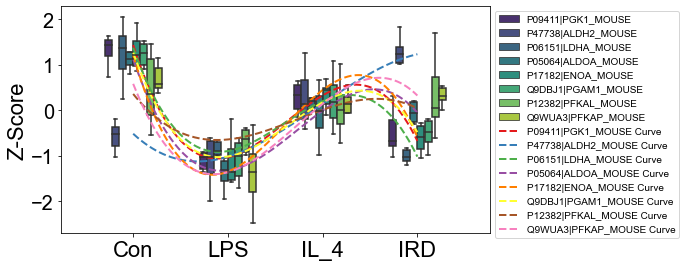

In [81]:
plot_select_proteins_pattern(dfdf = result_df2,figuresize=(7, 4))

# plot metabolites

In [57]:

# meta_list =  [  
#             'Glutathione',
#             'Arginine',
#             'Phosphocholine',
#             'Creatine',
#             'AMP',
#             'Carnitine', 
#             'Acetyl-carnitine',
#             'Butyryl-carnitine',
#             ]

meta_list3 = [ 'Spermidine',
              'Spermine',
 'Carnitine',
 'Glutathione',
 'Palmitoyl-carnitine',]

# meta_list2 =[ 'Creatine',
#  'Spermine',
#  'Tyrosine ',
#  'Histidine',
#  'Abrine ',
#  'Arginine',
#  'Acetyl-carnitine',
#  'Butyryl-carnitine',
#  'n,n-dimethylarginine',
#  'Lysine',
#  '5_Methylthioadenosine']
meta_list4 =[ 'Creatine',
             'Carnitine',
             'Spermidine',
             'Glutathione',
 'Tyrosine ',
 'Histidine',
 'Abrine ',
 'Arginine',
 'Lysine',]


meta_list5 = ['PC(14:0/15:0)',
              'Phosphocholine',
              # 'PS(18:0/18:2)',
 'PE(16:0/20:4)',
               'PC(16:1/22:6)',]


# meta_list = [# 'Butyrylcarnitine - 40.00 eV', 'Palmitoylcarnitine -  eV',
#              'Glutathione']
# meta_list =         [ 'PC(18:1/20:4); [M+H]+ C46H83N1O8P1','Val-Met ','PS(18:0/18:2); [M+H]+ C42H79N1O10P1',]
 # '2/sp|Q03265|ATPA_MOUSE/tr|D3Z6F5|D3Z6F5_MOUSE','1/sp|Q9D3D9|ATPD_MOUSE','1/sp|Q9DB20|ATPO_MOUSE',
 # '2/sp|Q9DCX2|ATP5H_MOUSE/tr|B1ASE2|B1ASE2_MOUSE']

result_df_meta = get_combined_df(meta_list4, dfmeta_stdbyrow, treatment)
result_df_meta5 = get_combined_df(meta_list5, dfmeta_stdbyrow, treatment)
result_df_meta

Value treatment   Protein
A1 -0.148759       Con  Creatine
A2  0.311045       Con  Creatine
A3  0.089228       Con  Creatine
A4  0.660188       Con  Creatine
A5 -0.135331       Con  Creatine
..       ...       ...       ...
D2  0.920308       IRD    Lysine
D3  0.595495       IRD    Lysine
D4 -0.429272       IRD    Lysine
D5 -0.173379       IRD    Lysine
D6 -0.154155       IRD    Lysine

[216 rows x 3 columns]

In [58]:
sig_metabolites_boxstripplot_path = r'C:\Users\jiangy5\Box\SMAD PROJECT\figures\figure 3_macrophages part\sig_metabolites_boxstripplot_path'


def plot_select_metabolites( meta_list = ['Arginine'],
                             figuresize= (7, 5)
                           ):
    
    # meta_list = [# 'Butyrylcarnitine - 40.00 eV', 'Palmitoylcarnitine -  eV',
    #              'Arginine|2-amino-5-(diaminomethylideneamino)pentanoic acid']
      
    dfdf_meta = get_combined_df(meta_list, dfmeta_stdbyrow, treatment)

    # set same palette
    palette_meta = sns.color_palette("deep", len(dfdf_meta["Protein"].unique()))
    order_meta = dfdf_meta["treatment"].unique() 
    # creat figure
    plt.figure(figsize=figuresize)
    plt.rcParams['font.family'] = 'Arial'
    sns.boxplot(x="treatment", y="Value", hue="Protein", data=dfdf_meta, 
                palette=palette_meta, dodge=True, width=0.7, showfliers=False, order=order_meta, legend=False)
    sns.stripplot(x="treatment", y="Value", hue="Protein", data=dfdf_meta, 
                  dodge=True, jitter=True, alpha=0.9, marker="o", size=4, 
                  edgecolor="black", linewidth=0.5, palette=palette_meta, order=order_meta, legend=False) 
    # adjust 
    # handles, labels = plt.gca().get_legend_handles_labels()
    # plt.legend(handles[:len(dfdf_meta['Protein'].unique())], labels[:len(dfdf_meta['Protein'].unique())], 
    #            title="Protein", bbox_to_anchor=(0.55, 1), loc='upper right')
    # add labels and ticks
    plt.xlabel(" ")
    plt.ylabel("Z-Score", fontsize=22)
    plt.xticks(fontsize=22,rotation = 60)
    # Set Y-axis ticks to have exactly 5 ticks
    # Set Y-axis ticks to integers
    y_min, y_max = plt.ylim()  # Get current Y-axis limits
    y_ticks = np.linspace(np.ceil(y_min), np.floor(y_max), 5)  # Generate 5 evenly spaced ticks as integers
    y_ticks = np.round(y_ticks).astype(int)  # Round and convert to integers
    plt.yticks(y_ticks, fontsize=22)
    # plt.yticks(fontsize=20)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    # set savename
    savename = meta_list[0].replace("|", "_").replace("-", "_")
    plt.savefig(f'{figure_save_path}/{savename}.svg',dpi=800,bbox_inches='tight')
    plt.show()

In [59]:
meta_list1 =[ 'Ser-Ile ',
 'Leu-Pro ',
 'Val-Ile ',
 'His-Pro ',
 'Val-Met ',
 'His-Ile ',
 'Pro-Arg ',
 'Val-Arg ',
 'Lysine',
 'Ile-Arg ',
 'Tyr-Phe ',]

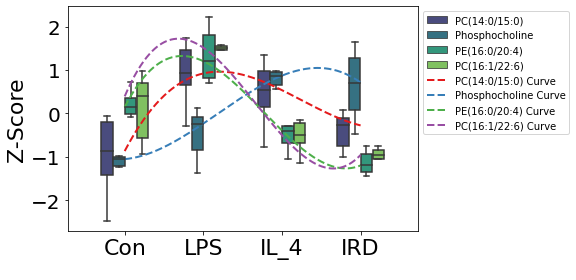

In [60]:


plot_select_proteins_pattern(dfdf = result_df_meta5,figuresize=(6, 4))
# plot_select_metabolites( meta_list = meta_list3,
#                              figuresize= (7, 5)
#                            )

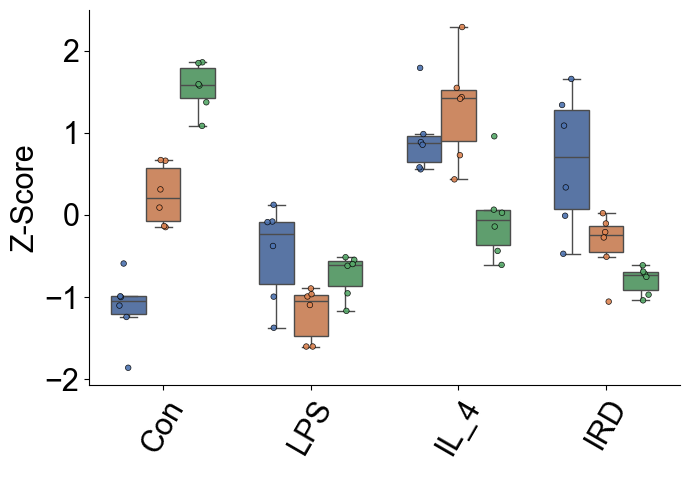

In [420]:
# meta_list_example = [
#             'Phosphocholine',
#             'Creatine',
#             'AMP',]

# plot_select_metabolites( meta_list = meta_list_example,
#                              figuresize= (7, 5)
#                            )   

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


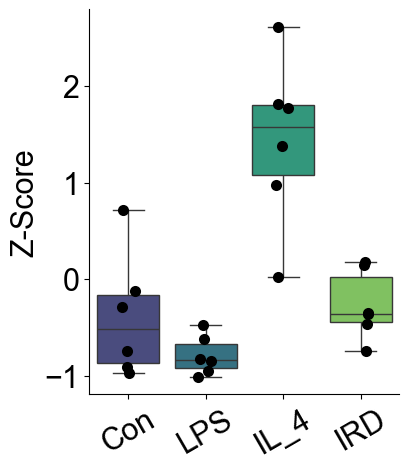

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


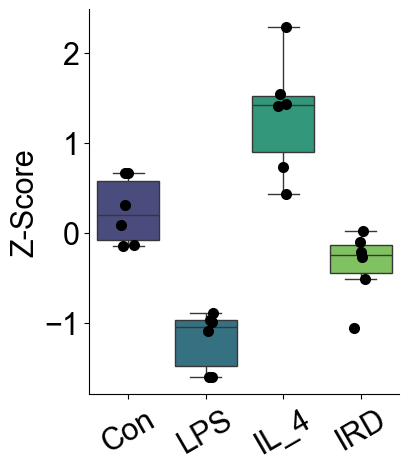

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


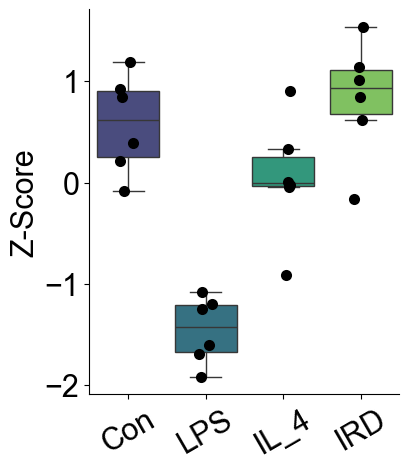

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


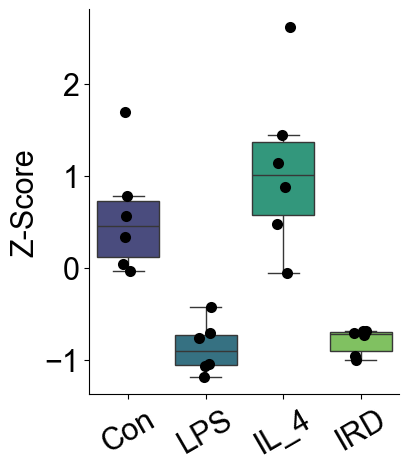

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


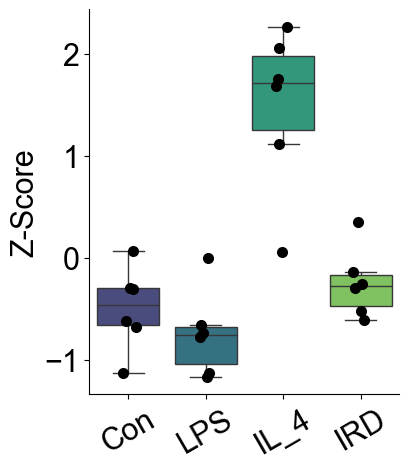

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


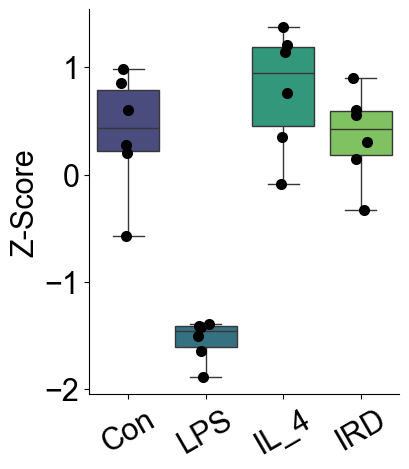

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


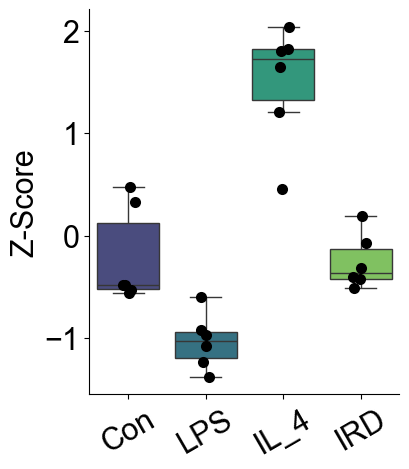

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


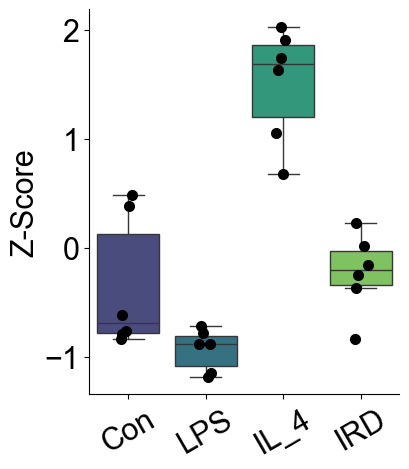

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


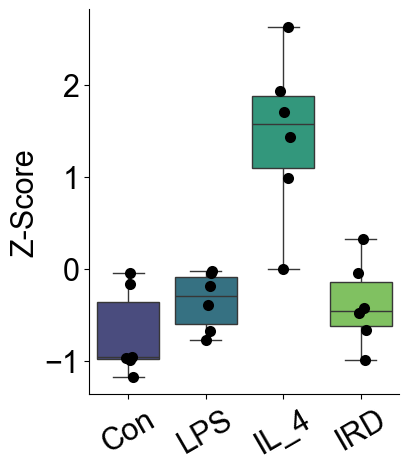

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


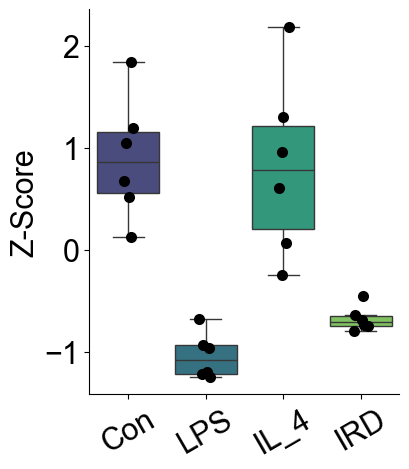

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


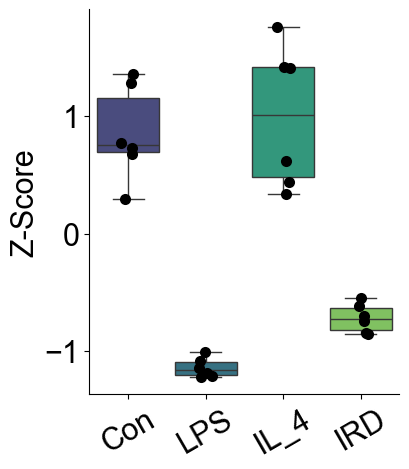

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


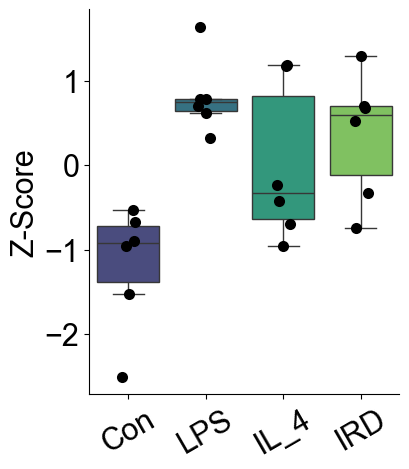

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


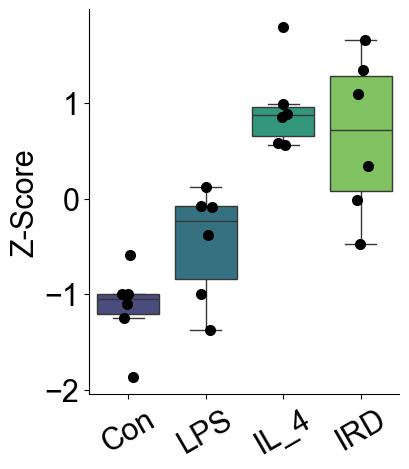

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


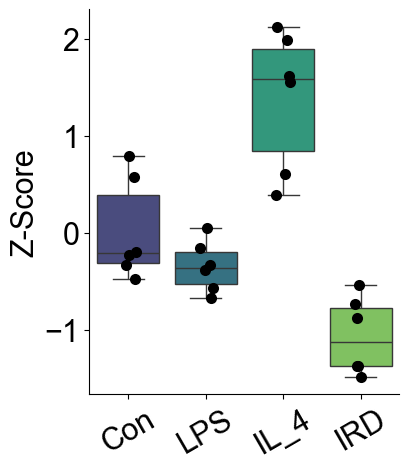

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


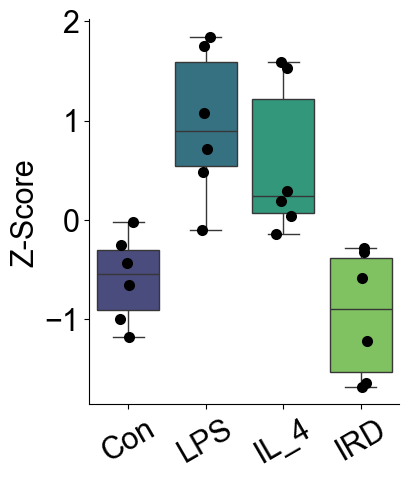

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


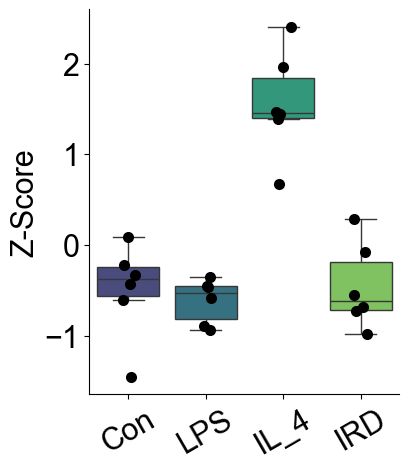

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


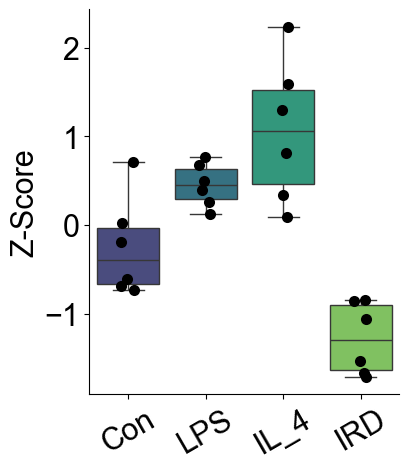

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


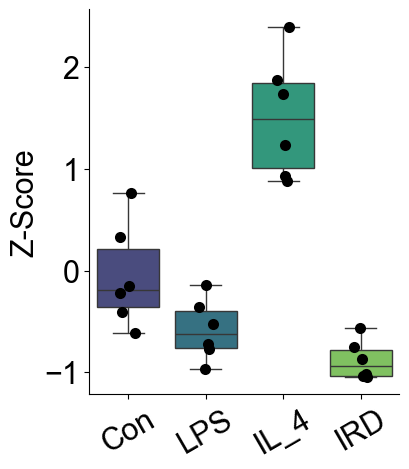

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


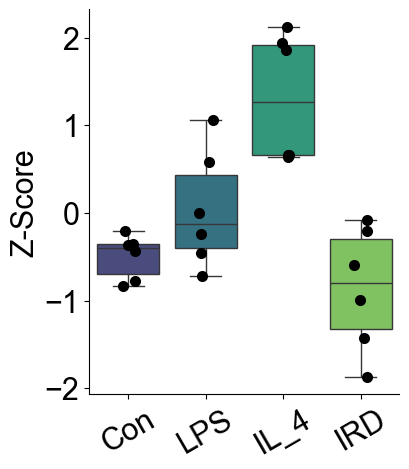

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


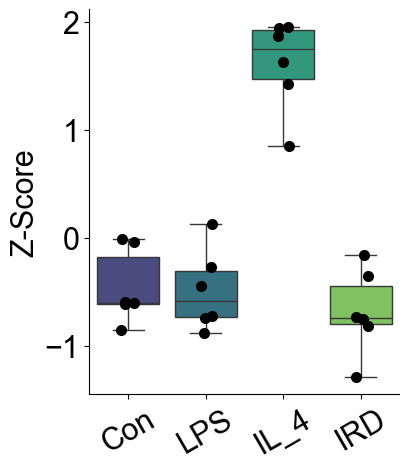

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


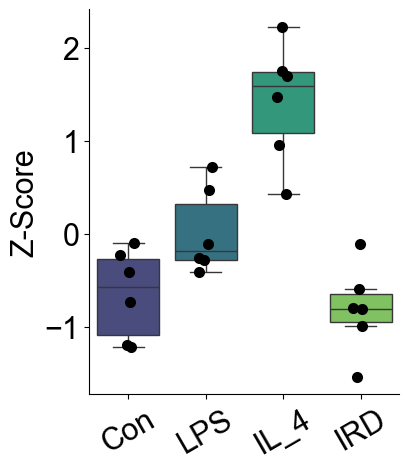

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


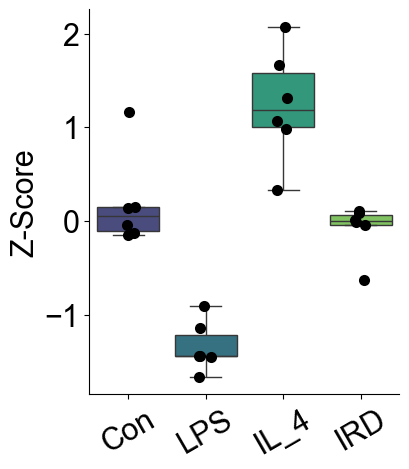

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


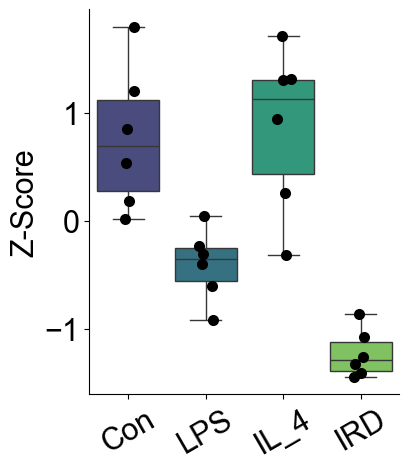

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


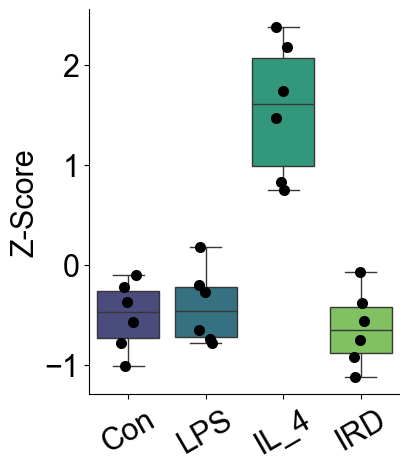

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


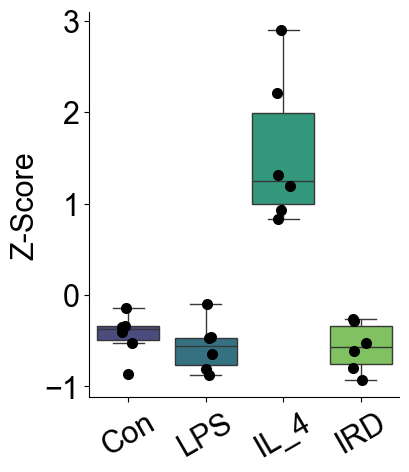

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


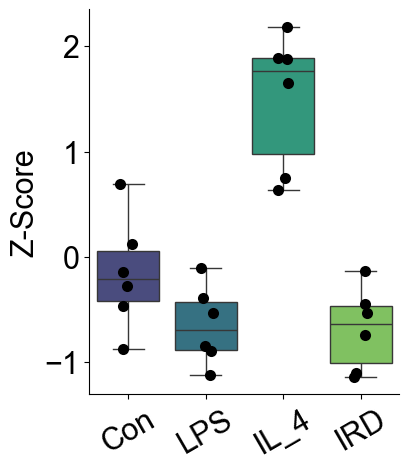

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


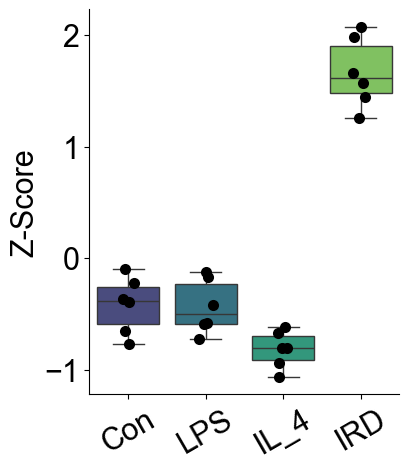

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


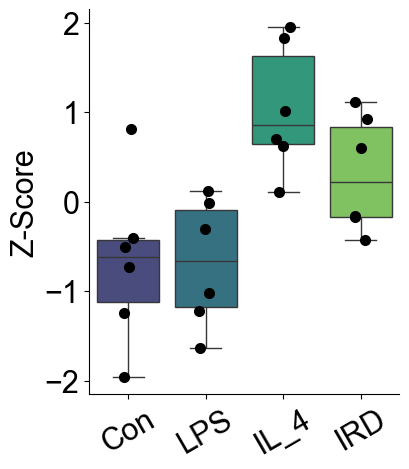

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


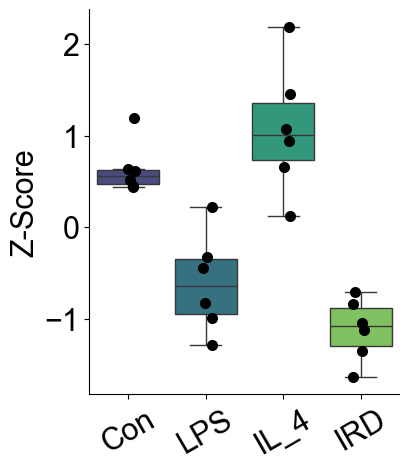

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


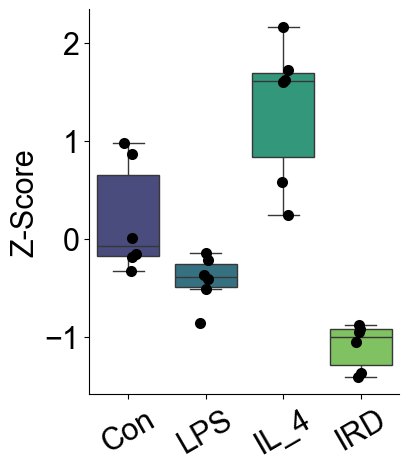

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


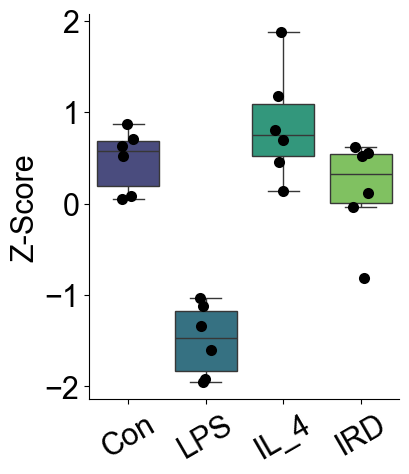

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


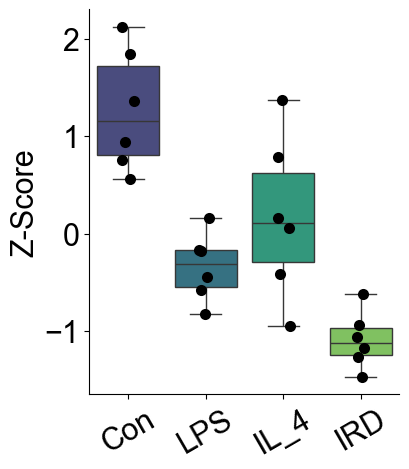

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


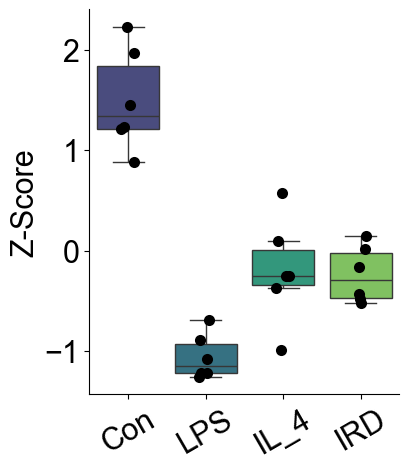

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


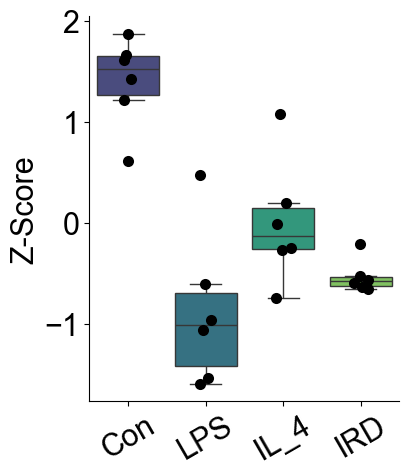

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


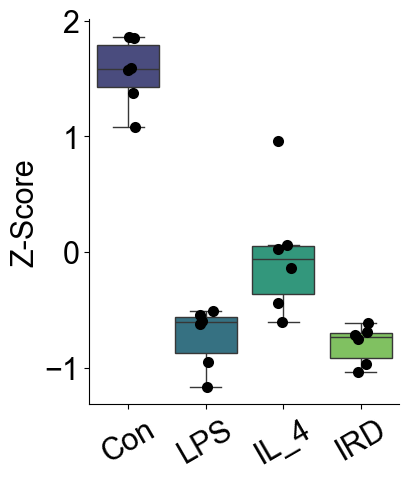

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


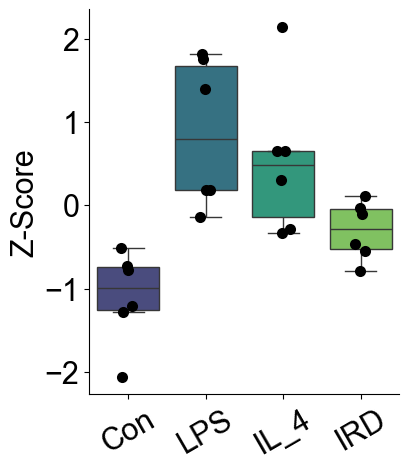

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


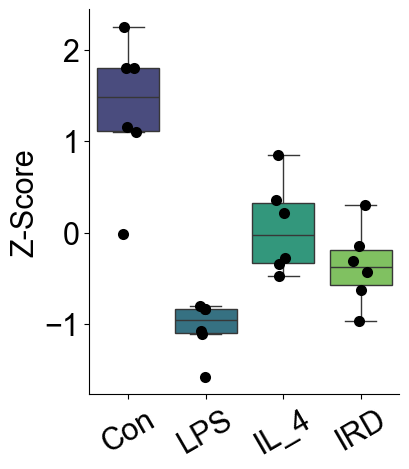

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


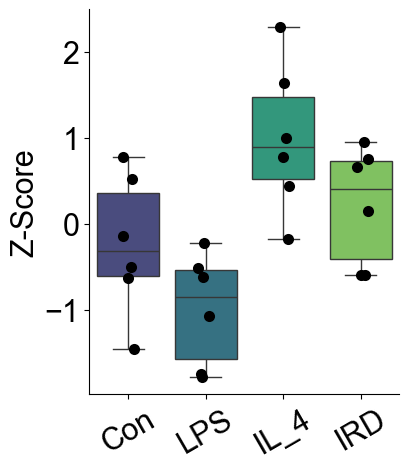

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


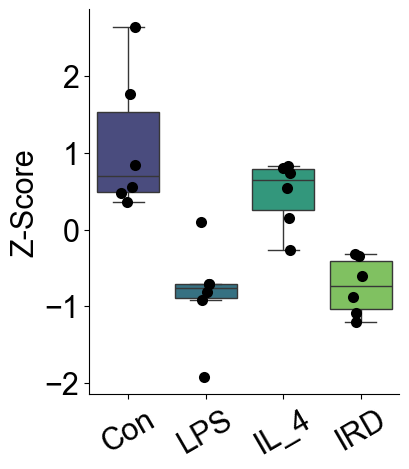

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


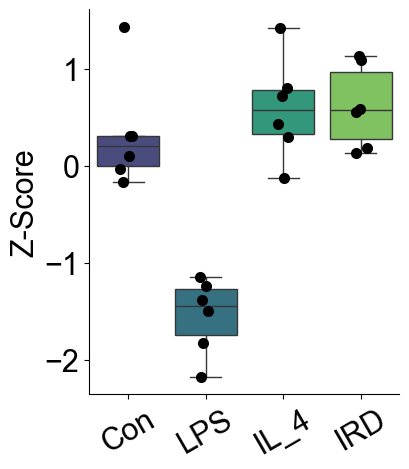

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


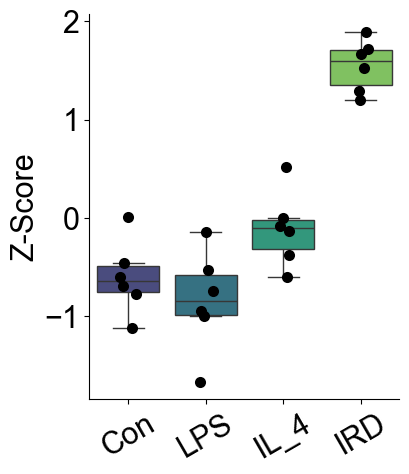

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


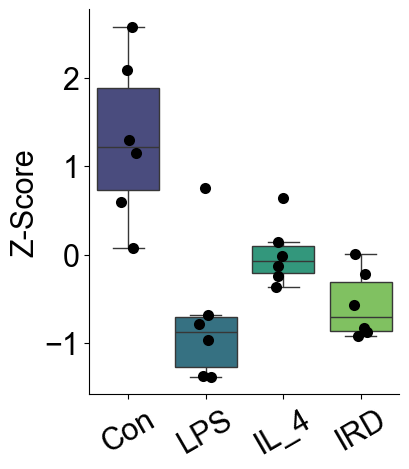

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


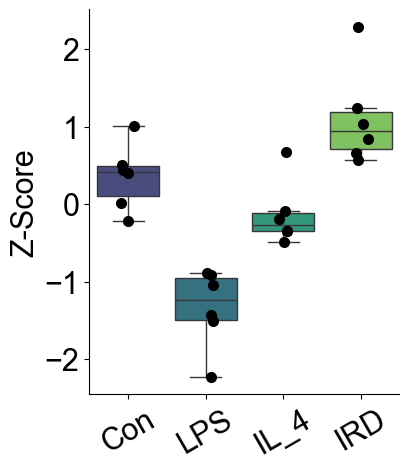

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


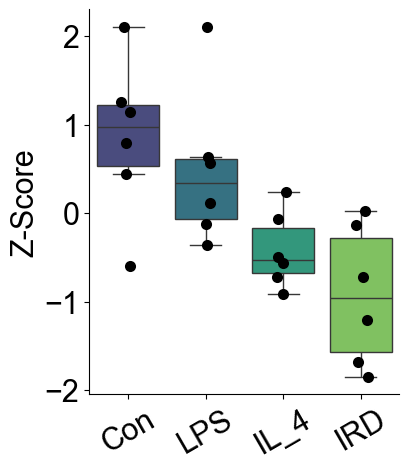

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


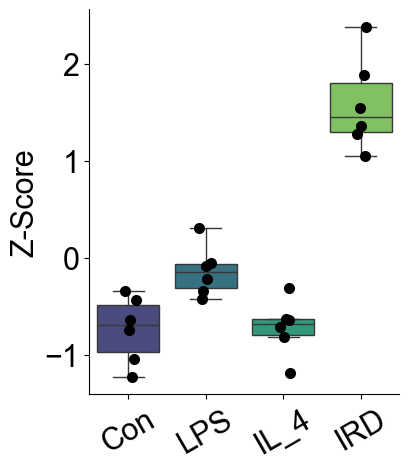

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


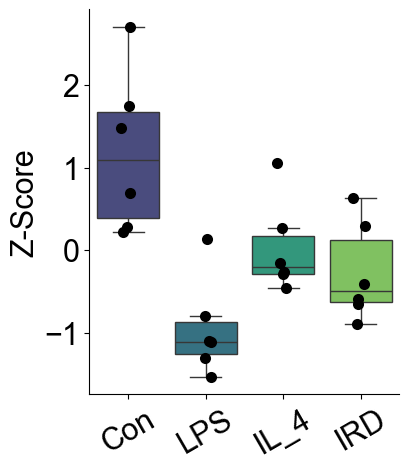

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


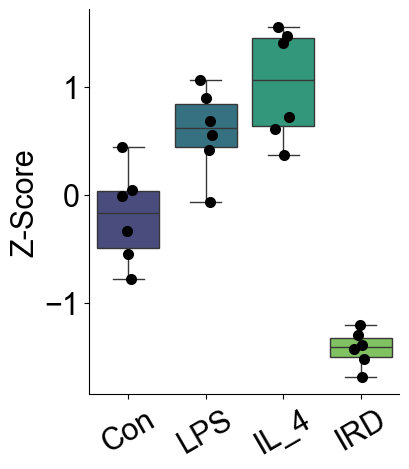

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


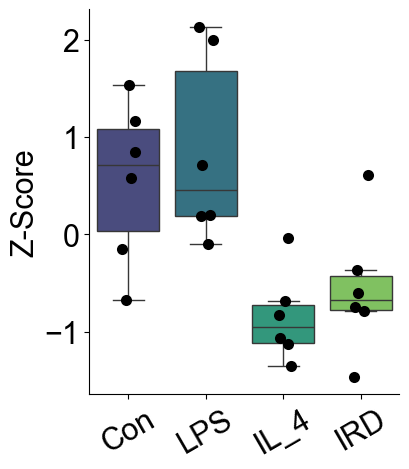

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


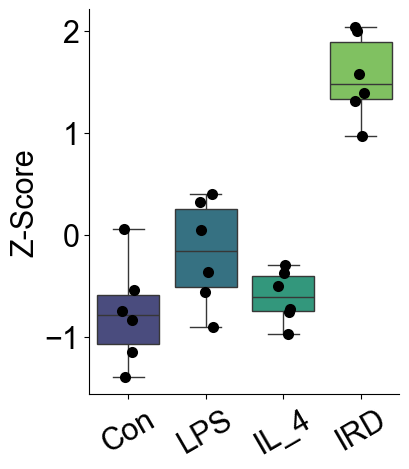

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


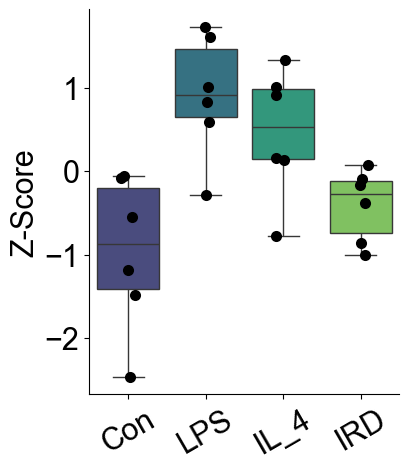

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


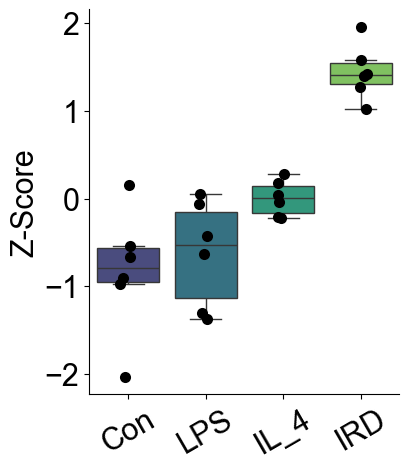

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


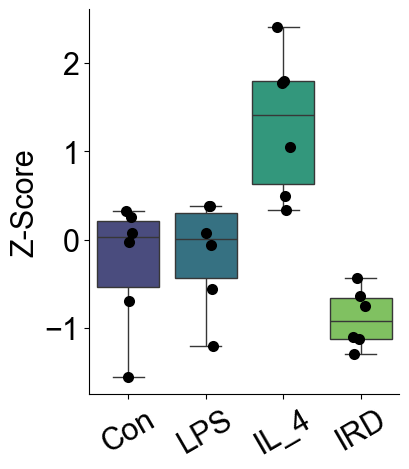

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


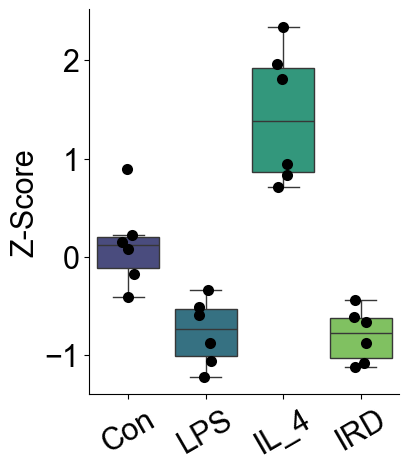

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


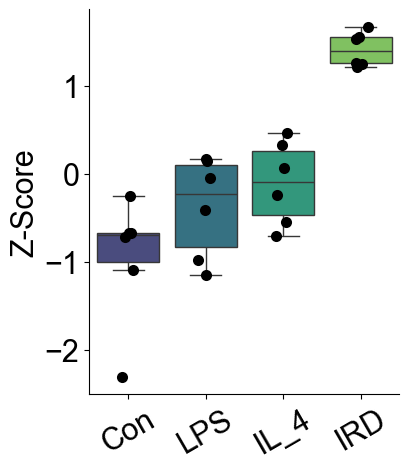

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


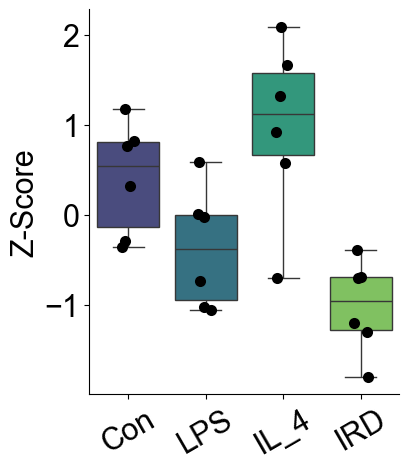

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


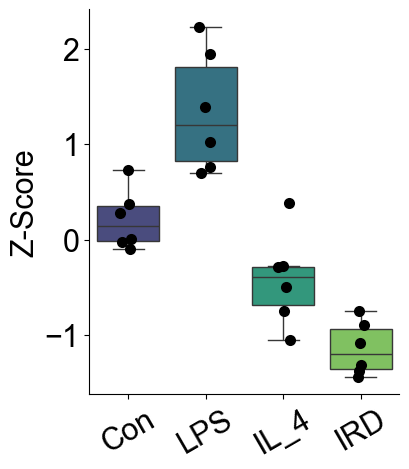

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


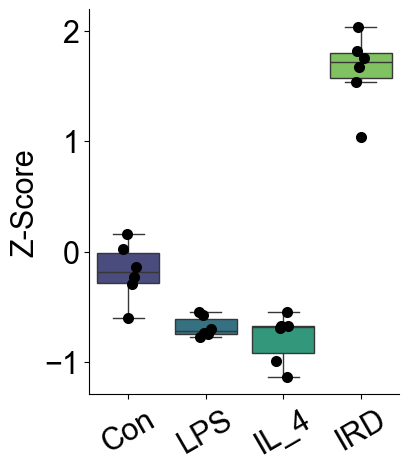

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


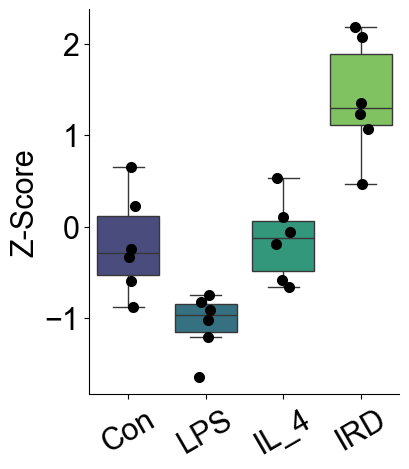

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


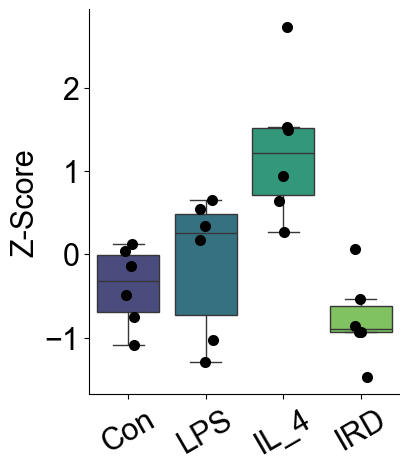

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


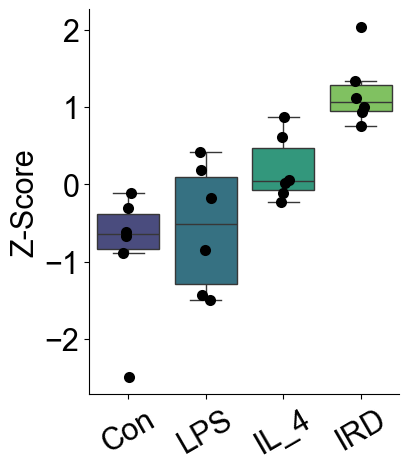

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


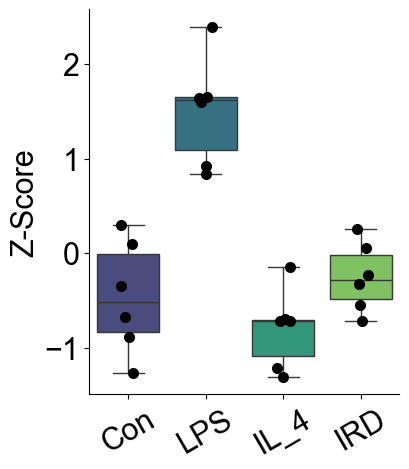

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


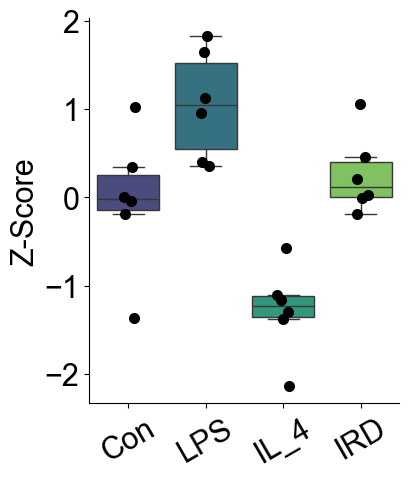

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


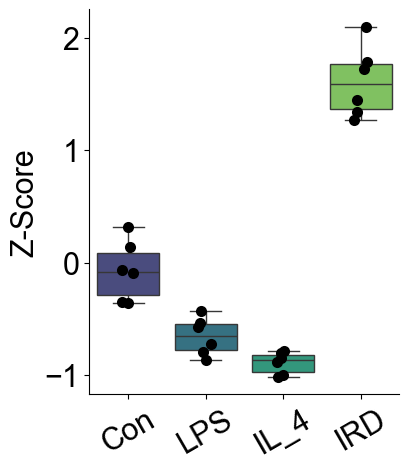

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


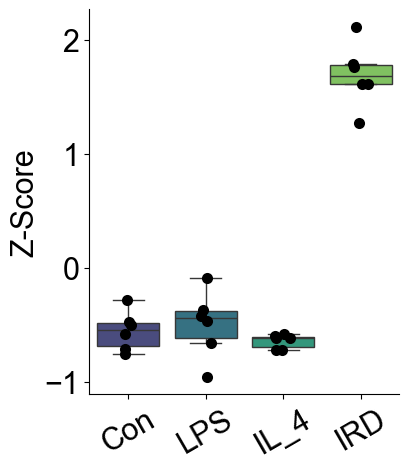

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


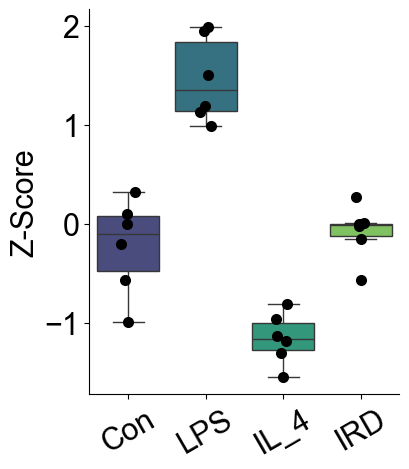

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


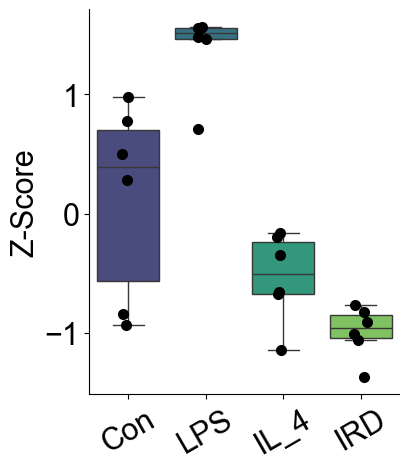

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


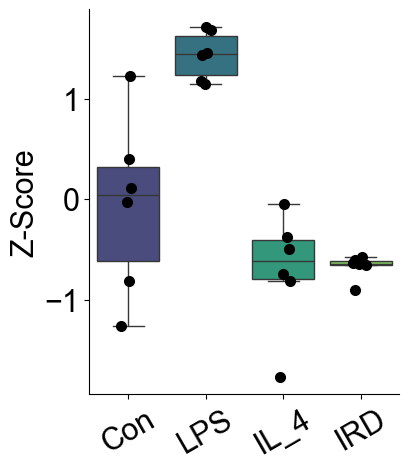

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


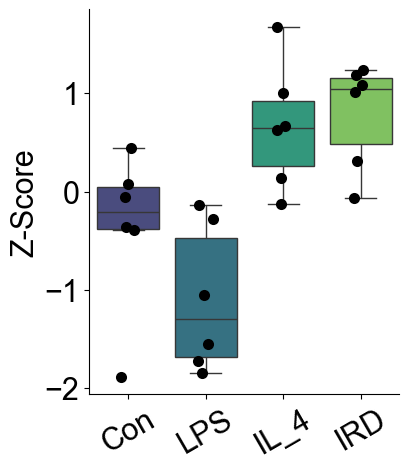

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


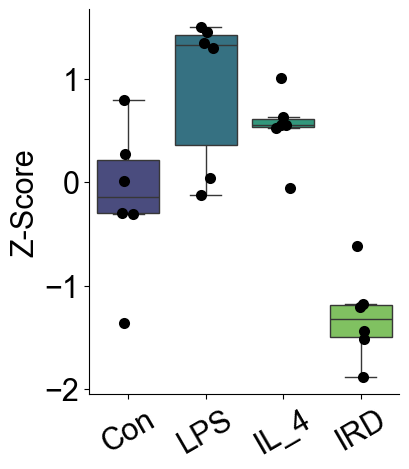

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


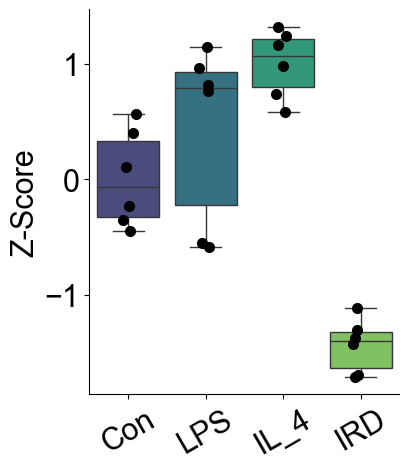

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


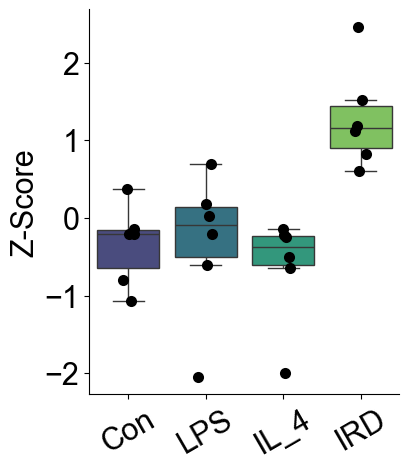

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


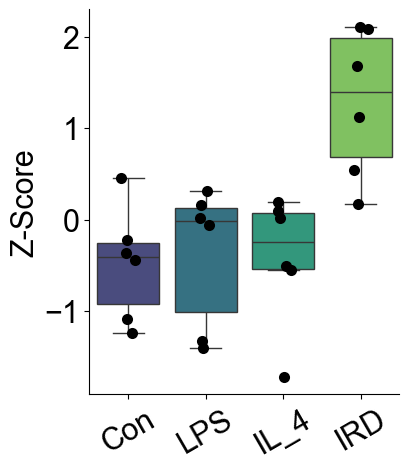

C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.8, data=dataset,showfliers=False,palette='viridis')
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_102668\4175618622.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


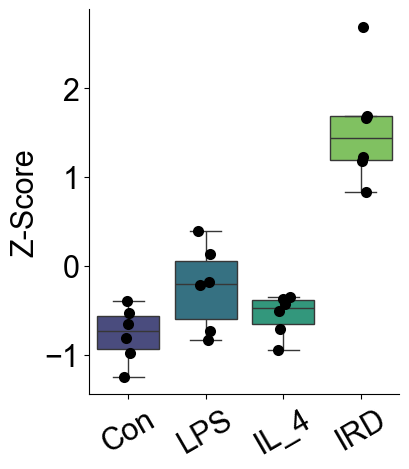

In [142]:
meta_sig_name_list = list(dfmeta_stdbyrow.index)

plot_selected_molecule(listname = meta_sig_name_list,df_name= dfmeta_stdbyrow,figuresize= (4, 5),
                       save_path = r'C:\Users\jiangy5\Box\SMAD PROJECT\figures\Mainpart 3_Macrophages polarization\sig_metabolites_boxstripplot_path')

In [87]:
# plot_select_metabolites( meta_list = ['Glutathione'],figuresize= (4, 5))

In [129]:
metabolite_targets = ['PC(15:0/22:4); [M+H]+ C45H83N1O8P1', 'Scutellarein-7-glucuronide - 30eV',
                      'Butyrylcarnitine - 40.00 eV', 'Palmitoylcarnitine -  eV',
                      'PC(14:0/15:0); [M+H]+ C37H75N1O8P1',
                      'PC(O-16:0/16:1); [M+H]+ C40H81N1O7P1',
                      'PC(15:0/16:0); [M+H]+ C39H79N1O8P1',
                      'PC(O-18:1/20:4); [M+H]+ C46H85N1O7P1',
                      'PC(15:0/22:4); [M+H]+ C45H83N1O8P1',
                      'PC(16:1/22:6); [M+H]+ C46H79N1O8P1',
                      'PC(18:1/20:4); [M+H]+ C46H83N1O8P1',
                      'PC(17:0/18:1); [M+H]+ C43H85N1O8P1',
                      'PC(P-18:0/22:6); [M+H]+ C48H85N1O7P1',
                      'PC(18:0/22:5); [M+H]+ C48H87N1O8P1',
                      'PC(20:0/20:4); [M+H]+ C48H89N1O8P1']

In [131]:
# sanitize_filename(metabolite_targets[1])

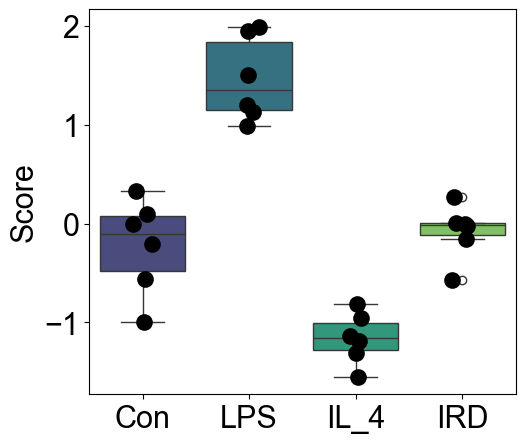

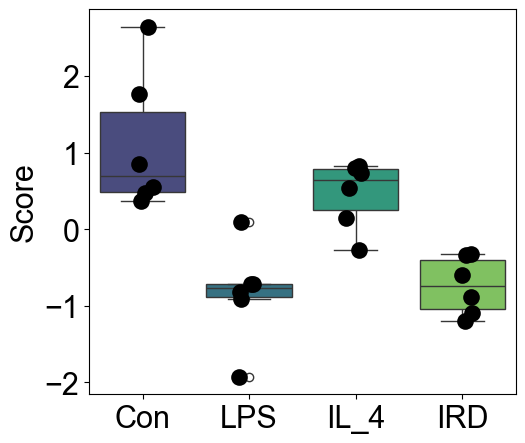

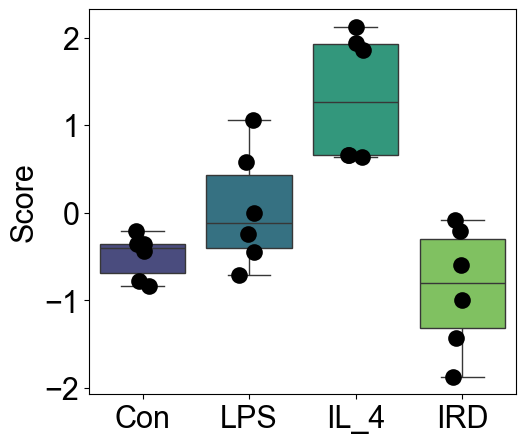

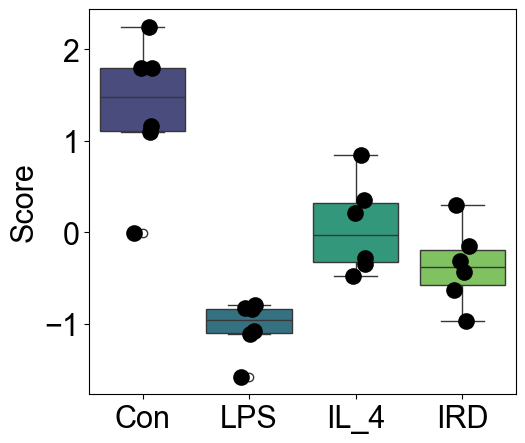

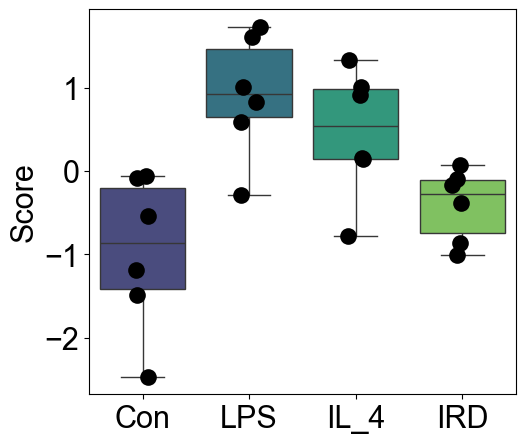

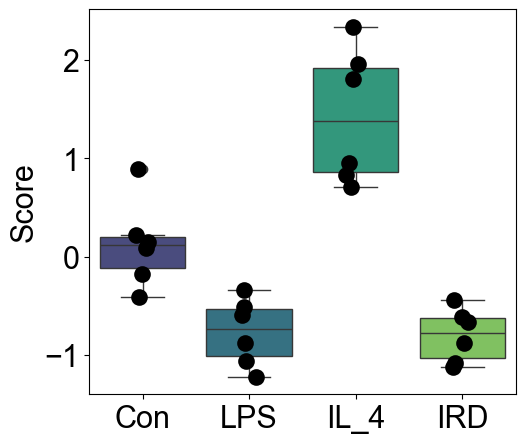

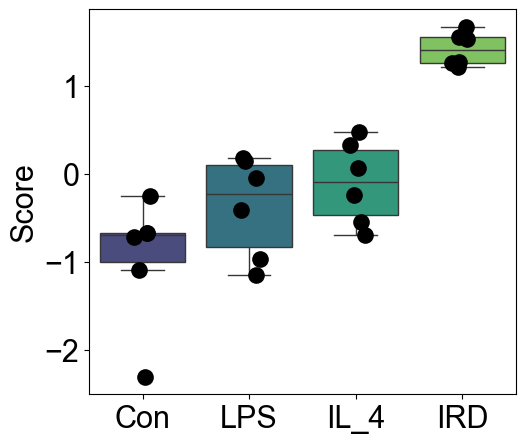

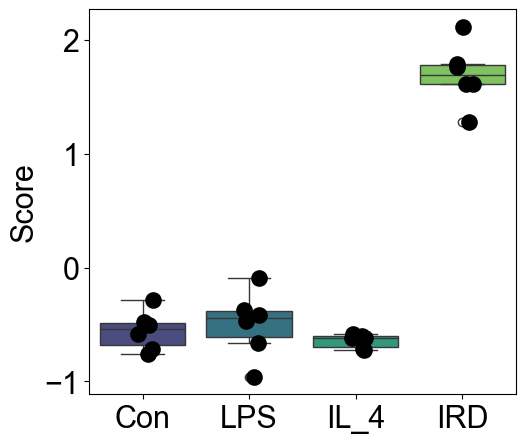

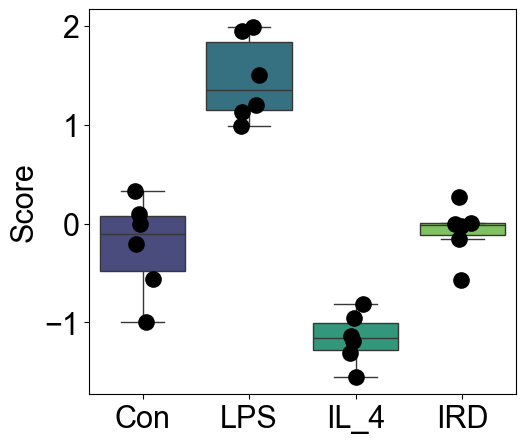

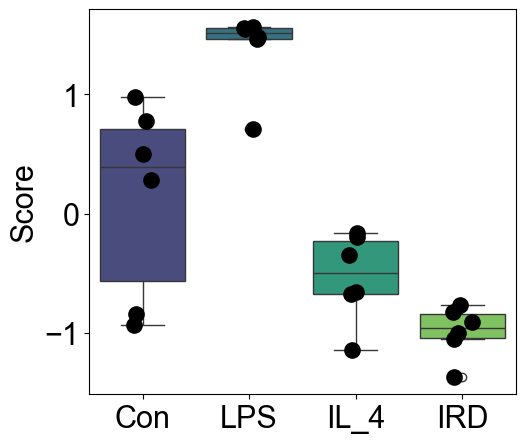

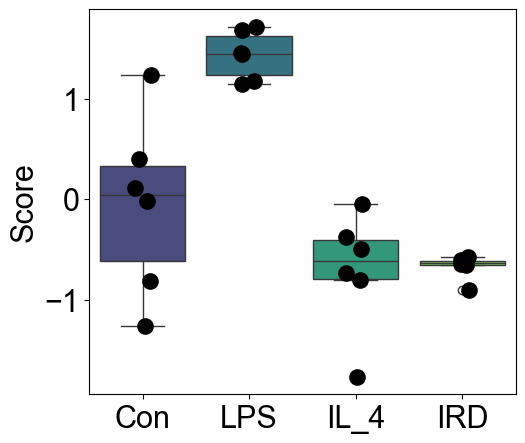

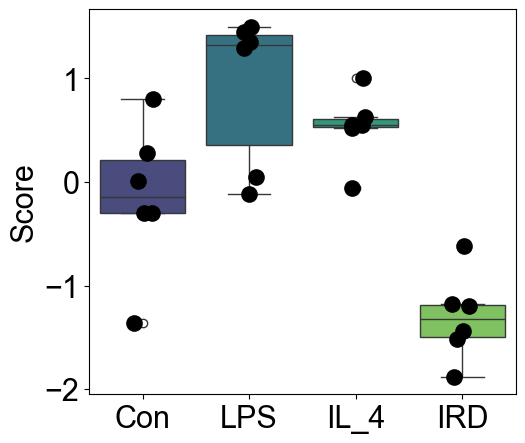

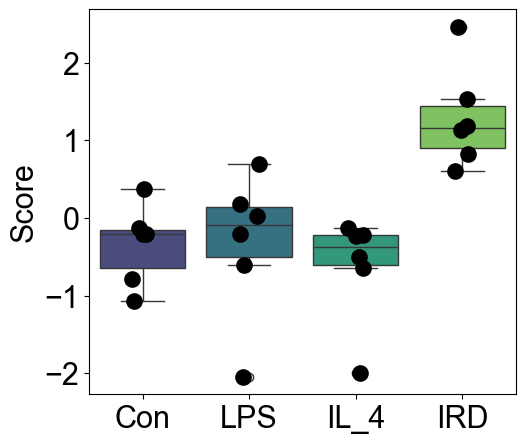

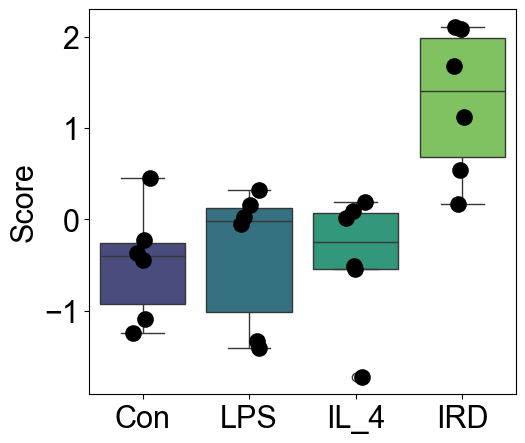

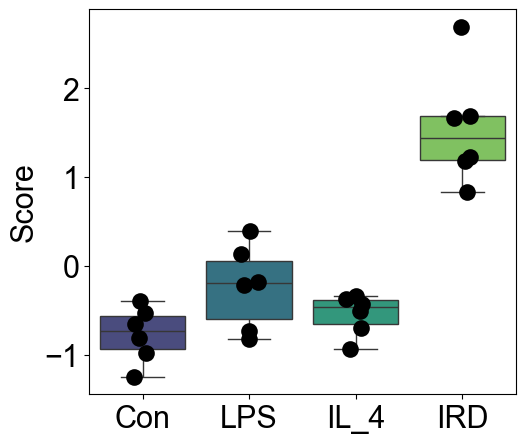

In [132]:
import warnings
warnings.filterwarnings('ignore')
plot_fig2(listname=metabolite_targets,df_name=dfmeta_stdbyrow)

In [ ]:
sig_multi_mean_ssbyrow

In [64]:
[item for item in df_meta_sig.index if "carnitine" in item]

['Acetyl-carnitine', 'Butyryl-carnitine', 'Palmitoyl-carnitine']

In [136]:
# import warnings
# warnings.filterwarnings('ignore')
# plot_fig(listname=protein_targets,df_name=dfpro_stdbyrow)

In [ ]:
# pathway analysis, Key pathways we want to discuss more in figure 3 


# >>>1  energy metabolism, from the multiomic results we noticed a significant upregulated energy consumption after any type of polarization.
#       for example, lipids are downregulated after polarization,  Carnitine 

# >>>2  amino acids dysregulation 




# Correlation analysis 

In [227]:
# dfmulti_stdbyrow_mean.to_csv(f'{file_save_path}/all_molecules_after_SSnormalization_mean.csv')
multi_corr = dfmulti_stdbyrow_mean.corr(method='pearson')
meta_corr = get_mean_macrophage_dataset(df =standardscaler_row(df_meta_sig)).corr(method='pearson')
pro_corr = get_mean_macrophage_dataset(df =standardscaler_row(df4)).corr(method='pearson')


In [245]:
# Create a mask for the upper triangle
def plot_heatmap_corr(corr_treatments = multi_corr, savename = "multi_corr_macrophages"):
    
    mask = np.triu(np.ones_like(corr_treatments, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=(7, 7))
    plt.rcParams['font.family'] = 'Arial'
    # Plot the heatmap with the mask
    ax = sns.heatmap(
        corr_treatments, 
        # mask=mask,  # Apply the mask
        cmap="RdBu",  # Choose a colormap
        annot=True,  # Annotate the cells with correlation values
        fmt=".2f",   # Format the annotation
        annot_kws={"size": 16, "weight": "bold", "color": "white", "style": "italic"},
        square=True,  # Make cells square
        linewidths=0.5,  # Add space between cells
        cbar_kws={"shrink": 0.8}  # Shrink the color bar
    )
    # Retrieve the colorbar from the heatmap
    cbar = ax.collections[0].colorbar
    
    # Set colorbar tick parameters (for example, font size and color)
    cbar.ax.tick_params(labelsize=16, labelcolor='black') 
    
    plt.xticks( fontsize=20)
    plt.yticks( fontsize=20)
    # Add title and labels (optional)
    #plt.title("Triangle Heatmap")
    plt.savefig(f'{figure_save_path}/{savename}.svg',dpi=800,bbox_inches='tight')
    plt.show()

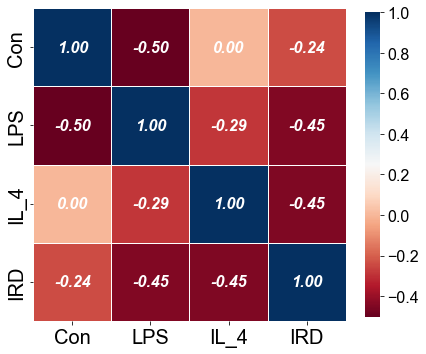

In [248]:
plot_heatmap_corr(corr_treatments = multi_corr, savename = "multi_corr_macrophages")

In [335]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [340]:
def plot_network_drugs(cor_matrix_df = corr_pearson, 
                       threshold_pos = 0.5, 
                       threshold_neg = -0.5,
                       title_name = "corr_network_drugs",fig_size=(15, 15)): 
    # # filter low corr
    # cor_matrix_filtered = cor_matrix_df.where(abs(cor_matrix_df) >= threshold)
    # Step 1: Filter correlations based on threshold
    cor_matrix_filtered = cor_matrix_df.where((cor_matrix_df >= threshold_pos) | (cor_matrix_df <= threshold_neg))
    # remove self-correlated
    np.fill_diagonal(cor_matrix_filtered.values, 0)
    
    # Step 3: create edge list
    cor_df = cor_matrix_filtered.stack().reset_index()
    cor_df.columns = ['from', 'to', 'correlation']
    # 过滤掉相关性为0的边
    cor_df = cor_df[cor_df['correlation'] != 0]
    # 如果相关矩阵对称，只保留一半的边
    cor_df = cor_df[cor_df['from'] < cor_df['to']]
    
    # 查看边列表（可选）
    # print(cor_df.head())
    # Step 4: create network
    G = nx.from_pandas_edgelist(cor_df, 'from', 'to', edge_attr='correlation')
    
    # Step 5: visualize 
    # define layout
    plt.figure(figsize=fig_size)  # Use the fig_size parameter
    pos = nx.spring_layout(G, k=0.1, iterations=30, seed=42)  
    # define color and width 
    edges = G.edges(data=True)
    edge_colors = []
    edge_widths = []
    for u, v, data in edges:
        corr = data['correlation']
        if corr > 0:
            edge_colors.append('purple')  # 正相关为紫色
        else:
            edge_colors.append('red')    # 负相关为灰色
        # 根据相关性的绝对值调整边宽度，乘以一个因子以增强可视化效果
        edge_widths.append(abs(corr)*15)
    
    nx.draw_networkx_nodes(G, pos,
                           node_size=1600,
                           node_color='lightblue',
                           edgecolors='black',
                           linewidths=0.9)
    nx.draw_networkx_edges(G, pos,
                           edge_color=edge_colors,
                           width=edge_widths,
                           alpha=0.7)
    nx.draw_networkx_labels(G, pos,
                            font_size=16,
                            font_family='Arial')
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='purple', lw=2, label='positive_corr'),
        Line2D([0], [0], color='red', lw=2, label='negative_corr')
    ]
    # plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title(title_name, fontsize=20)
    # remove x axis and y axis
    plt.axis('off')
    plt.tight_layout()
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)
    # plt.tight_layout()
    plt.show()

In [333]:
# Compute Pearson correlation matrix
correlation_matrix = haha_df2.T.corr(method='pearson')

In [345]:
haha_df2.index[:20]

Index(['PLXB2', 'MYO1E', 'CAN2', 'DPYL2', 'DLDH', 'GLU2B', 'PRDX4', 'ATOX1',
       'DEGS1', 'MA2B1', 'GSH0', 'SCRB2', 'PHB2', 'EXOC4', 'PLD3', 'NPC1',
       'ANXA3', 'RB33B', 'OST48', 'GET3'],
      dtype='object')

C:\Users\jymbc\AppData\Local\Temp\ipykernel_10324\3522803743.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


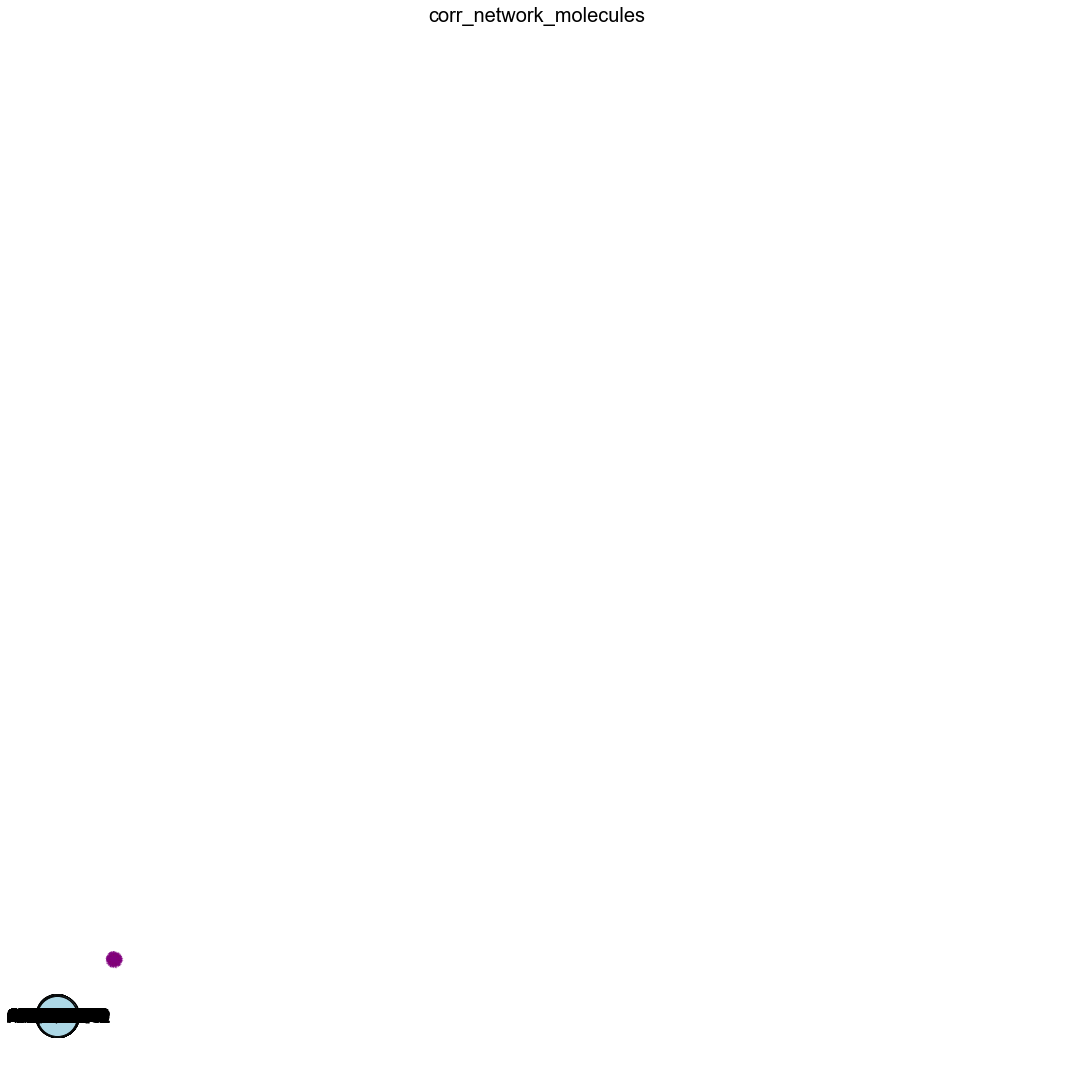

In [346]:
selected_pros = ['PLXB2', 'MYO1E', 'CAN2', 'DPYL2', 'DLDH', 'GLU2B', 'PRDX4', 'ATOX1',
       'DEGS1', 'MA2B1', 'GSH0', 'SCRB2', 'PHB2', 'EXOC4', 'PLD3', 'NPC1',
       'ANXA3', 'RB33B', 'OST48', 'GET3']

selected_cor_matrix_df = correlation_matrix.loc[selected_pros,selected_pros]

plot_network_drugs(cor_matrix_df = correlation_matrix, 
                       threshold_pos = 0.6, 
                       threshold_neg = -0.6,
                       title_name = "corr_network_molecules",fig_size=(15, 15))

# plot clustered heatmap for selected metabolites or proteins

In [84]:
dfheatmap = dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')]
dfheatmap

Con       LPS      IL_4       IRD
P56135|ATPK_MOUSE  -1.035770  0.429881  0.388497  0.217392
P56382|ATP5E_MOUSE -0.381433  0.206980  0.844680 -0.670226
P56480|ATPB_MOUSE  -1.343755 -0.014253  0.482719  0.875289
Q06185|ATP5I_MOUSE -0.790785 -0.224898  0.646578  0.369105
Q9D3D9|ATPD_MOUSE  -0.191853 -0.190497  0.372458  0.009892
Q9DB20|ATPO_MOUSE  -0.370169  0.284273 -0.153027  0.238922
Q03265|ATPA_MOUSE  -1.218890 -0.026631  0.346619  0.898902
Q9DCX2|ATP5H_MOUSE -0.713350 -0.645847  0.345665  1.013532
Q91VR2|ATPG_MOUSE   0.523995 -1.036740  0.510374  0.002371

In [85]:
def plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')], 
                           low = -1 ,high = 1,figure_size = (10,8)):

    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "PuOr"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap,cbar=True, vmin=low, vmax=high,
                        figsize = figure_size,  # Set the figure size here
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        dendrogram_ratio=(.1, .1),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 1}, # Make dendrogram lines invisible
                        cbar_pos=(-0.05, 0.76, 0.025, 0.20))
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize = 20) 
    
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), rotation=360, fontsize=16) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)  # Customize x-tick labels
    # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()

In [86]:
dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains(';')]

Con       LPS      IL_4       IRD
SM(d18:0/18:1); [M+H]+ C41H84N2O6P1 -0.195564 -1.060355 -0.141917  1.397836

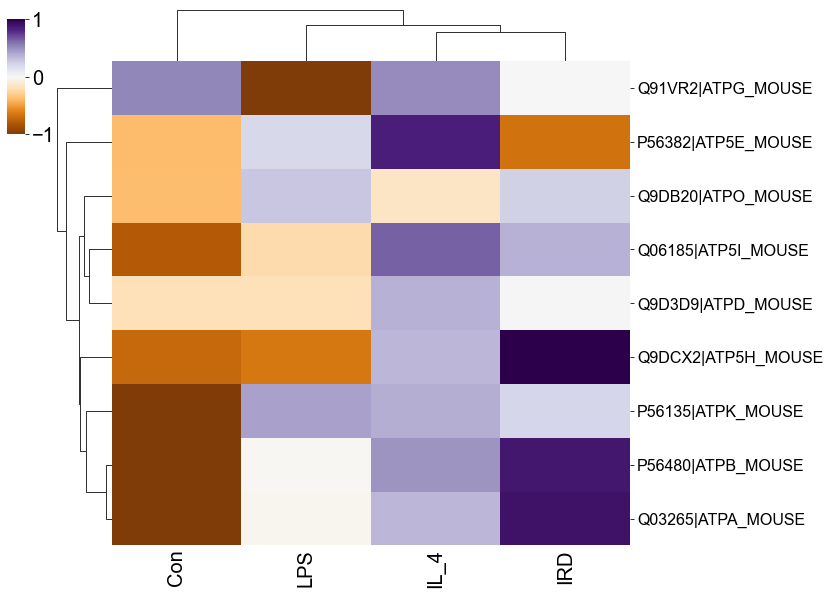

In [93]:
plot_clustered_heatmap(dfheatmap = dfmulti_stdbyrow_mean[dfmulti_stdbyrow_mean.index.str.contains('ATP')], 
                           low = -1 ,high = 1,figure_size = (10,8))

In [87]:
def plot_clusterheatmap2(dfheatmap, low=-2, high=2, figure_size = (21, 9)):
    '''This is a function to plot clustered heatmap for a input dataframe'''

    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "viridis"
    # Create the heatmap with the custom color map
    plt.rcParams['font.family'] = 'Arial'
        # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap,cbar=True, vmin=low, vmax=high,
                        figsize = figure_size,  # Set the figure size here
                        row_cluster=True,  # Enable row clustering
                        col_cluster=True,  # Enable column clustering
                        dendrogram_ratio=(.1, .1),  # Minimize the dendrogram size
                        tree_kws={'linewidths': 1}, # Make dendrogram lines invisible
                        cbar_pos=(-0.05, 0.76, 0.025, 0.20))
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize = 20) 
    
    ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), rotation=360, fontsize=16) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)  # Customize x-tick labels
 # Customize y-tick labels
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    # plt.savefig(f'{figure_save_path}/_clustered_heatmap.svg', dpi=800, bbox_inches='tight')
    # plt.tight_layout()
    plt.show()

In [88]:
dfmulti_stdbyrow_mean.corr(method='pearson')

Con       LPS      IL_4       IRD
Con   1.000000 -0.501991  0.000539 -0.240055
LPS  -0.501991  1.000000 -0.287893 -0.449151
IL_4  0.000539 -0.287893  1.000000 -0.453617
IRD  -0.240055 -0.449151 -0.453617  1.000000

In [150]:
sig_multi_mean_ssbyrow.iloc[:,:4].corr(method='pearson')

Con       LPS      IL_4       IRD
Con   1.000000 -0.522188  0.044812 -0.244978
LPS  -0.522188  1.000000 -0.243989 -0.444611
IL_4  0.044812 -0.243989  1.000000 -0.512298
IRD  -0.244978 -0.444611 -0.512298  1.000000

# plot Sankey  --- get value for nodes

In [119]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import plotly.graph_objects as go

In [124]:
treatments_dict = {
    'Control': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6'],
    'LPS': ['B1', 'B2', 'B3', 'B4', 'B5', 'B6'],
    'IL-4': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
    'IRD': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'],
}

# 提取对照组的列
control_cols = treatments_dict['Control']


In [161]:
# ------------------- calculate dysregulation -------------------
def get_dysregulation_pattern(df = df_pro_sig):

    result = {}
    for treatment, cols in treatments_dict.items():
        if treatment == 'Control':
            continue  # 跳过对照组
        p_values = []
        mean_diff = []
        for protein in df.index:
            control_values = df.loc[protein, control_cols].values
            treatment_values = df.loc[protein, cols].values
            # 进行独立样本t检验（不假设方差相等）
            t_stat, p_val = ttest_ind(treatment_values, control_values, equal_var=False)
            p_values.append(p_val)
            # 计算均值差异
            mean_treatment = np.mean(treatment_values)
            mean_control = np.mean(control_values)
            diff = mean_treatment - mean_control
            mean_diff.append(diff)
        
        # 根据p值和均值差异判断变化情况
        changes = []
        for i in range(len(df)):
            if p_values[i] < 0.05:
                if mean_diff[i] > 0:
                    changes.append('sigup')
                elif mean_diff[i] < 0:
                    changes.append('sigdown')
                else:
                    changes.append('nochange')
            else:
                changes.append('nochange')
        result[treatment] = changes
    
    # 将结果转换为DataFrame
    result_df = pd.DataFrame(result, index=df.index)
    return result_df
    

In [165]:
result_df=get_dysregulation_pattern(df = df_meta_sig)
# 定义变化类别
change_categories = ['sigup', 'sigdown', 'nochange']

# 统计每个处理组下每种变化类别的蛋白质数量
flow_data = []
for treatment in treatment_names:
    counts = result_df[treatment].value_counts()
    for category in change_categories:
        count = counts.get(category, 0)
        flow_data.append({
            'Treatment': treatment,
            'Category': category,
            'Count': count
        })

flow_df = pd.DataFrame(flow_data)
print("\n各处理组下各变化类别的蛋白质数量：")
print(flow_df)


各处理组下各变化类别的蛋白质数量：
  Treatment  Category  Count
0       LPS     sigup     16
1       LPS   sigdown     26
2       LPS  nochange     31
3      IL-4     sigup     35
4      IL-4   sigdown     15
5      IL-4  nochange     23
6       IRD     sigup     19
7       IRD   sigdown     27
8       IRD  nochange     27


In [166]:
# 2. 定义变化类别
categories = ['sigup', 'sigdown', 'nochange']

# 3. 初始化一个嵌套字典来存储结果
counts = {
    'LPS': {},
    'IL-4': {},
    'IRD': {}
}

# 4. 计算 LPS 处理下的变化情况数量
lps_counts = result_df['LPS'].value_counts().reindex(categories, fill_value=0).to_dict()
counts['LPS'] = lps_counts

# 5. 基于 LPS 处理，计算 IL-4 处理下的变化情况数量
counts['IL-4'] = {}
for lps_cat in categories:
    subset_lps = result_df[result_df['LPS'] == lps_cat]
    il4_counts = subset_lps['IL-4'].value_counts().reindex(categories, fill_value=0).to_dict()
    counts['IL-4'][lps_cat] = il4_counts

# 6. 基于 IL-4 处理，计算 IRD 处理下的变化情况数量
counts['IRD'] = {}
for il4_cat in categories:
    subset_il4 = result_df[result_df['IL-4'] == il4_cat]
    ird_counts = subset_il4['IRD'].value_counts().reindex(categories, fill_value=0).to_dict()
    counts['IRD'][il4_cat] = ird_counts

# 7. 将结果转换为更易读的格式（例如 DataFrame）
# 7.1. LPS 处理结果
lps_df = pd.DataFrame([counts['LPS']])
lps_df.index = ['LPS']
print("LPS 处理下的变化情况数量：")
print(lps_df)
print("\n")
# 7.2. IL-4 处理结果（基于 LPS 处理）
il4_df = pd.DataFrame(counts['IL-4']).T
print("基于 LPS 处理，IL-4 处理下的变化情况数量：")
print(il4_df)
print("\n")
# 7.3. IRD 处理结果（基于 IL-4 处理）
ird_data = []
for il4_cat in categories:
    ird_counts = counts['IRD'][il4_cat]
    row = {
        'IL-4': il4_cat,
        'sigup': ird_counts['sigup'],
        'sigdown': ird_counts['sigdown'],
        'nochange': ird_counts['nochange']
    }
    ird_data.append(row)
ird_df = pd.DataFrame(ird_data)
print("基于 IL-4 处理，IRD 处理下的变化情况数量：")
print(ird_df)

LPS 处理下的变化情况数量：
     sigup  sigdown  nochange
LPS     16       26        31


基于 LPS 处理，IL-4 处理下的变化情况数量：
          sigup  sigdown  nochange
sigup         7        3         6
sigdown       5        9        12
nochange     23        3         5


基于 IL-4 处理，IRD 处理下的变化情况数量：
       IL-4  sigup  sigdown  nochange
0     sigup      8        8        19
1   sigdown      3       10         2
2  nochange      8        9         6


# sankey plots of metabolome and proteome dysregulation

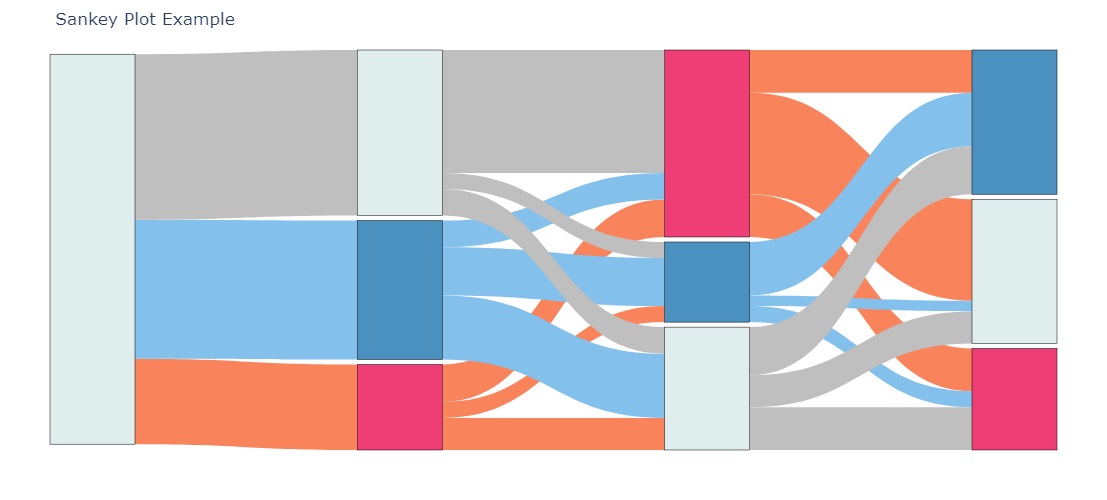

In [186]:

import os
import plotly.graph_objects as go

# sankey value for proteins
source = [0 , 0 , 0 , 1 , 1 , 1 , 2 , 2 , 2 , 3 , 3 , 3, 4, 4, 4, 5, 5, 5, 6, 6, 6 ]
target = [1 , 2 , 3 , 4 , 5 , 6 , 4 , 5 , 6 , 4 , 5 , 6 ,7,8,9,7,8,9,7,8,9]
value =  [16, 26 , 31, 7 ,3 ,6  ,5,9,12 , 23 ,3 ,5 ,8 ,8 ,19 , 3,10,2 , 8 ,9 ,6 ]
label = ["Control", "Increase", "Decrease", "No Change", "Increase", "Decrease", "No Change", "Increase", "Decrease", "No Change"]

link_colors = ["#F9845B", "#83C0EC", "#BFBFBF", 
               "#F9845B","#F9845B", "#F9845B", 
               "#83C0EC", "#83C0EC", "#83C0EC", 
               "#BFBFBF", "#BFBFBF", "#BFBFBF",
              "#F9845B","#F9845B", "#F9845B", 
               "#83C0EC", "#83C0EC", "#83C0EC", 
               "#BFBFBF", "#BFBFBF", "#BFBFBF"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=85,
        line=dict(color="black", width=0.5),
        label=["", "", "", "","", "", "","", "", ""]  # Set node labels to an empty string
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors  # Set default color to blue
    )
)])
# Customize the plot layout
fig.update_layout(
    title="Sankey Plot Example",
    font=dict(size=12),
    height=500,
    width=700,
    margin=dict(l=50, r=50, t=50, b=50),
    colorway=["#D7E9E9","#EB0E54", "#1F76B1", "#D7E9E9","#EB0E54", "#1F76B1","#D7E9E9","#EB0E54", "#1F76B1", "#D7E9E9"]   # Set custom colors
)
# Define the file path to save the plot
file_path = os.path.join(os.getcwd(), f'{figure_save_path}\\sankey_meta.png')

# Save the plot as a TIFF file to the specified path
fig.write_image(file_path, format='png')

fig.show()

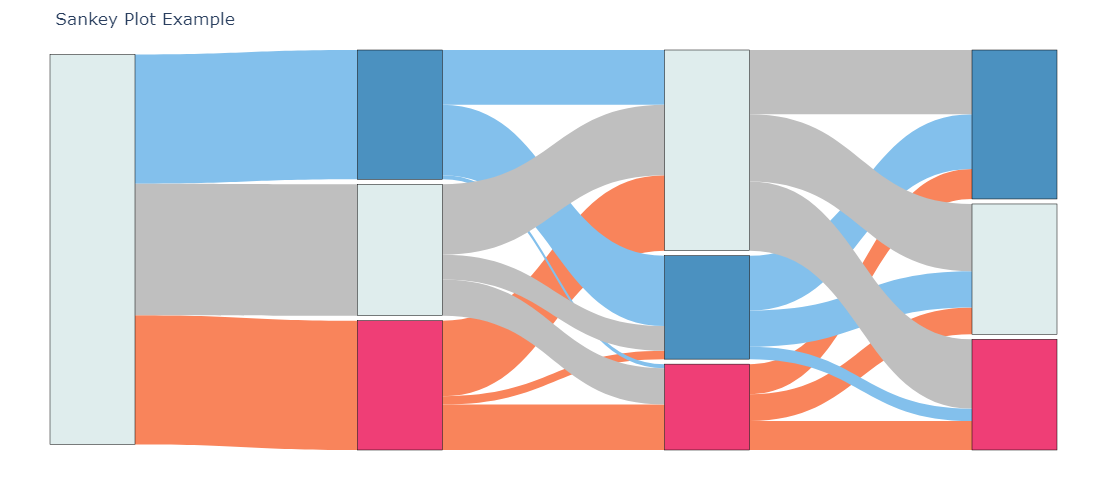

In [187]:
# sankey plots of proteins
import os
import plotly.graph_objects as go

# sankey value for proteins
source2 = [0 , 0 , 0 , 1 , 1 , 1 , 2 , 2 , 2 , 3 , 3 , 3, 4, 4, 4, 5, 5, 5, 6, 6, 6 ]
target2 = [1 , 2 , 3 , 4 , 5 , 6 , 4 , 5 , 6 , 4 , 5 , 6 ,7,8,9,7,8,9,7,8,9]
value2 =  [125, 125 , 127, 44 ,8 ,73  ,4,68,53 , 35 ,24 ,68 ,28 ,29 ,26 , 12,53,35 , 67 ,62 ,65 ]
label2 = ["Control", "Increase", "Decrease", "No Change", "Increase", "Decrease", "No Change", "Increase", "Decrease", "No Change"]


link_colors = ["#F9845B", "#83C0EC", "#BFBFBF", 
               "#F9845B","#F9845B", "#F9845B", 
               "#83C0EC", "#83C0EC", "#83C0EC", 
               "#BFBFBF", "#BFBFBF", "#BFBFBF",
              "#F9845B","#F9845B", "#F9845B", 
               "#83C0EC", "#83C0EC", "#83C0EC", 
               "#BFBFBF", "#BFBFBF", "#BFBFBF"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=85,
        line=dict(color="black", width=0.5),
        label=["", "", "", "","", "", "","", "", ""]  # Set node labels to an empty string
    ),
    link=dict(
        source=source2,
        target=target2,
        value=value2,
        color=link_colors  # Set default color to blue
    )
)])
# Customize the plot layout
fig.update_layout(
    title="Sankey Plot Example",
    font=dict(size=12),
    height=500,
    width=700,
    margin=dict(l=50, r=50, t=50, b=50),
    colorway=["#D7E9E9","#EB0E54", "#1F76B1", "#D7E9E9","#EB0E54", "#1F76B1","#D7E9E9","#EB0E54", "#1F76B1", "#D7E9E9"]   # Set custom colors
)

# Define the file path to save the plot
file_path = os.path.join(os.getcwd(), f'{figure_save_path}\\sankey_pro.png')

# Save the plot as a TIFF file to the specified path
fig.write_image(file_path, format='png')

fig.show()

# pathway analysis

In [102]:
def extract_gene_names(gene_list):
    """
    """
    gene_names = set()
    # 正则表达式模式：匹配 '|GENENAME_MOUSE' 或 '|GENENAME_HUMAN' 等格式
    pattern = re.compile(r'\|([A-Za-z0-9]+)_[A-Za-z]+\b')

    for entry in gene_list:
        match = pattern.search(entry)
        if match:
            gene = match.group(1)
            gene_names.add(gene)
    
    # sorted_genes = sorted(gene_names)
    return gene_names


In [103]:
re.compile(r'\|([A-Za-z0-9]+)_[A-Za-z]+\b').search(df4.index[3]).group(1)

'DPYL2'

In [114]:
len(extract_gene_names(sig_cluster0.index))

119

In [105]:
df_pro_mean = get_mean_macrophage_dataset(df =standardscaler_row(df = df4))

In [106]:
import gseapy as gp

In [40]:
enr_pro = gp.enrichr(gene_list= extract_gene_names(df4.index), 
                     gene_sets='KEGG_2019_Mouse',  # Use the mouse-specific gene set
                     organism='Mouse',    # species
                     outdir='enrichr_results')

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [135]:
enr_cluster0 = gp.enrichr(gene_list= list(extract_gene_names(sig_cluster0.index)), 
                     gene_sets='KEGG_2019_Mouse',  # Use the mouse-specific gene set
                     organism='Mouse',    # species
                     outdir='enrichr_results',
                     cutoff=1.0 )

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [134]:
enr_cluster1 = gp.enrichr(gene_list= list(extract_gene_names(sig_cluster1.index)), 
                     gene_sets='KEGG_2019_Mouse',  # Use the mouse-specific gene set
                     organism='Mouse',    # species
                     outdir='enrichr_results',
                     cutoff=1.0 )


C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [133]:
enr_cluster2 = gp.enrichr(gene_list= list(extract_gene_names(sig_cluster2.index)), 
                     gene_sets='KEGG_2019_Mouse',  # Use the mouse-specific gene set
                     organism='Mouse',    # species
                     outdir='enrichr_results',
                     cutoff=1.0)

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [132]:
enr_cluster3 = gp.enrichr(gene_list= list(extract_gene_names(sig_cluster3.index)), 
                     gene_sets='KEGG_2019_Mouse',  # Use the mouse-specific gene set
                     organism='Mouse',    # species
                     outdir='enrichr_results',
                     cutoff=1.0)

C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\jiangy5\Anaconda3\lib\site-packages\gseapy\plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [136]:
enrich_df_cluster1 = enr_cluster1.results
enrich_df_cluster2 = enr_cluster2.results
enrich_df_cluster3 = enr_cluster3.results
enrich_df_cluster0 = enr_cluster0.results

In [139]:
def get_sig_enrich_pathways(select_df):
    sig_pval = select_df[select_df ['P-value'] <0.05]
    return sig_pval

In [140]:
get_sig_enrich_pathways(enrich_df_cluster1)

Gene_set                                      Term Overlap  \
0  KEGG_2019_Mouse              Epstein-Barr virus infection   7/229   
1  KEGG_2019_Mouse                      Salmonella infection    4/78   
2  KEGG_2019_Mouse                             Legionellosis    3/58   
3  KEGG_2019_Mouse                               Spliceosome   4/132   
4  KEGG_2019_Mouse  C-type lectin receptor signaling pathway   3/112   
5  KEGG_2019_Mouse                Osteoclast differentiation   3/128   

    P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0  0.000445          0.032054            0                     0    5.534628   
1  0.001211          0.043578            0                     0    9.309988   
2  0.004995          0.119870            0                     0    9.322571   
3  0.008026          0.144473            0                     0    5.367663   
4  0.029303          0.421962            0                     0    4.691237   
5  0.041023          0.423253            0                     0    4.087448   

   Combined Score                                    Genes  
0       42.710786  PDIA3;STAT1;OAS1A;ISG15;CALR;CD44;NFKB2  
1       62.532581                     CASP1;RHOG;FLNA;CD14  
2       49.404006                         CASP1;CD14;NFKB2  
3       25.899164                   DDX5;SF3A1;SF3B3;SRSF2  
4       16.560384                        STAT1;CASP1;NFKB2  
5       13.053803                         STAT1;NCF4;NFKB2

In [142]:
get_sig_enrich_pathways(enrich_df_cluster3)

Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Old P-value, Old Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []

In [63]:
# gp.get_library_name()

In [41]:
pathway_pro = enr_pro.results

In [101]:
def get_df_specific_pathway(pathway_name = 'Glycolysis'):  
    selected_pathway = pathway_pro[pathway_pro['Term'].str.contains(pathway_name)]  # get a specific pathway and corresponding gene names  
    sub_items = selected_pathway.Genes.tolist()[0].split(';')   # separate string by ";"
    patternss = '|'.join(map(re.escape, sub_items))   #  get a string which separate by "|"    
    df = df_pro_mean[df_pro_mean.index.str.contains(patternss)]
    return df

In [102]:
get_df_specific_pathway(pathway_name = 'Glycolysis')

Con       LPS  \
1/sp|P05064|ALDOA_MOUSE                             1.211133 -1.251179   
1/sp|P09411|PGK1_MOUSE                              1.331024 -1.121824   
1/sp|P47738|ALDH2_MOUSE                            -0.584475 -0.851165   
1/sp|Q9DBJ1|PGAM1_MOUSE                             1.217806 -1.081977   
2/sp|P06151|LDHA_MOUSE/tr|A0A1B0GSR9|A0A1B0GSR9...  1.252003 -0.759561   

                                                        IL_4       IRD  
1/sp|P05064|ALDOA_MOUSE                            -0.069989  0.110035  
1/sp|P09411|PGK1_MOUSE                              0.288800 -0.497999  
1/sp|P47738|ALDH2_MOUSE                             0.292814  1.142826  
1/sp|Q9DBJ1|PGAM1_MOUSE                             0.211840 -0.347669  
2/sp|P06151|LDHA_MOUSE/tr|A0A1B0GSR9|A0A1B0GSR9...  0.399054 -0.891496

In [57]:
# pathway_pro

In [215]:
# pathway_pro.iloc[:30,:]

# get local dataframe for pathway ID, pathway name and compound name

In [10]:
from bioservices import KEGG
kegg = KEGG()

In [11]:
from urllib.parse import quote
import requests

In [12]:

def get_kegg_id(metabolite_name):
    encoded_name = quote(metabolite_name)
    url = f"http://rest.kegg.jp/find/compound/{encoded_name}"
    response = requests.get(url)
    if response.status_code == 200:
        if response.text.strip() == "":
            # print(f"WARNING: No KEGG ID found for {metabolite_name}")
            return None
        # get the potential multiple matches
        kegg_ids = [line.split('\t')[0] for line in response.text.strip().split('\n')]
        return kegg_ids
    else:
        # print(f"ERROR: Unable to find KEGG ID for {metabolite_name} (Status Code: {response.status_code})")
        return None

def get_pathways(kegg_id):
    url = f"http://rest.kegg.jp/link/pathway/{kegg_id}"
    response = requests.get(url)
    if response.status_code == 200:
        if response.text.strip() == "":
            return []
        pathways = []
        for line in response.text.strip().split('\n'):
            parts = line.split('\t')
            if len(parts) == 2:
                pathway_id = parts[1]
                # get pathway name
                pathway_info = get_pathway_description(pathway_id)
                pathways.append((pathway_id, pathway_info))
        return pathways
    else:
        # print(f"ERROR: Unable to get pathways for {kegg_id} (Status Code: {response.status_code})")
        return []


In [163]:
metabolites = df_meta_sig.index
metabolite_data = []

for metabolite in metabolites:
    kegg_ids = get_kegg_id(metabolite)
    if kegg_ids:
        metabolite_data.append({
            "Metabolite": metabolite,
            "KEGG_ID": kegg_ids
            })
    else:
        metabolite_data.append({
            "Metabolite": metabolite,
            "KEGG_ID": None,
        })

In [273]:
# metabolite_data
# # # 转换为 DataFrame 并展示
df_pathway_meta = pd.DataFrame(metabolite_data)
# df_pathway_meta

In [272]:
flattened_list = [item for sublist in df_pathway_meta.KEGG_ID.tolist() if sublist is not None for item in sublist]
# print(flattened_list)

In [192]:
my_compounds = [cid.split(':')[1] for cid in flattened_list]

In [217]:
# my_compounds

In [16]:
# 获取该物种的所有通路
pathways = kegg.list("pathway", 'hsa')

In [18]:

# 将字符串解析为字典
pathways_dict = {}
for line in pathways.strip().split("\n"):
    if line:
        pid, pname = line.split("\t")
        pathway_id = pid # 例如 'mmu00010'  
        pathway_name = pname
        pathways_dict[pathway_id] = pathway_name
print(f"共获取到 {len(pathways_dict)} 个通路。")


共获取到 362 个通路。


In [19]:
pathways_dict

{'hsa01100': 'Metabolic pathways - Homo sapiens (human)',
 'hsa01200': 'Carbon metabolism - Homo sapiens (human)',
 'hsa01210': '2-Oxocarboxylic acid metabolism - Homo sapiens (human)',
 'hsa01212': 'Fatty acid metabolism - Homo sapiens (human)',
 'hsa01230': 'Biosynthesis of amino acids - Homo sapiens (human)',
 'hsa01232': 'Nucleotide metabolism - Homo sapiens (human)',
 'hsa01250': 'Biosynthesis of nucleotide sugars - Homo sapiens (human)',
 'hsa01240': 'Biosynthesis of cofactors - Homo sapiens (human)',
 'hsa00010': 'Glycolysis / Gluconeogenesis - Homo sapiens (human)',
 'hsa00020': 'Citrate cycle (TCA cycle) - Homo sapiens (human)',
 'hsa00030': 'Pentose phosphate pathway - Homo sapiens (human)',
 'hsa00040': 'Pentose and glucuronate interconversions - Homo sapiens (human)',
 'hsa00051': 'Fructose and mannose metabolism - Homo sapiens (human)',
 'hsa00052': 'Galactose metabolism - Homo sapiens (human)',
 'hsa00053': 'Ascorbate and aldarate metabolism - Homo sapiens (human)',
 'hsa

In [262]:
# pathways_dict

In [252]:
# kegg.get('mmu00380').split('\n')

In [20]:
def get_compounds_in_pathway(kegg_instance, pathway_id):
    """
    从KEGG通路信息中提取化合物ID。

    参数:
        kegg_instance (bioservices.KEGG): KEGG服务实例。
        pathway_id (str): 通路ID，例如 'mmu00010'。

    返回:
        list: 包含该通路中所有化合物ID的列表。
    """
    try:
        pathway_info = kegg_instance.get(pathway_id)
        compounds = []
        compound_section = False  # 标记是否处于COMPOUND部分

        for line in pathway_info.split('\n'):
            line = line.strip()
            if line.startswith('COMPOUND'):
                compound_section = True
                # 提取第一行的化合物ID
                parts = line.split()
                for part in parts[1:]:
                    if part.startswith('C'):
                        compounds.append(part)
            elif compound_section:
                # 检查是否为缩进行（继续的化合物行）
                if line.startswith('C'):
                    parts = line.split()
                    compound_id = parts[0]
                    compounds.append(compound_id)
                else:
                    # if not a compound ID starts with C, end it
                    break
        return compounds
    except Exception as e:
        print(f"获取通路 {pathway_id} 失败: {e}")
        return []

In [22]:
# kegg = KEGG()
# get_compounds_in_pathway(kegg, 'mmu00052')

In [260]:
import time
# 构建通路到化合物的映射
pathway_to_compounds = {}
total_pathways = len(pathways_dict)
for idx, (pid, pname) in enumerate(pathways_dict.items(), 1):
    compounds = get_compounds_in_pathway(kegg, pid)
    pathway_to_compounds[pid] = compounds
    if idx % 50 == 0 or idx == total_pathways:
        print(f"已处理 {idx}/{total_pathways} 个通路。")
    time.sleep(1)  # 添加延时，避免触发API限制

已处理 50/356 个通路。
已处理 100/356 个通路。
已处理 150/356 个通路。
已处理 200/356 个通路。
已处理 250/356 个通路。
已处理 300/356 个通路。
已处理 350/356 个通路。
已处理 356/356 个通路。


In [270]:
# 将字典转换为 DataFrame
data_final = []
for pathway_id, compounds in pathway_to_compounds.items():
    for compound in compounds:
        data_final.append({'Pathway_ID': pathway_id, 'Compound_ID': compound})

df_pathway = pd.DataFrame(data_final)
df_pathway["Pathway_Name"] = df_pathway['Pathway_ID'].map(pathways_dict)
# 保存到 CSV 文件
df_pathway.to_csv(f'{file_save_path}/pathway_to_compounds.csv', index=False, encoding='utf-8')


# pathway enrichment analysis for metabolome starts here

In [46]:
dfdfdf = pd.read_csv(f'{file_save_path}/pathway_to_compounds.csv')

In [47]:
dfdfdf

Pathway_ID Compound_ID                                       Pathway_Name
0      mmu00010      C00022  Glycolysis / Gluconeogenesis - Mus musculus (h...
1      mmu00010      C00024  Glycolysis / Gluconeogenesis - Mus musculus (h...
2      mmu00010      C00031  Glycolysis / Gluconeogenesis - Mus musculus (h...
3      mmu00010      C00033  Glycolysis / Gluconeogenesis - Mus musculus (h...
4      mmu00010      C00036  Glycolysis / Gluconeogenesis - Mus musculus (h...
...         ...         ...                                                ...
5958   mmu04934      C01245      Cushing syndrome - Mus musculus (house mouse)
5959   mmu04934      C01953      Cushing syndrome - Mus musculus (house mouse)
5960   mmu04934      C05138      Cushing syndrome - Mus musculus (house mouse)
5961   mmu04934      C05488      Cushing syndrome - Mus musculus (house mouse)
5962   mmu04934      C07557      Cushing syndrome - Mus musculus (house mouse)

[5963 rows x 3 columns]

In [278]:
df_your_compounds = dfdf[dfdf['Compound_ID'].isin(my_compounds)]

In [279]:
# 统计每个通路中您的化合物数量
pathway_counts = df_your_compounds['Pathway_ID'].value_counts().reset_index()
pathway_counts.columns = ['Pathway_ID', 'Your_Compound_Count']

print("您的化合物在各通路中的分布：")
print(pathway_counts.head())

您的化合物在各通路中的分布：
  Pathway_ID  Your_Compound_Count
0   mmu00980                    8
1   mmu00564                    8
2   mmu00330                    7
3   mmu00565                    6
4   mmu00480                    6


In [284]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

In [285]:

# 总背景中的化合物数量
all_compounds = dfdf['Compound_ID'].nunique()

# 您的化合物列表中的化合物数量
your_compound_count = len(set(my_compounds))

# 构建通路总化合物数的DataFrame
pathway_total_counts = dfdf.groupby('Pathway_ID')['Compound_ID'].nunique().reset_index()
pathway_total_counts.columns = ['Pathway_ID', 'Total_Compound_Count']

# 合并您的化合物计数
enrichment_df = pathway_total_counts.merge(pathway_counts, on='Pathway_ID', how='left')
enrichment_df['Your_Compound_Count'] = enrichment_df['Your_Compound_Count'].fillna(0).astype(int)

print(enrichment_df.head())

# 定义富集分析函数
def perform_hypergeometric_test(row, M, N, K, n):
    """
    M: 总背景中的化合物数量
    N: 每个通路中包含的化合物数量
    K: 您的化合物列表中的化合物数量
    n: 您的化合物在该通路中的数量
    """
    return hypergeom.sf(row['Your_Compound_Count'] - 1, M, N, K)

# 计算p值
enrichment_df['p-value'] = enrichment_df.apply(lambda row: perform_hypergeometric_test(
    row, 
    M=all_compounds, 
    N=row['Total_Compound_Count'], 
    K=your_compound_count, 
    n=row['Your_Compound_Count']), axis=1)

# 多重检验校正（FDR）
enrichment_df['adj_p-value'] = multipletests(enrichment_df['p-value'], method='fdr_bh')[1]

# 筛选显著富集的通路（例如，adj_p-value < 0.05）
significant_enrichment = enrichment_df[enrichment_df['adj_p-value'] < 0.05]

print("显著富集的通路：")
print(significant_enrichment.sort_values('adj_p-value'))

  Pathway_ID  Total_Compound_Count  Your_Compound_Count
0   mmu00010                    31                    0
1   mmu00020                    20                    0
2   mmu00030                    37                    0
3   mmu00040                    59                    0
4   mmu00051                    55                    0
显著富集的通路：
    Pathway_ID  Total_Compound_Count  Your_Compound_Count   p-value  \
267   mmu05231                    11                    6  0.000017   

     adj_p-value  
267     0.004679  


In [287]:
significant_enrichment 

Pathway_ID  Total_Compound_Count  Your_Compound_Count   p-value  \
267   mmu05231                    11                    6  0.000017   

     adj_p-value  
267     0.004679

# others

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Con'),
  Text(0, 1.5, 'LPS'),
  Text(0, 2.5, 'IL_4'),
  Text(0, 3.5, 'IRD')])

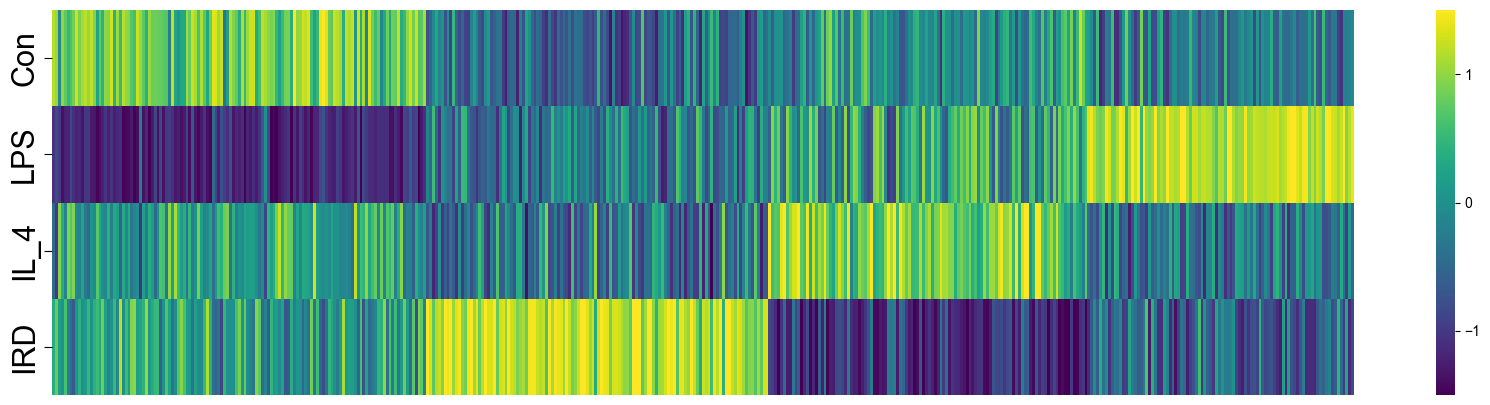

In [170]:
# plot heatmap for significant metabolites
df_df=result
dfaa=df_df.sort_values(by='kmeans')
df_bb=dfaa.T
df_heat=df_bb.iloc[:4,:]

plt.figure(figsize=(21,5),edgecolor="#04253a")
matplotlib.rcParams['font.family'] = "Arial"
sns.heatmap(df_heat,  vmin=-1.5, vmax=1.5,cmap='viridis',xticklabels=False,cbar_kws={"shrink": 1, 'ticks': [-2, -1, 0, 1, 2]})
plt.xticks([])
plt.yticks()
plt.tick_params(axis='y',length=6)
plt.yticks(rotation=90)
plt.yticks(fontsize=22)
# plt.savefig(f'{figure_save_path}/sigpro_heatmap.svg',dpi=1000,bbox_inches='tight')

In [849]:
x=['Con','LPS','IL_4','IRD']

# take different cluster protein names out
#sig_cluster4=sigpro_stdrow.loc[sigpro_stdrow['kmeans']==4]
sig_cluster3=sigpro_stdrow.loc[sigpro_stdrow['kmeans']==3]
sig_cluster2=sigpro_stdrow.loc[sigpro_stdrow['kmeans']==2]
sig_cluster1=sigpro_stdrow.loc[sigpro_stdrow['kmeans']==1]
sig_cluster0=sigpro_stdrow.loc[sigpro_stdrow['kmeans']==0]

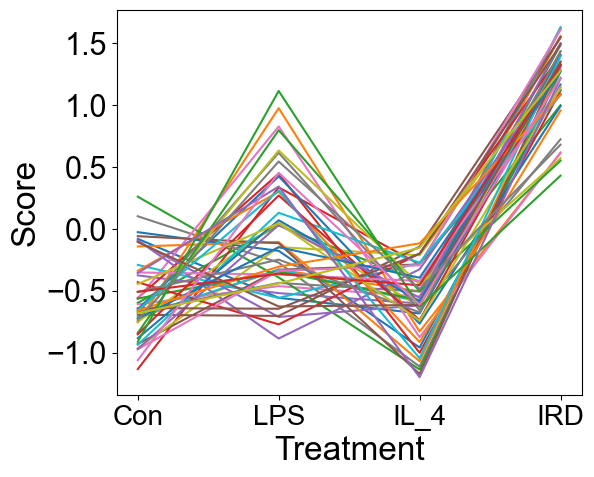

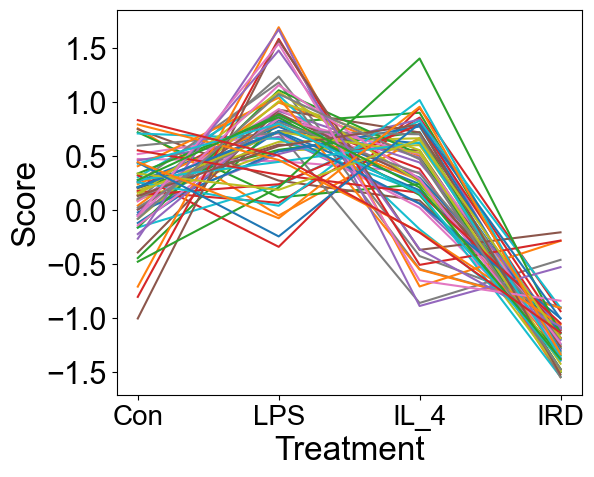

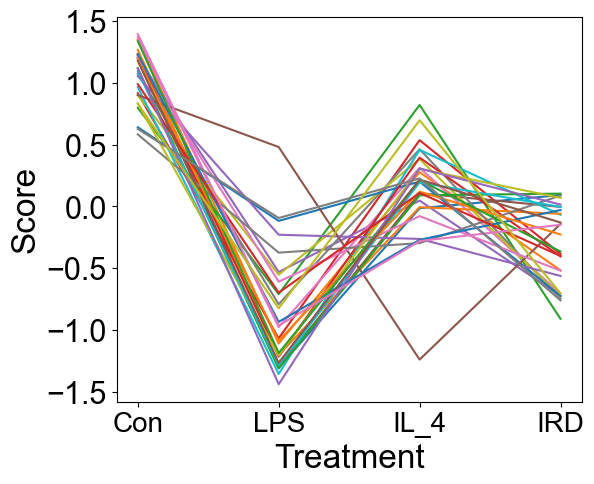

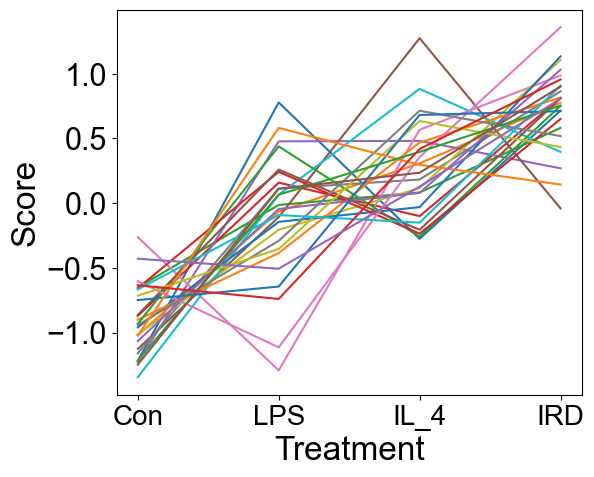

In [850]:
import matplotlib.pyplot as plt

# Create a dictionary of cluster names and corresponding data
cluster_data = {'sigpro_Cluster 1': sigpro_stdrow.loc[list(sig_cluster0.index)],
                'sigpro_Cluster 2': sigpro_stdrow.loc[list(sig_cluster1.index)],
                'sigpro_Cluster 3': sigpro_stdrow.loc[list(sig_cluster2.index)],
                'sigpro_Cluster 4': sigpro_stdrow.loc[list(sig_cluster3.index)],}
                #'Cluster 5': sigpro_stdrow.loc[list(sig_cluster4.index)]}

# Loop over the dictionary items to plot the data for each cluster
for title, data in cluster_data.items():
    plt.figure(figsize=(6, 5), edgecolor='#04253a')
    plt.rcParams['font.family'] = 'Arial'
    for i in range(len(data)):
        plt.plot(x, data.iloc[i, :4])  
    #plt.title(title, fontsize=24)
    plt.xlabel('Treatment', fontsize=24)
    plt.ylabel('Score', fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=22)
#     plt.savefig(r'D:\\project7_SMAD\\figure_3_macro_clustering_analysis\\SI_figures\\{}.svg'.format(title),dpi=800,bbox_inches='tight')
    plt.savefig(f'{figure_save_path}/{title}.svg', dpi=800, bbox_inches='tight')
    plt.show()

In [559]:
# dfpro_mean.filter(regex='(LMNA_MOUSE|PCNA_MOUSE|HMOX1_MOUSE|SODM_MOUSE|TPM4_MOUSE|PRDX4_MOUSE|PRDX3_MOUSE|LAMP1_MOUSE|CD14_MOUSE|SQSTM_MOUSE|HSP7C_MOUSE)', axis=0)

# quantification dataset from myself 

In [10]:
df_my = pd.read_csv(f'{file_save_path}\sig_dysregu_proteins_0.05adj.csv',index_col=0)

df_my




A1        A2  \
1/sp|O08529|CAN2_MOUSE                              0.261779  0.169324   
1/sp|O08749|DLDH_MOUSE                             -0.254792 -0.141971   
1/sp|O08795|GLU2B_MOUSE                             0.284068  0.231582   
1/sp|O08807|PRDX4_MOUSE                             2.404427  2.508318   
1/sp|O08997|ATOX1_MOUSE                            -0.040803 -0.104313   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.451618  0.402511   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.005656  0.010955   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.133748  2.994868   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.768139 -0.779036   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.374566 -0.509187   

                                                          A3        A4  \
1/sp|O08529|CAN2_MOUSE                              0.273492  0.178511   
1/sp|O08749|DLDH_MOUSE                             -0.310627 -0.243267   
1/sp|O08795|GLU2B_MOUSE                             0.289485  0.193721   
1/sp|O08807|PRDX4_MOUSE                             2.317293  2.352831   
1/sp|O08997|ATOX1_MOUSE                            -0.393455 -0.088165   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.506437  0.437055   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.013404 -0.013398   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.052889  2.984624   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.776722 -0.811212   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.440070 -0.560497   

                                                          A5        A6  \
1/sp|O08529|CAN2_MOUSE                              0.338167  0.245746   
1/sp|O08749|DLDH_MOUSE                             -0.369222 -0.419146   
1/sp|O08795|GLU2B_MOUSE                             0.228158  0.260514   
1/sp|O08807|PRDX4_MOUSE                             2.539985  2.457636   
1/sp|O08997|ATOX1_MOUSE                             0.067130 -0.086408   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.491367  0.388633   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t...  0.093140 -0.055802   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.124791  3.013890   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.799782 -0.813013   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.496555 -0.456199   

                                                          B1        B2  \
1/sp|O08529|CAN2_MOUSE                             -0.032840  0.009486   
1/sp|O08749|DLDH_MOUSE                             -0.142676 -0.094446   
1/sp|O08795|GLU2B_MOUSE                             0.383515  0.424922   
1/sp|O08807|PRDX4_MOUSE                             2.406417  2.477600   
1/sp|O08997|ATOX1_MOUSE                            -0.341382 -0.468907   
...                                                      ...       ...   
7/sp|P61979|HNRPK_MOUSE/tr|A0A286YCM2|A0A286YCM...  0.387637  0.334395   
7/sp|Q9CZY3|UB2V1_MOUSE/sp|Q9D2M8|UB2V2_MOUSE/t... -0.307661 -0.233921   
9/sp|P10853|H2B1F_MOUSE/sp|P10854|H2B1M_MOUSE/s...  3.127235  3.245112   
9/sp|P15379|CD44_MOUSE/tr|A2APM1|A2APM1_MOUSE/t... -0.262929 -0.611110   
9/sp|P61957|SUMO2_MOUSE/sp|Q9Z172|SUMO3_MOUSE/t... -0.987251 -0.680381   

                                                          B3        B4  ...  \
1/sp|O08529|CAN2_MOUSE                             -0.002325  0.014372  ...   
1/sp|O08749|DLDH_MOUSE                             -0.131789 -0.042683  ...   
1/sp|O08795|GLU2B_MOUSE                             0.375322  0.347770  ...   
1/sp|O08807|PRDX4_MOUSE                             2.449687  2.493028  ...   
1/sp|O08997|ATOX1_MOUSE                            -0.287862 -0.321397  ...   
...                         

In [20]:
myll = extract_genenames_from_proteinlist(input_prolist = get_proteins_and_metabolites_from_clusters(df_cluster = df_my)[0])

In [21]:
len(myll)

987

In [32]:
myli = [item.split("|")[-1].split("_")[0] for item in df_my.index]

In [33]:
save_path  = 'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\my_list.csv'  # Windows example
save_path2 = 'F:\SMAD PROJECT\Macrophage_reanalysis\multiome\my_list2.csv'  # Windows example

In [26]:
import csv

# Create folders if they don't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

with open(save_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for item in myll:
        writer.writerow([item])



In [34]:
# Create folders if they don't exist
os.makedirs(os.path.dirname(save_path2), exist_ok=True)

with open(save_path2, 'w', newline='') as f:
    writer = csv.writer(f)
    for item in myli:
        writer.writerow([item])
